# LC ChR2 2s Stim All Phases TFC Analysis

### Table of Contents

1. [Experiment Info](#ei)
2. [Imports and Set Up](#is)
3. [Training](#tr)
    1. [Load and Clean Training Data](#lctr)
    2. [Plot Training Data](#pltr)
4. [Tone Test](#to)
    1. [Load and Clean Tone Test Data](#lcto)
    2. [Plot Tone Test Data](#plto)
5. [Context Test](#co)
    1. [Load and Clean Tone Test Data](#lcco)


<a id='ei'></a>

## Experiment Info: 
- Purchased C57bl6 x SVE129 hybrids from Taconic
- Inject with prazosin and propranolol 30 mins prior to conditioning
    - Vehicle
    - 0.5mg/kg praz + 5mg/kg prop
    - 1mg/kg praz + 10mg/kg prop
    - 2mg/kg praz + 20mg/kg prop
- Train in trace fear conditioning (TFC)
    - 240s baseline
    - 20s, 3kHz, 85db tone
    - 20s trace interval
    - 3 x 0.4mA, 2s shocks
    - 240s ITI
- Tone test
    - 240s baseline
    - same tone
    - 6 trials


   



<a id='is'></a>
## Imports and Script-Wide Set Up

In [3]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# insert path to fearData.py below
sys.path.insert(0, '/Users/jake/Code/fear_data/')
import fearData as fd
%matplotlib inline


In [4]:
# set path to correct experiment
path = '/Users/jake/Box/WiltgenLab expts/JW LC/2021-07 Prazosin and Propranolol TFC/'
grp_label_file = '/Users/jake/Box/WiltgenLab expts/JW LC/JW LC Expt Tracker.xlsx'
expt_name ='Prop and Praz Pre TFC'

In [21]:
# set script-wide plotting settings
fd.presentation_style()
colors = ['#0f57ff', '#767876']
sns.set_palette('Paired')

<a id='tr'></a>
## Training

<a id='lctr'></a>
### Load and Clean Training Data

In [6]:
# load data
train_file = f'{path}data-raw/2021-07-06 Prazosin and Propranolol TFC Train.csv'
df_train_raw = fd.load_df(train_file)

# clean data (take from MedAssociates format to simple csv table)
df_train = fd.clean_df(df_train_raw)



In [7]:
# add group labels to animals
veh = ['1', '8', '11', '14', '17', '24']
high = ['2', '5','12','15','18','21']
med = ['3', '6', '9', '16', '19','22']
low = ['4', '7', '10', '13', '20', '23']

for animal in df_train.Animal:
    if animal in  veh:
        df_train.loc[df_train['Animal'] == animal, 'Condition'] = 'Veh'

        
for animal in df_train.Animal:
    if animal in  high:
        df_train.loc[df_train['Animal'] == animal, 'Condition'] = 'High'
        
        
for animal in df_train.Animal:
    if animal in  med:
        df_train.loc[df_train['Animal'] == animal, 'Condition'] = 'Med'

                
for animal in df_train.Animal:
    if animal in  low:
        df_train.loc[df_train['Animal'] == animal, 'Condition'] = 'Low'
        
df_train['Sex'] = 'M'

In [8]:
# create a df w/ values averaged for each phase (i.e. baseline, tone, etc.) w/in each animal
df_train_total = fd.total_df(df_train, grp2='Condition')


In [9]:
df_train_total

Animal Sex Condition     Phase  Group  Pct Component Time Freezing  \
0       1   M       Veh  baseline    NaN                     3.152500   
1       1   M       Veh       iti    NaN                    57.273333   
2       1   M       Veh      tone    NaN                    51.610000   
3       1   M       Veh     trace    NaN                    55.613333   
4      10   M       Low  baseline    NaN                    38.776667   
..    ...  ..       ...       ...    ...                          ...   
91      8   M       Veh     trace    NaN                    52.223333   
92      9   M       Med  baseline    NaN                    97.083333   
93      9   M       Med       iti    NaN                    93.023056   
94      9   M       Med      tone    NaN                    95.723333   
95      9   M       Med     trace    NaN                    96.833333   

    Avg Motion Index  
0         151.095833  
1          36.357778  
2          77.190000  
3          28.436667  
4          49.892500  
..               ...  
91         47.713333  
92          0.609167  
93          1.731389  
94          0.233333  
95          0.563333  

[96 rows x 7 columns]

<a id='pltr'></a>
### Plot Training Data

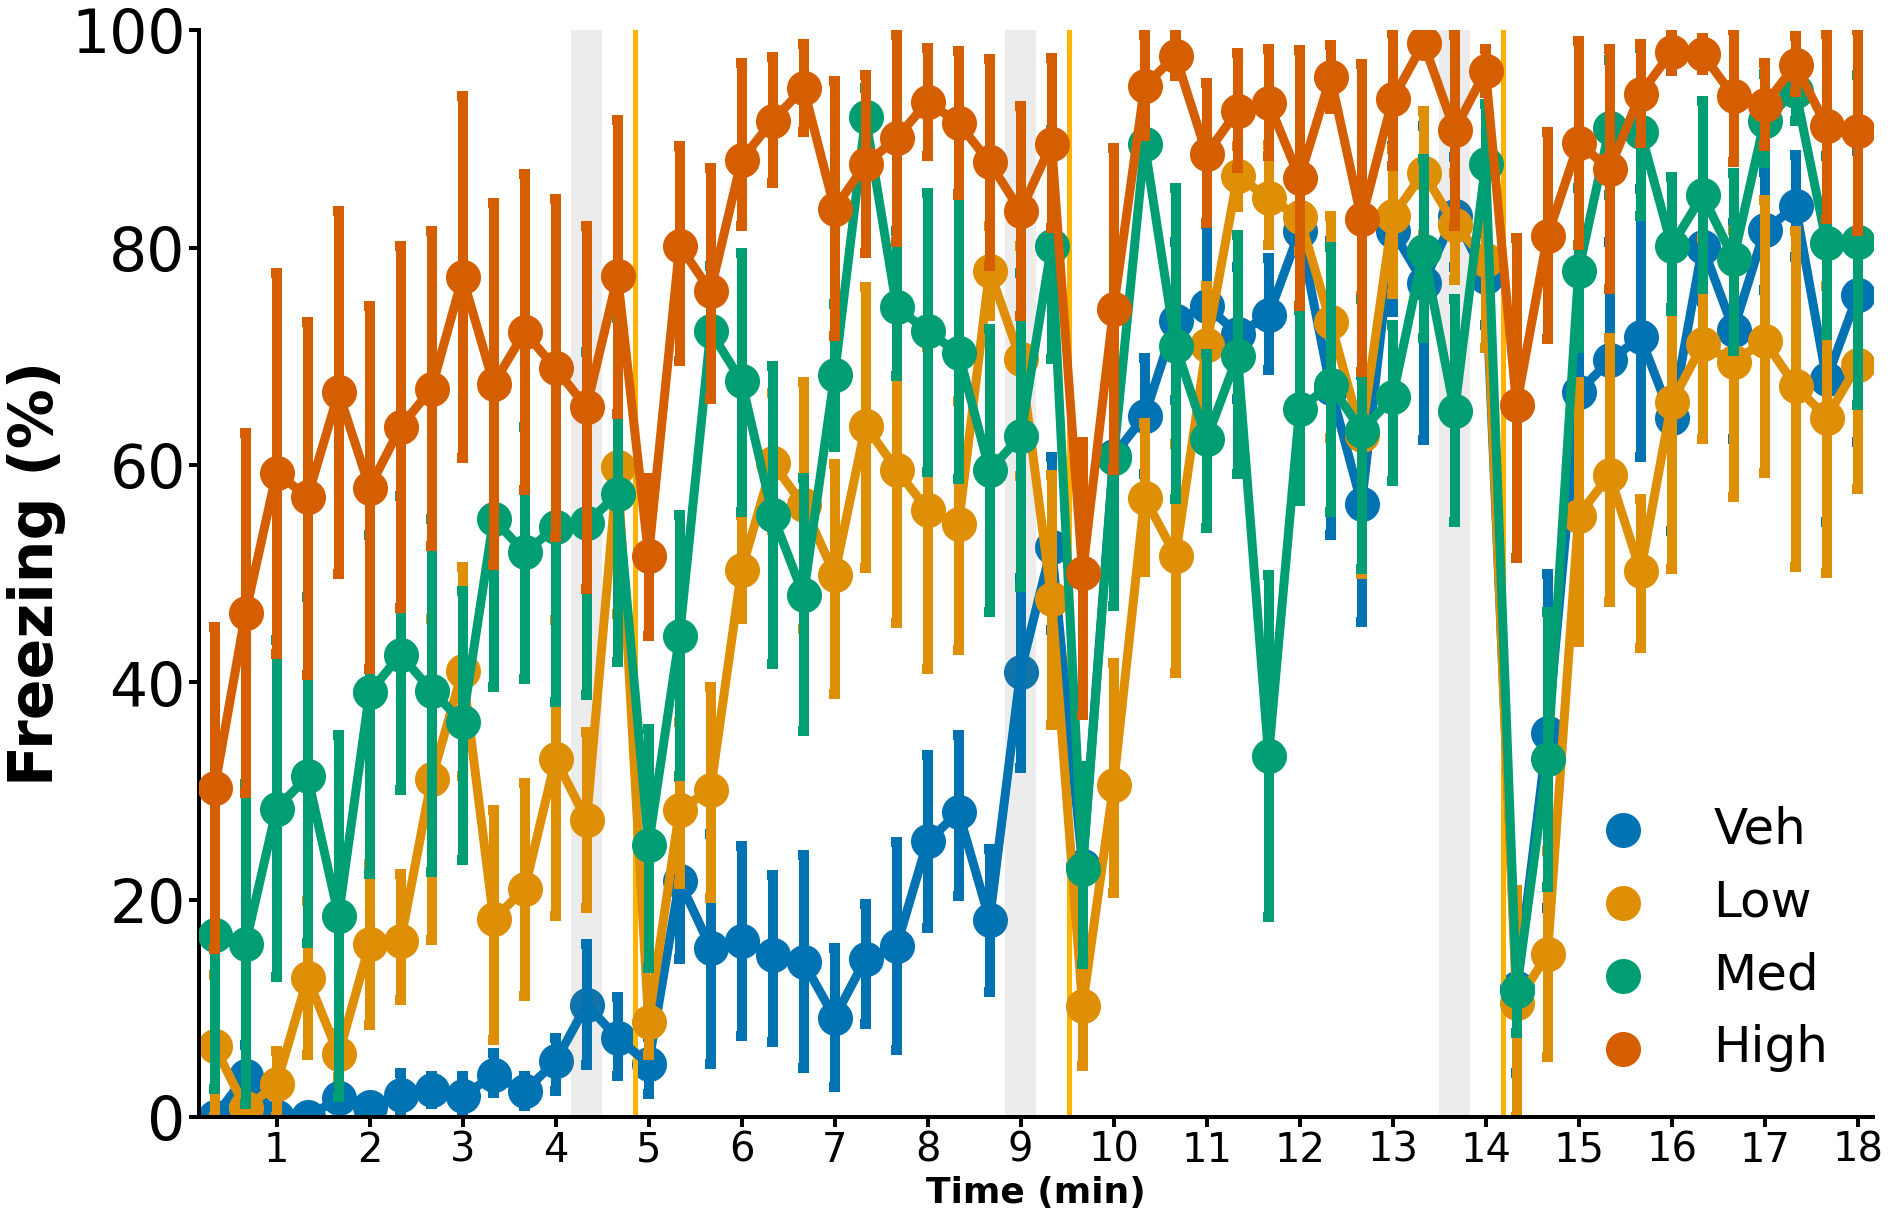

In [10]:
# binned plot (w/ time as x)

fd.tfc_plot(df_train, has_hue=True, hue_order = ['Veh', 'Low', 'Med', 'High'], hue='Condition', fig_name='Training')
plt.legend(fontsize = 50);

# Save figure
#plt.savefig(f'{path}/figures/{expt_name} train bins.png')
min_bins = [i for i in range(len(df_train['Component Name'].unique())) if (i+1) % 3 == 0]
min_labs = [ i+1 for i in range(len(min_bins)) ]
plt.xticks(min_bins, min_labs, rotation=0)
plt.xlabel('Time (min)', size = 36);
plt.savefig(f'{path}/figures/Praz Prop TFC Train bins')

/Users/jake/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jake/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(0.0, 110.0)

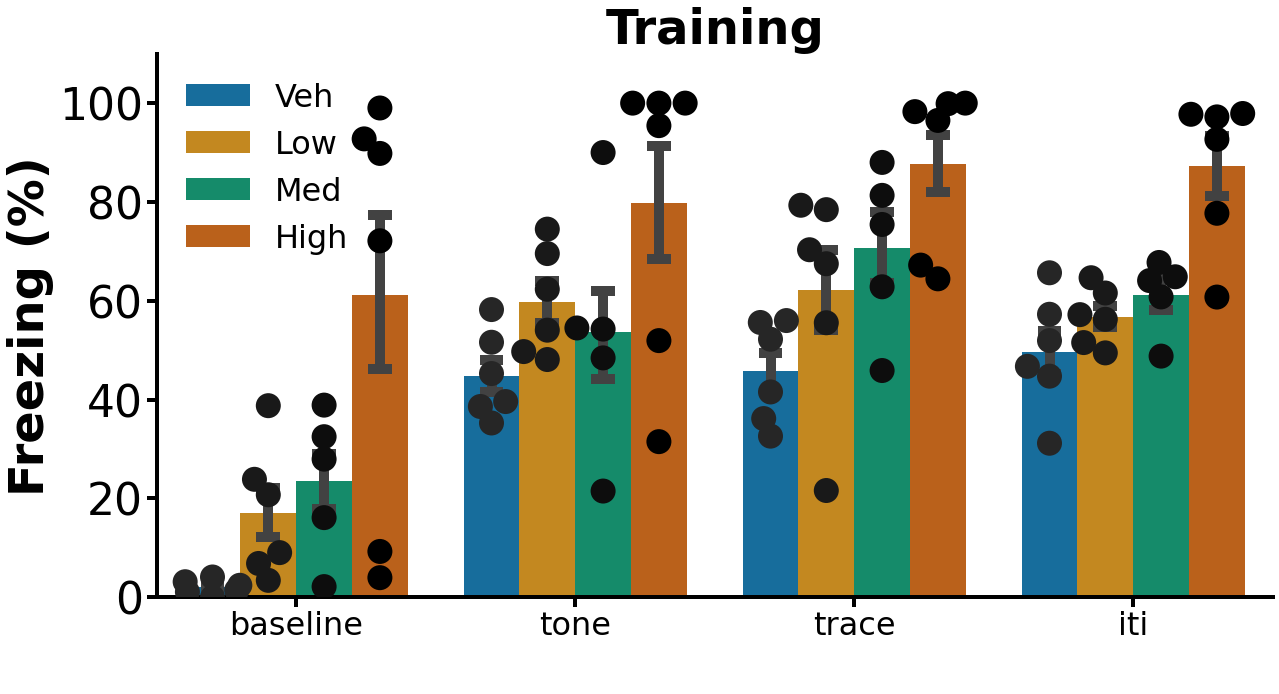

In [11]:
# bar plot grouped by phase

df_train_total = df_train_total[df_train_total.Animal != '9']
fd.tfc_barplot(df_train_total, hue='Condition',  hue_order = ['Veh', 'Low', 'Med', 'High'], order=['baseline', 'tone', 'trace', 'iti'], fig_name='Training', pts=True)
plt.ylim(0,110)
# Save figure
#plt.savefig(f'{path}/figures/{expt_name} train total.png')

[Text(0, 0, 'Baseline'), Text(1, 0, 'Tone'), Text(2, 0, 'Trace')]

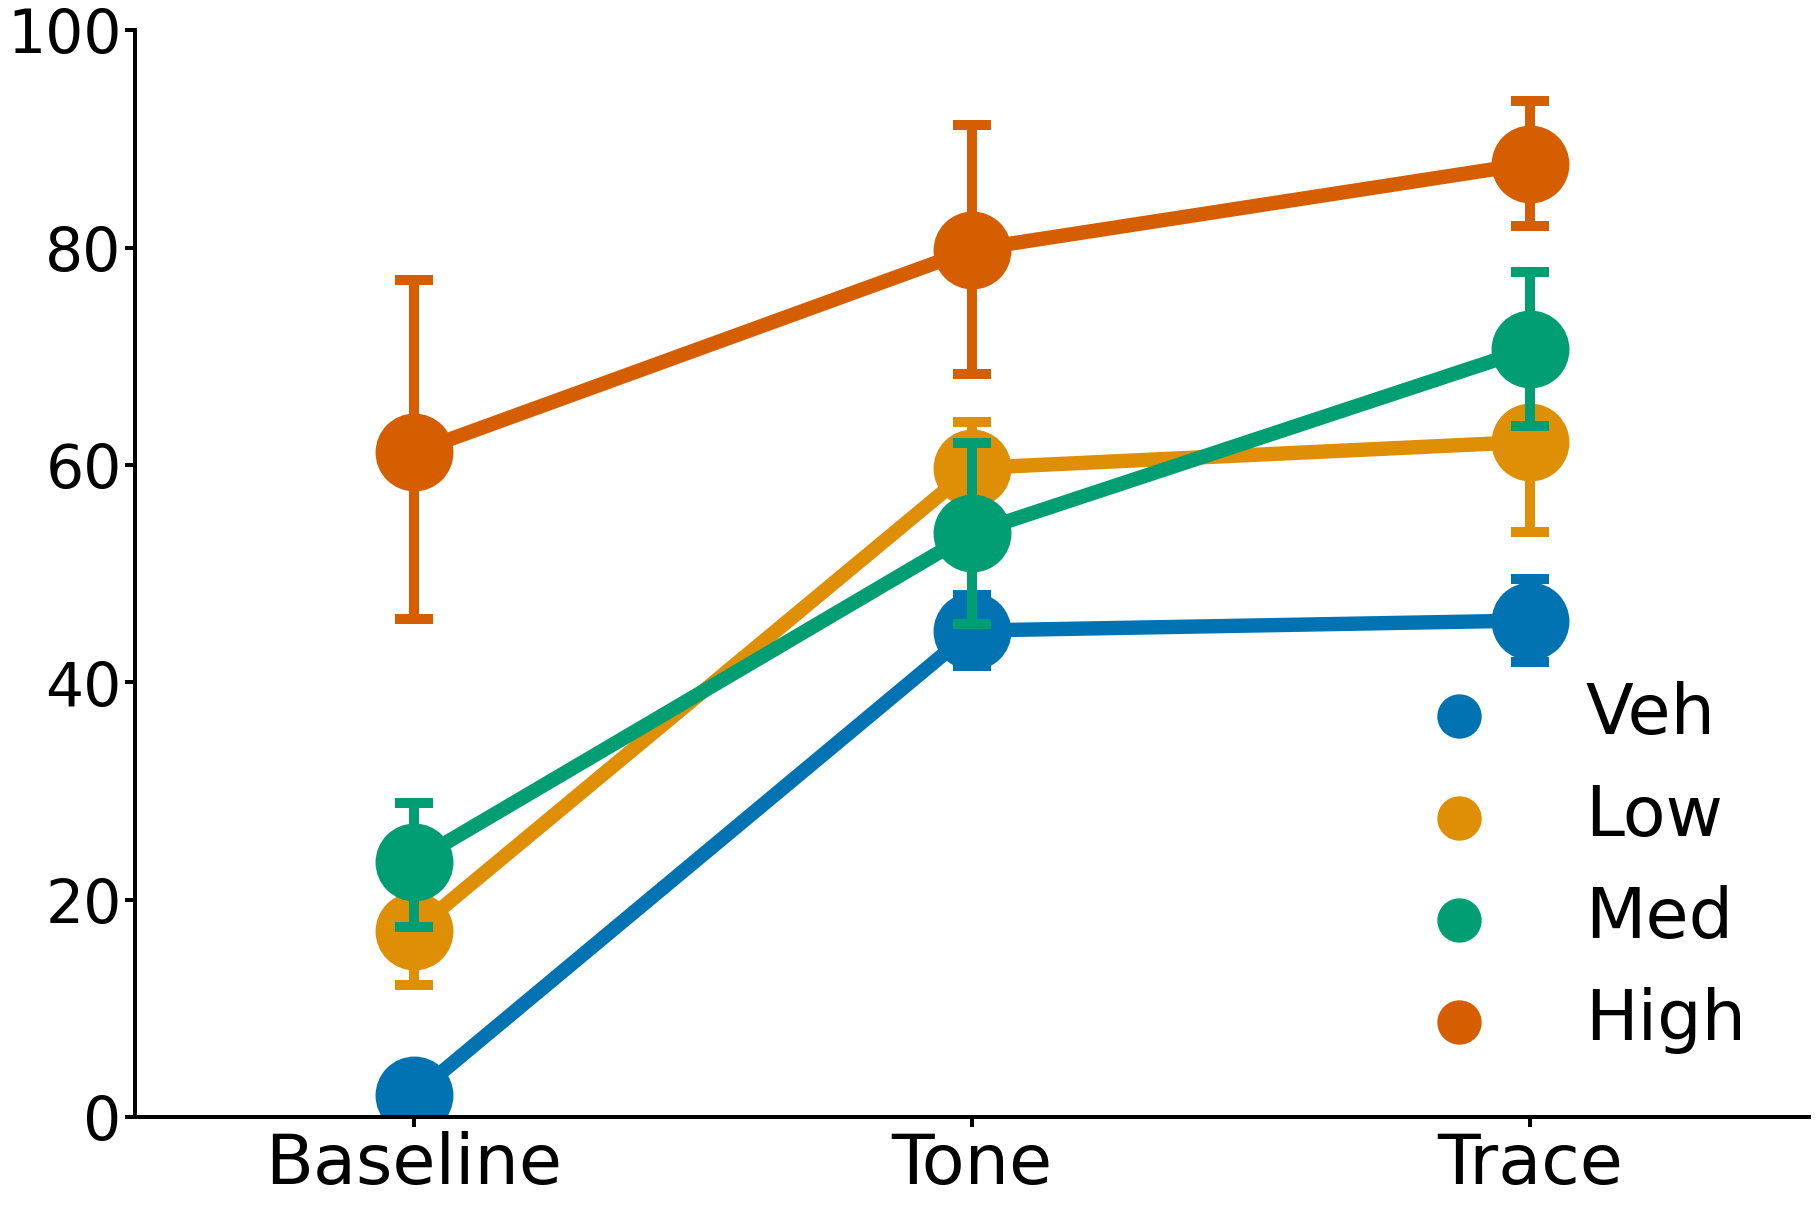

In [12]:
fd.tfc_plot(df_train_total, xvar = 'Phase', min_bins= False,tone_squares=False, trace_squares=False,
         shock_line=False,hue='Condition', order = ['baseline', 'tone', 'trace'],hue_order = ['Veh', 'Low', 'Med', 'High'], 
         errwidth=10,scale = 2, marker_size = 4500)
plt.ylim((0,100));
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.legend(markerscale = .5, fontsize = 70)
ax.set_xticklabels(['Baseline', 'Tone', 'Trace'], size = 70)

#plt.savefig(f'{path}/figures/LC ArchT TFC Train Total Line.png')

<a id='to'></a>
## Tone Test

<a id='lcto'></a>
### Load and Clean Tone Test Data

In [13]:
# load data
tone_file = f'{path}data-raw/2021-07-07 Prazosin and Propranolol TFC Tone Test.csv'
df_tone_raw = fd.load_df(tone_file)

# clean data (take from MedAssociates format to simple csv table)
df_tone = fd.clean_df(df_tone_raw)


for animal in df_tone.Animal:
    if animal in  veh:
        df_tone.loc[df_tone['Animal'] == animal, 'Condition'] = 'Veh'

        
for animal in df_tone.Animal:
    if animal in  high:
        df_tone.loc[df_tone['Animal'] == animal, 'Condition'] = 'High'
        
        
for animal in df_tone.Animal:
    if animal in  med:
        df_tone.loc[df_tone['Animal'] == animal, 'Condition'] = 'Med'

                
for animal in df_tone.Animal:
    if animal in  low:
        df_tone.loc[df_tone['Animal'] == animal, 'Condition'] = 'Low'
        
df_tone['Sex'] = 'M'

df_tone = df_tone[df_tone.Animal != '9']

# create a df w/ values averaged for each phase (i.e. baseline, tone, etc.) w/in each animal
df_tone_total = fd.total_df(df_tone, grp2='Condition')


In [14]:
df_tone.Animal.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
      dtype=object)

In [15]:
# Save Processed Tone Test Data

#df_tone.to_csv(f'{path}data-processed/{expt_name} tone test bins.csv', index=False)
#df_tone_total.to_csv(f'{path}data-processed/{expt_name} tone test total.csv', index=False)

<a id='plto'></a>
### Plot Tone Test Data

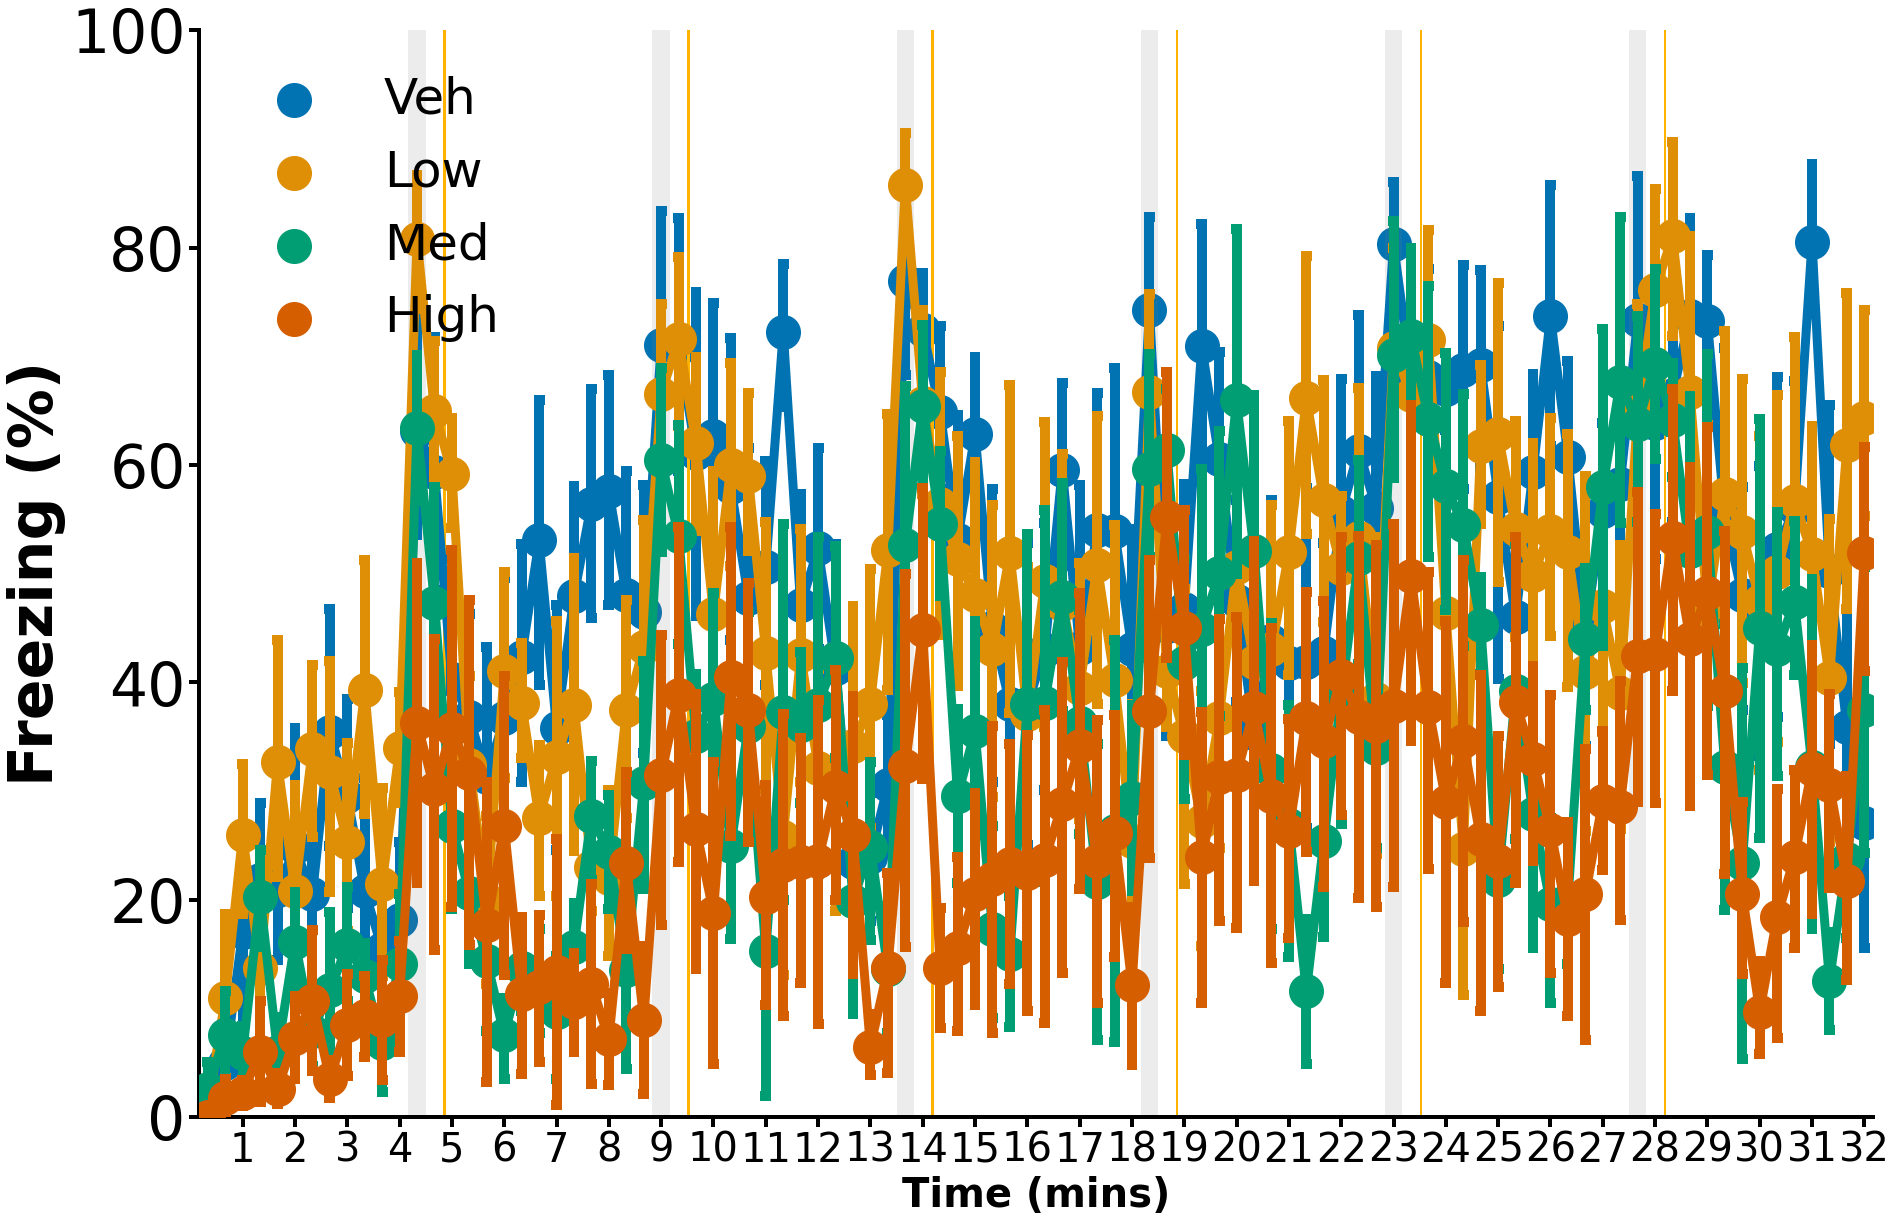

In [16]:
# binned plot

fd.tfc_plot(df_tone, has_hue=True, hue='Condition',hue_order = ['Veh', 'Low', 'Med', 'High'], ylim = (0, 100), fig_name='Tone Test')
plt.legend(fontsize=50);


# Save figure
#plt.savefig(f'{path}/figures/{expt_name} tone test trial.png')

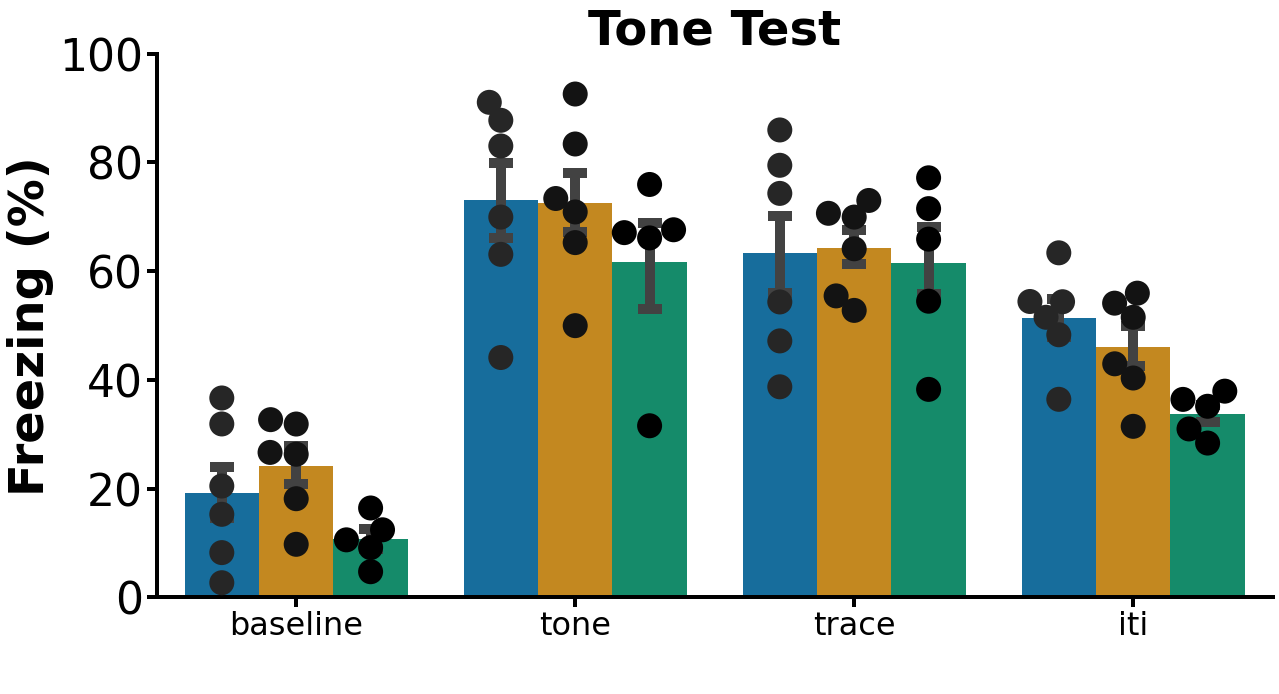

In [17]:
# bar plot

fd.tfc_barplot(df_tone_total, hue='Condition',hue_order = ['Veh', 'Low', 'Med'], order=['baseline', 'tone', 'trace', 'iti'], 
               fig_name='Tone Test', pts = True)
plt.ylim((0,100))
plt.legend('')
# Save figure
plt.savefig(f'{path}/figures/{expt_name} tone test total bar.png')

In [18]:

df_train.groupby(['Condition','Phase']).mean()

Group  Pct Component Time Freezing  Avg Motion Index
Condition Phase                                                         
High      baseline    NaN                    61.164722         41.114028
          iti         NaN                    87.330926          7.695463
          tone        NaN                    79.814444         13.405000
          trace       NaN                    87.722222          7.772222
Low       baseline    NaN                    17.120139        141.402222
          iti         NaN                    56.783611         39.609769
          tone        NaN                    59.714444         28.735000
          trace       NaN                    62.128889         25.206111
Med       baseline    NaN                    35.787222         85.762639
          iti         NaN                    66.552593         25.959074
          tone        NaN                    60.740556         26.456667
          trace       NaN                    75.055556         21.822222
Veh       baseline    NaN                     2.034722        239.599028
          iti         NaN                    49.591157         53.635046
          tone        NaN                    44.767778         81.753889
          trace       NaN                    45.695000         71.650556

<Figure size 720x720 with 0 Axes>

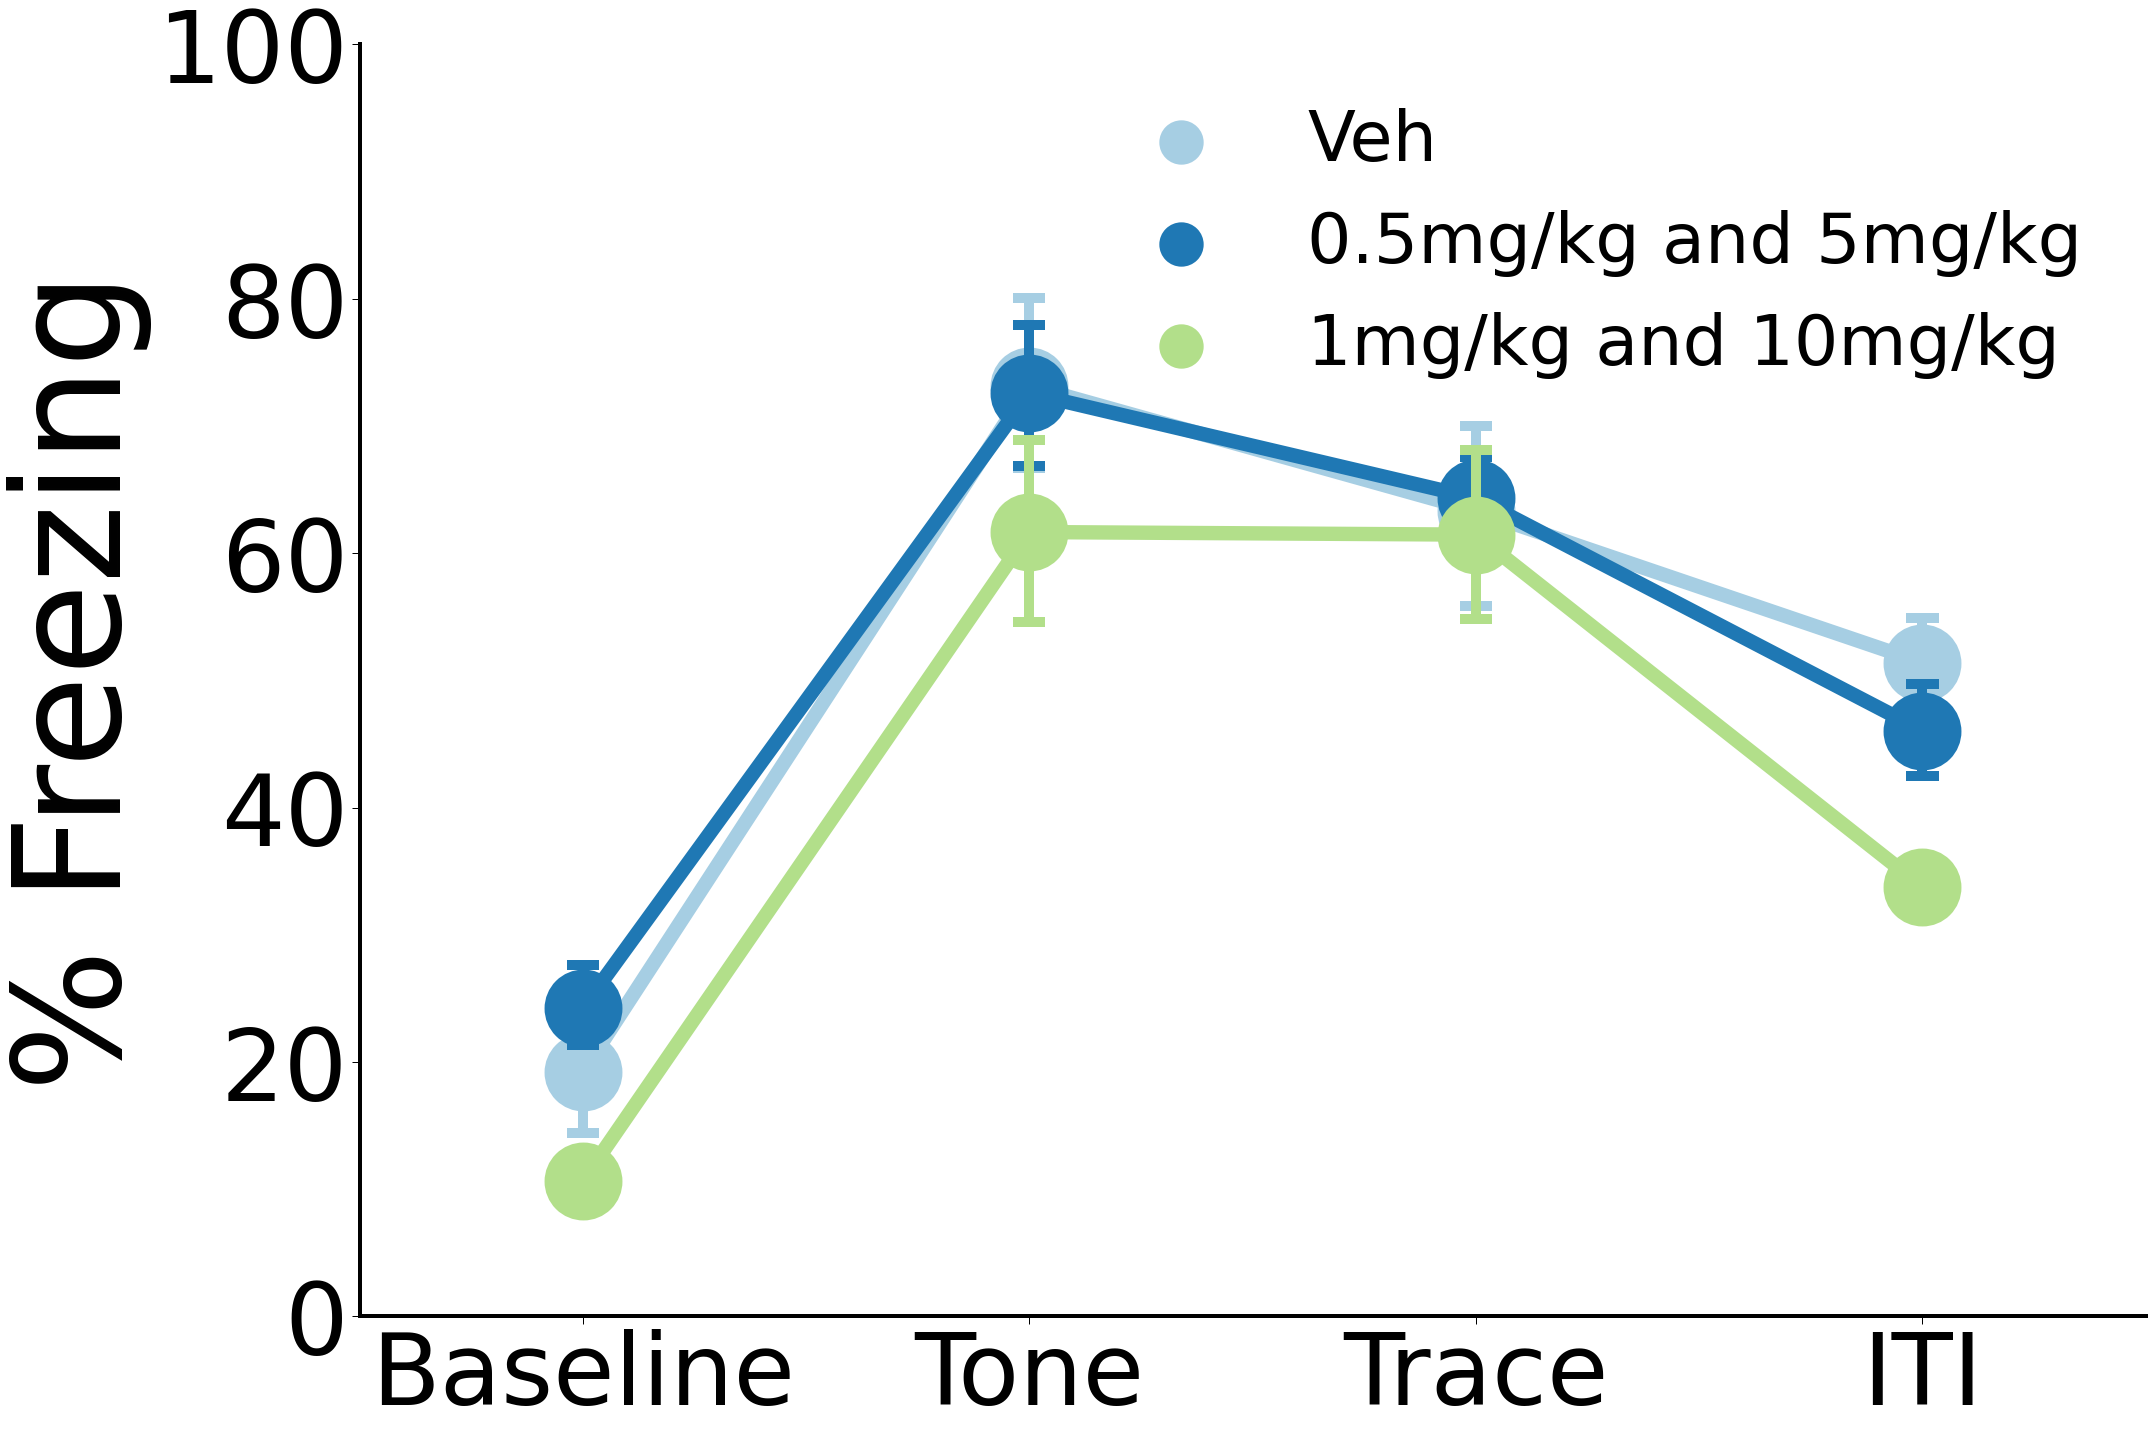

In [53]:
plt.figure(figsize = (10,10));

fd.tfc_plot(df_tone_total.query("Animal != '202'"), xvar = 'Phase', min_bins= False,tone_squares=False, trace_squares=False,
         shock_line=False,hue='Condition', order = ['baseline', 'tone', 'trace','iti' ], hue_order = ['Veh', 'Low', 'Med'], 
         errwidth=10,scale = 2, marker_size = 4500)

plt.ylim(0,100);
plt.xlabel('');
plt.ylabel('% Freezing', size = 150, weight = 'normal');
ax = plt.gca()
ax.set_xticklabels(['Baseline', 'Tone', 'Trace', 'ITI']);
ax.tick_params(labelsize=100, width=1, length=8);

L=ax.legend(markerscale = .5, fontsize = 70, loc = 'upper right')
L.get_texts()[0].set_text('Veh')
L.get_texts()[1].set_text('0.5mg/kg and 5mg/kg')
L.get_texts()[2].set_text('1mg/kg and 10mg/kg')



plt.tight_layout()
plt.savefig(f'{path}/figures/{expt_name} tone test total line.png')

## Second Training Session

In [14]:
# load data
train2_file = f'{path}data-raw/2021-05-06 LC ChR2 2s Stim All Phases TRAIN 2.csv'
df_train2_raw = fd.load_df(train2_file)

# clean data (take from MedAssociates format to simple csv table)
df_train2 = fd.clean_df(df_train2_raw)

# add group labels to animals
df_train2 = fd.add_group_labels(df_train2, grp_file=grp_label_file, exp_name='LC ChR2 2s Stim All Phases', grp2='Condition')


# create a df w/ values averaged for each phase (i.e. baseline, tone, etc.) w/in each animal
df_train2_total = fd.total_df(df_train2, grp2='Condition')


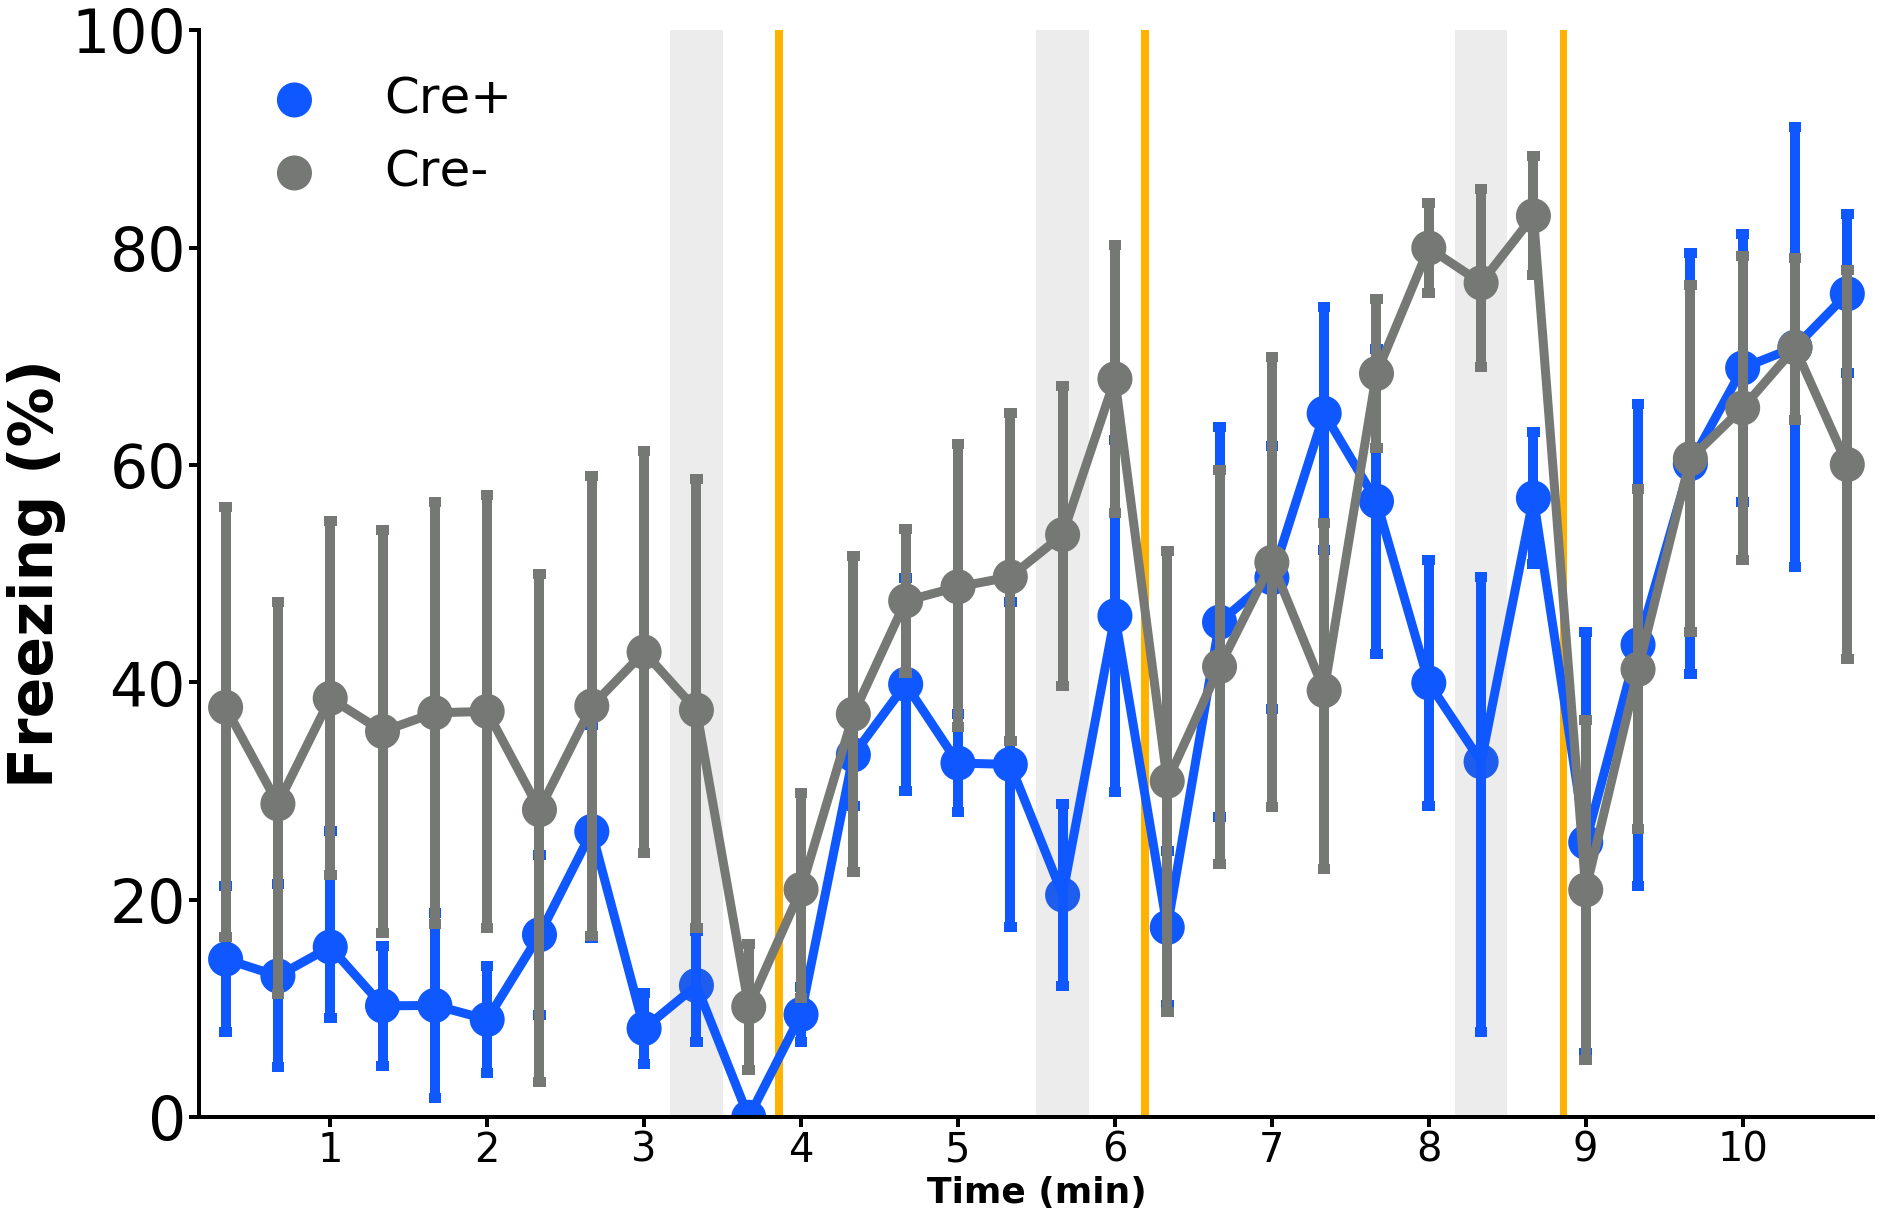

In [15]:
# binned plot (w/ time as x)


fd.tfc_plot(df_train2, has_hue=True, hue='Condition', hue_order=['Cre+', 'Cre-'], fig_name='Training')
plt.legend(fontsize = 50);

# Save figure
#plt.savefig(f'{path}/figures/{expt_name} train bins.png')
min_bins = [i for i in range(len(df_train['Component Name'].unique())) if (i+1) % 3 == 0]
min_labs = [ i+1 for i in range(len(min_bins)) ]
plt.xticks(min_bins, min_labs, rotation=0)
plt.xlabel('Time (min)', size = 36);
plt.savefig(f'{path}/figures/LC ChR2 TFC Train Trials.png')

[Text(0,0,'Baseline'), Text(0,0,'Tone'), Text(0,0,'Trace')]

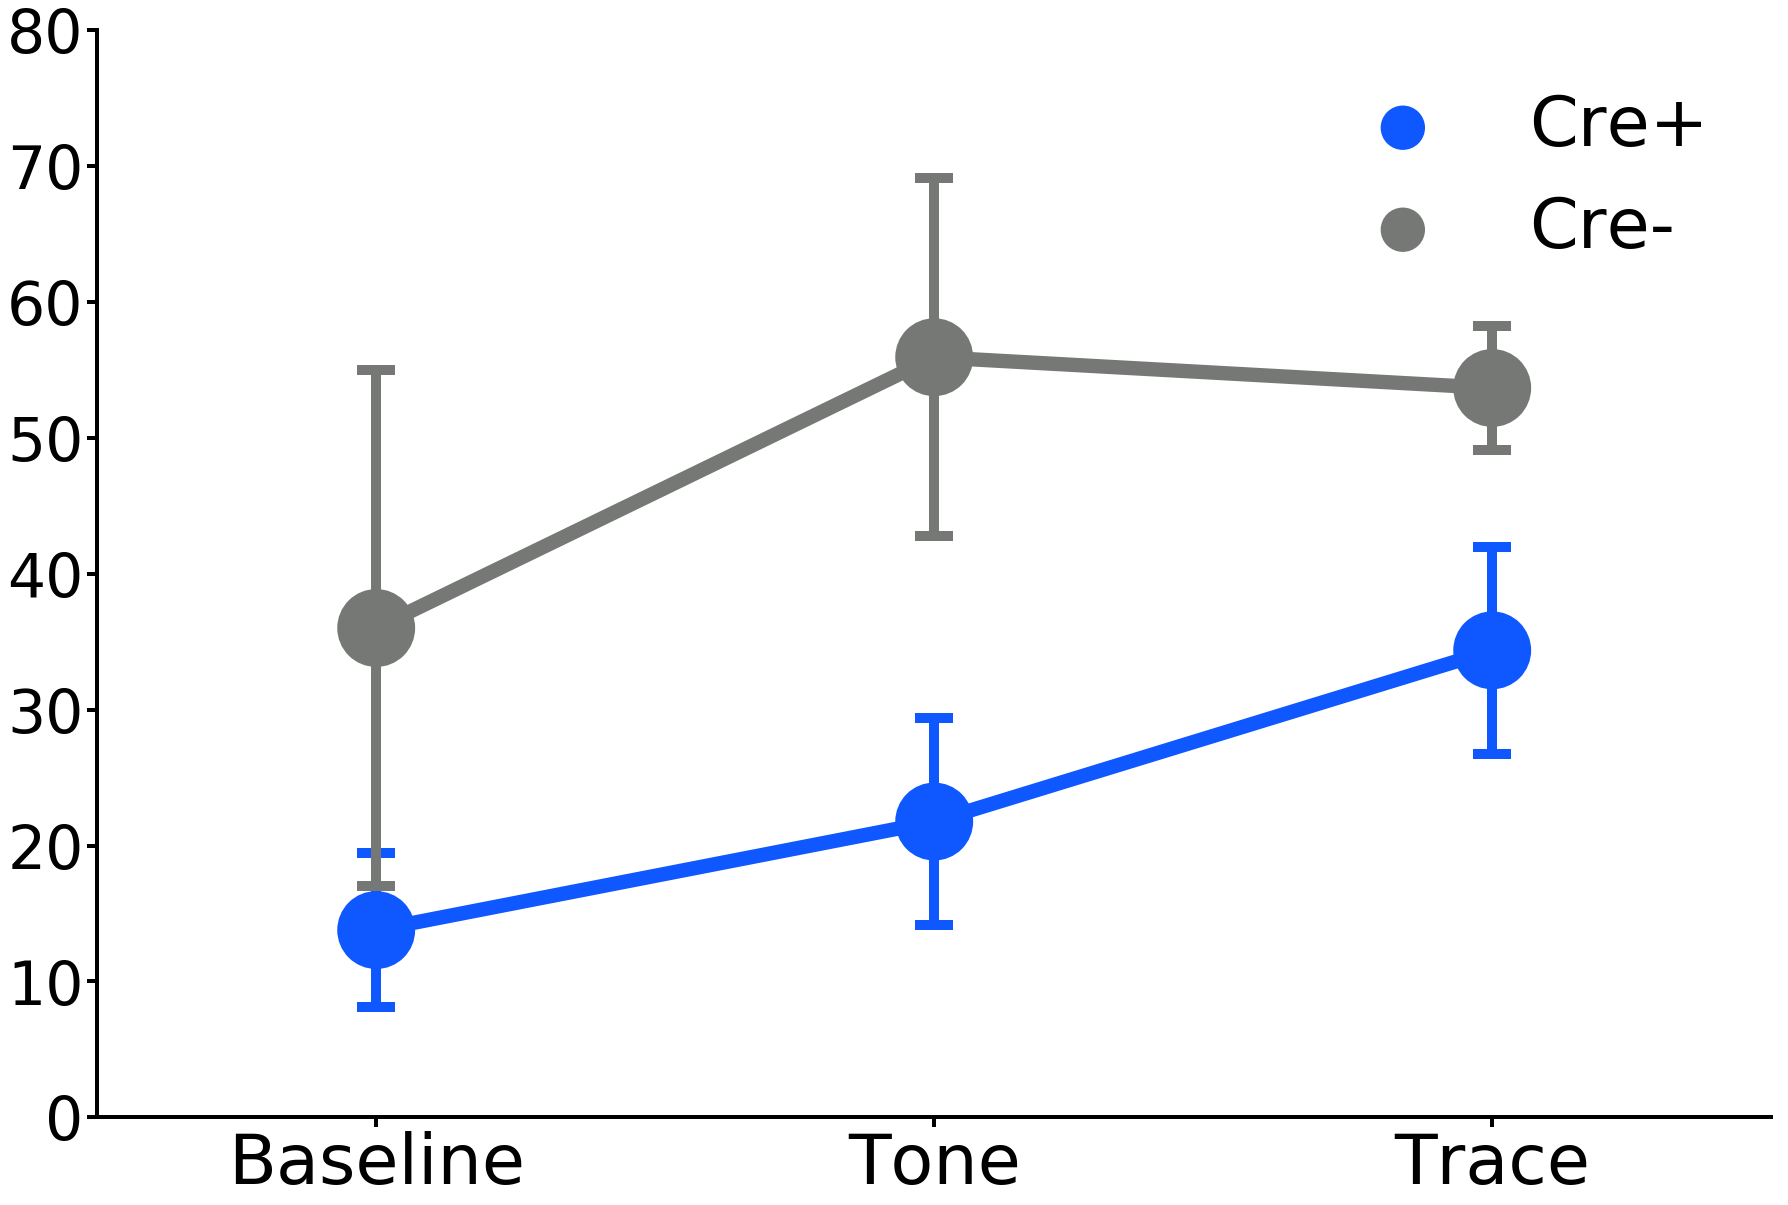

In [16]:
fd.tfc_plot(df_train2_total, xvar = 'Phase', min_bins= False,tone_squares=False, trace_squares=False,
         shock_line=False,hue='Condition', order = ['baseline', 'tone', 'trace'], hue_order=['Cre+', 'Cre-'], 
         errwidth=10,scale = 2, marker_size = 4500)
plt.ylim((0,80));
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.legend(markerscale = .5, fontsize = 70)
ax.set_xticklabels(['Baseline', 'Tone', 'Trace'], size = 70)


(0, 100)

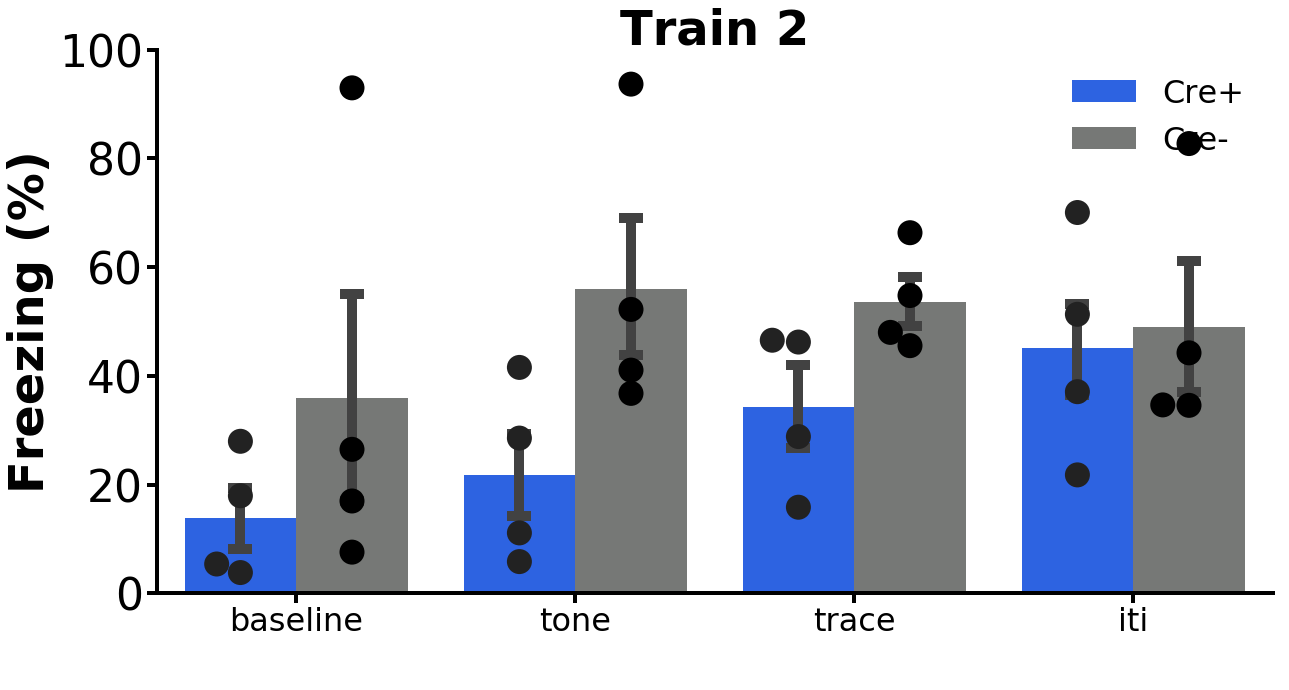

In [17]:
# bar plot

fd.tfc_barplot(df_train2_total, hue='Condition', order=['baseline', 'tone', 'trace', 'iti'], 
               fig_name='Train 2', pts = True)
plt.ylim((0,100))



## 2nd Tone Test

In [18]:
# load data
tone2_file = f'{path}data-raw/2021-05-07 LC ChR2 2s Stim All Phases 2nd TONE TEST.csv'
df_tone2_raw = fd.load_df(tone2_file)

# clean data (take from MedAssociates format to simple csv table)
df_tone2 = fd.clean_df(df_tone2_raw)

# add group labels to animals
df_tone2 = fd.add_group_labels(df_tone2, grp_file=grp_label_file, exp_name=expt_name, grp2= 'Condition')

# exclude animal that didn't get some shocks
#df_tone = df_tone[df_tone.Animal != '306']


# create a df w/ values averaged for each phase (i.e. baseline, tone, etc.) w/in each animal
df_tone2_total = fd.total_df(df_tone2, grp2='Condition')

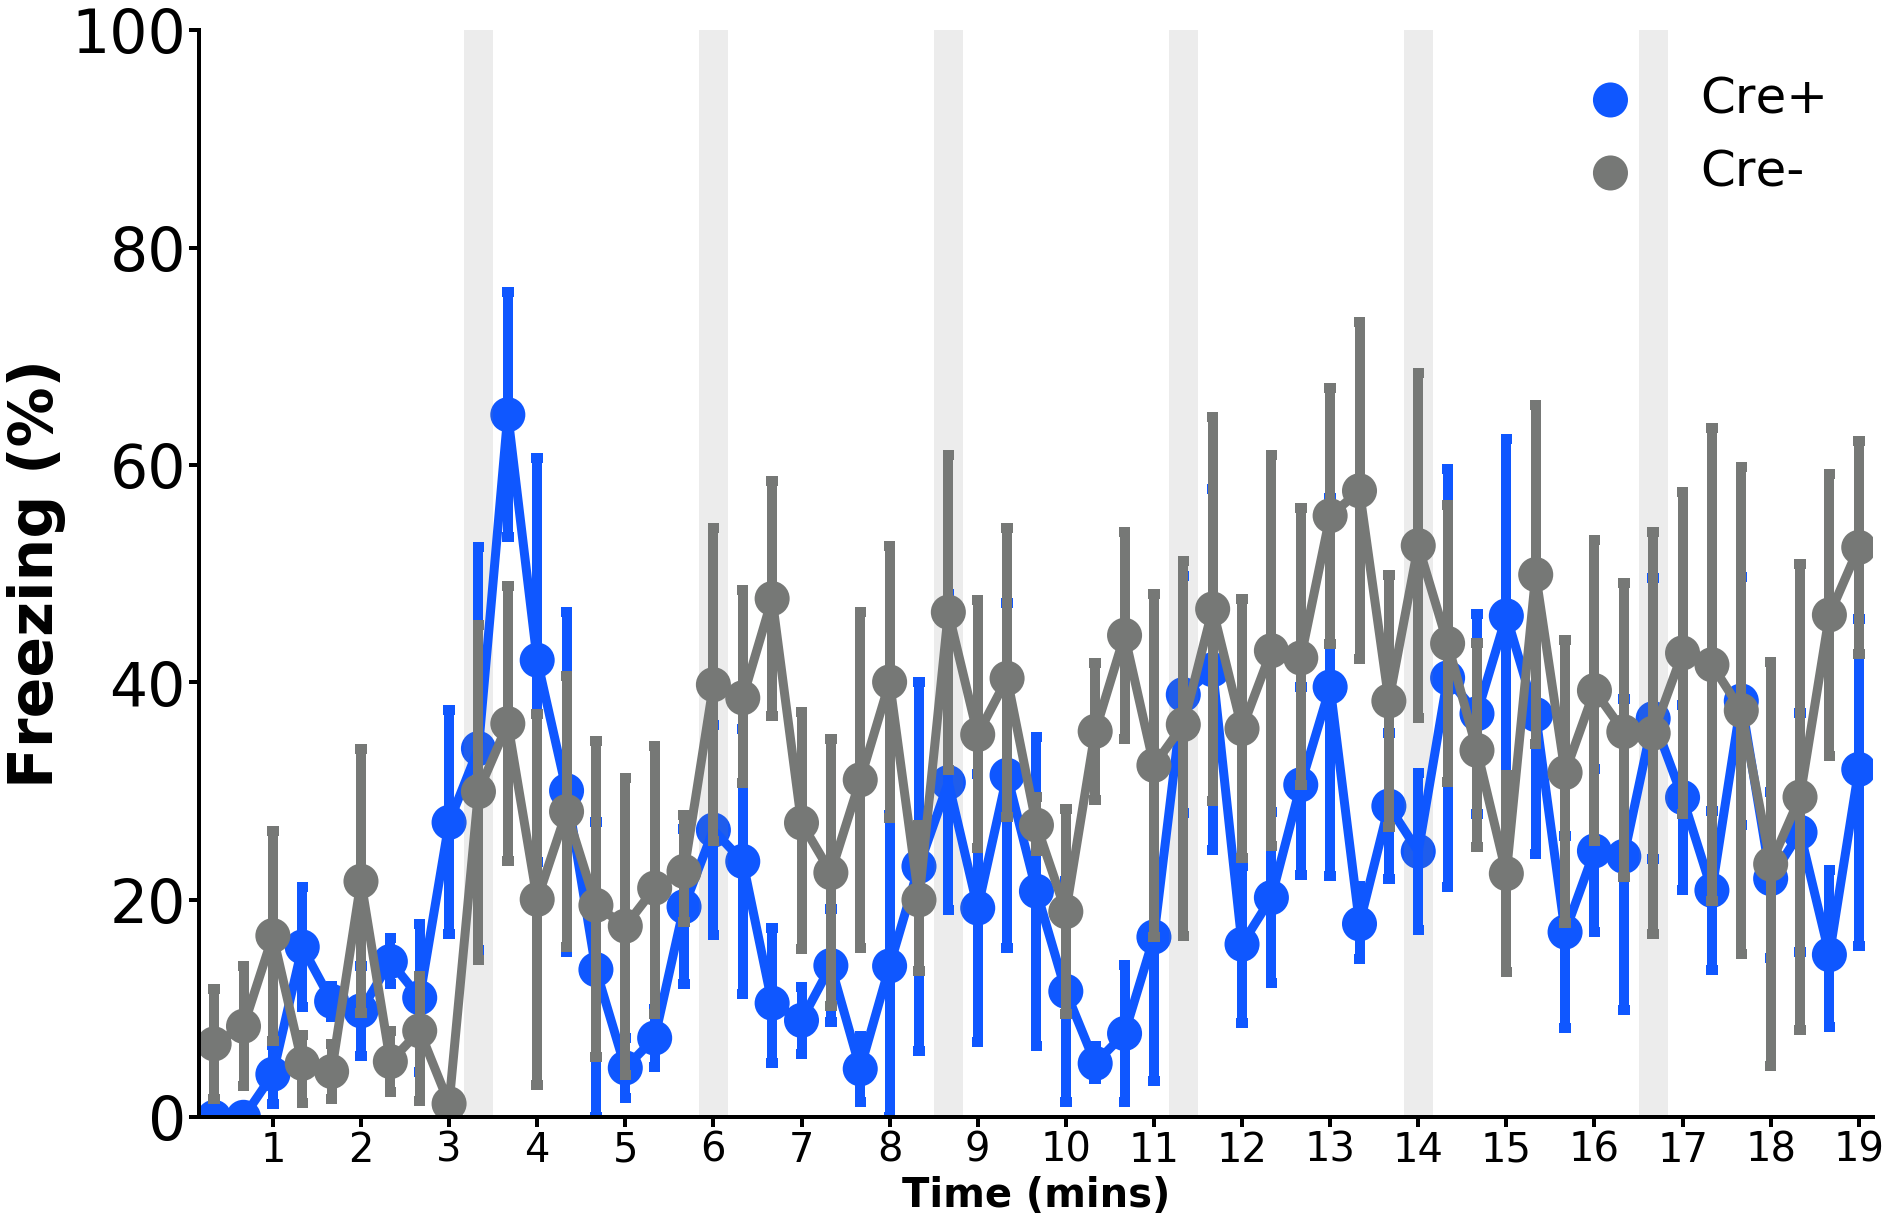

In [19]:
# binned plot

fd.tfc_plot(df_tone2, has_hue=True, hue='Condition', hue_order=['Cre+', 'Cre-'], shock_line=False,
            ylim = (0, 100),fig_name='Tone Test')
plt.legend(fontsize=50);


# Save figure
#plt.savefig(f'{path}/figures/{expt_name} tone test trial.png')

(0, 100)

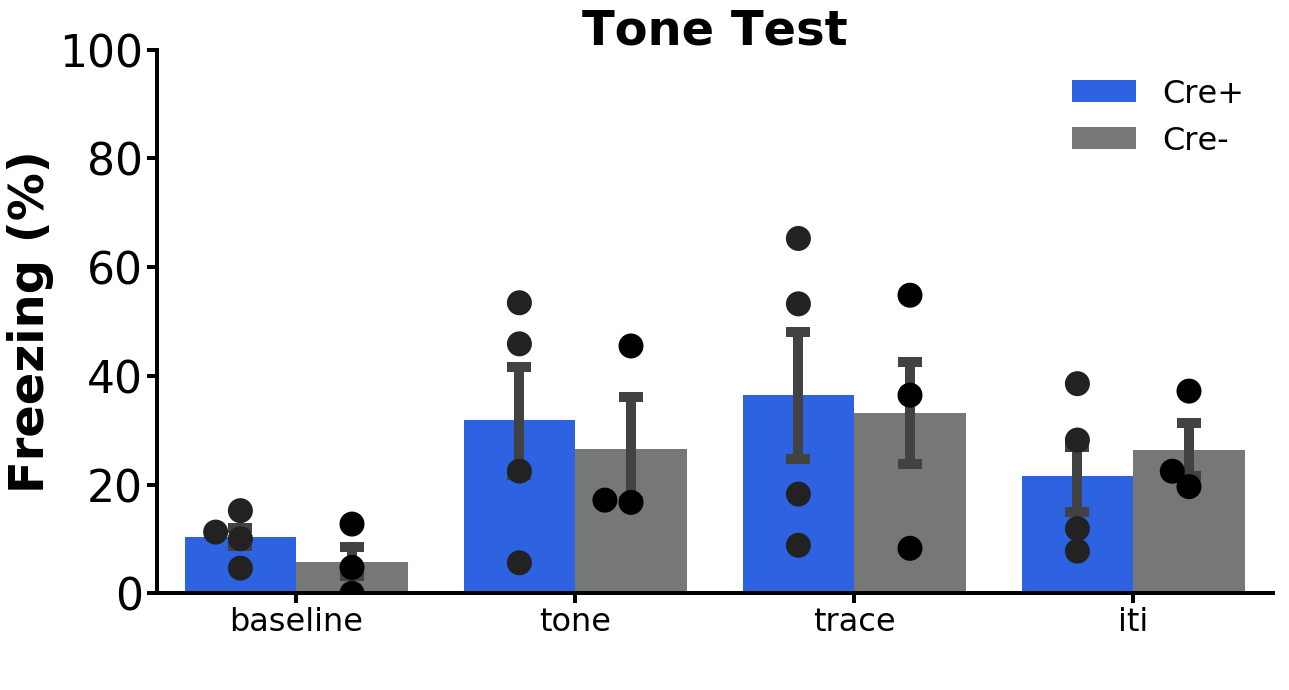

In [20]:
# bar plot

fd.tfc_barplot(df_tone2_total.query('Animal != "202"'), hue='Condition', hue_order=['Cre+','Cre-'], order=['baseline', 'tone', 'trace', 'iti'], 
               fig_name='Tone Test', pts = True)
plt.ylim((0,100))



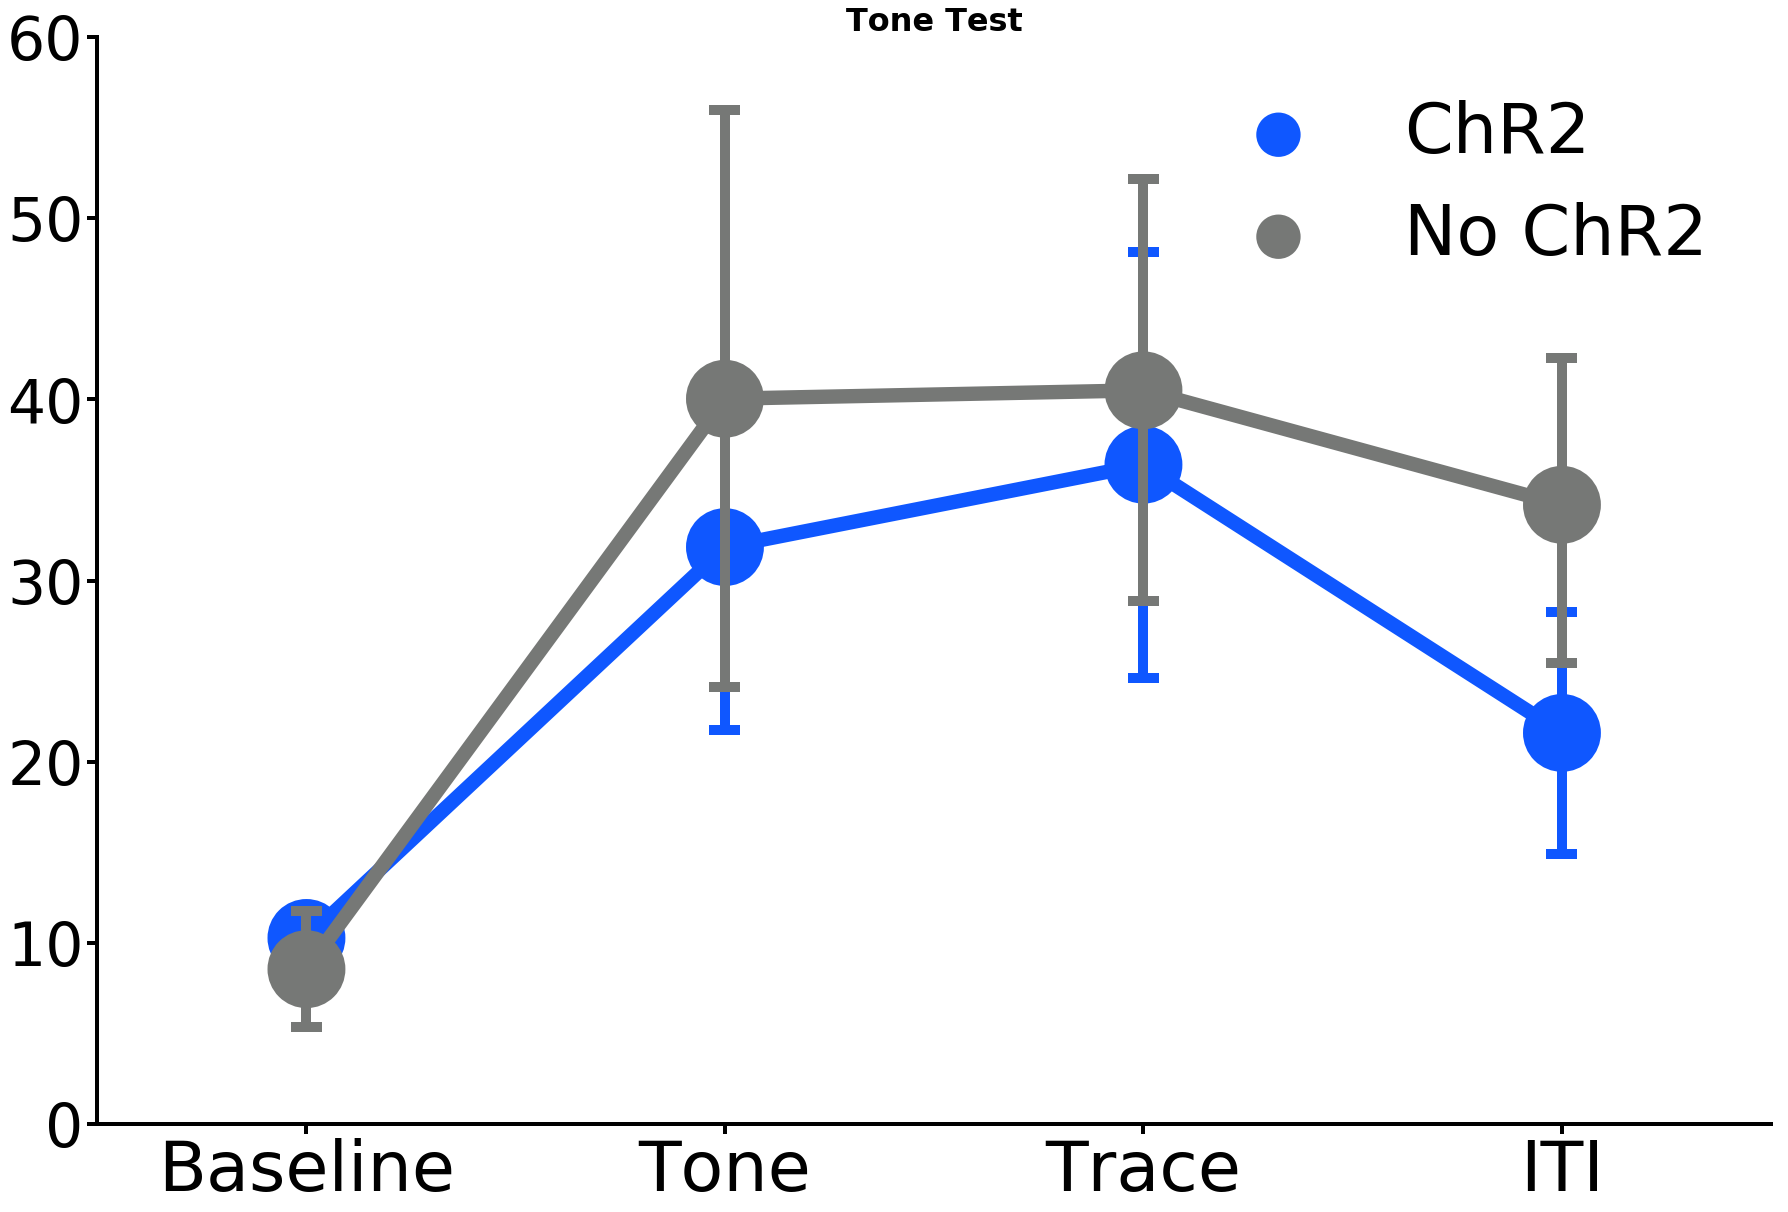

In [21]:
fd.tfc_plot(df_tone2_total, xvar = 'Phase', min_bins= False,tone_squares=False, trace_squares=False,
         shock_line=False,hue='Condition', order = ['baseline', 'tone', 'trace','iti' ], hue_order=['Cre+', 'Cre-'], 
         errwidth=10,scale = 2, marker_size = 4500)
plt.title('Tone Test')
plt.ylim((0,60));
plt.xlabel('');
plt.ylabel('');
ax = plt.gca()
ax.set_xticklabels(['Baseline', 'Tone', 'Trace', 'ITI'], size = 70);

L=ax.legend(markerscale = .5, fontsize = 70)
L.get_texts()[0].set_text('ChR2')
L.get_texts()[1].set_text('No ChR2')

plt.savefig(f'{path}/figures/{expt_name} 2nd tone test total line.png')

## Extinction D1

In [22]:
# load data
ext_file = f'{path}data-raw/2021-05-08 LC ChR2 2s Stim All Phases Extinction Day 1.csv'
df_ext_raw = fd.load_df(ext_file)

# clean data (take from MedAssociates format to simple csv table)
df_ext = fd.clean_df(df_ext_raw)

# add group labels to animals
df_ext = fd.add_group_labels(df_ext, grp_file=grp_label_file, exp_name=expt_name, grp2= 'Condition')

# exclude animal that didn't get some shocks
#df_tone = df_tone[df_tone.Animal != '306']


# create a df w/ values averaged for each phase (i.e. baseline, tone, etc.) w/in each animal
df_ext_total = fd.total_df(df_ext, grp2='Condition')

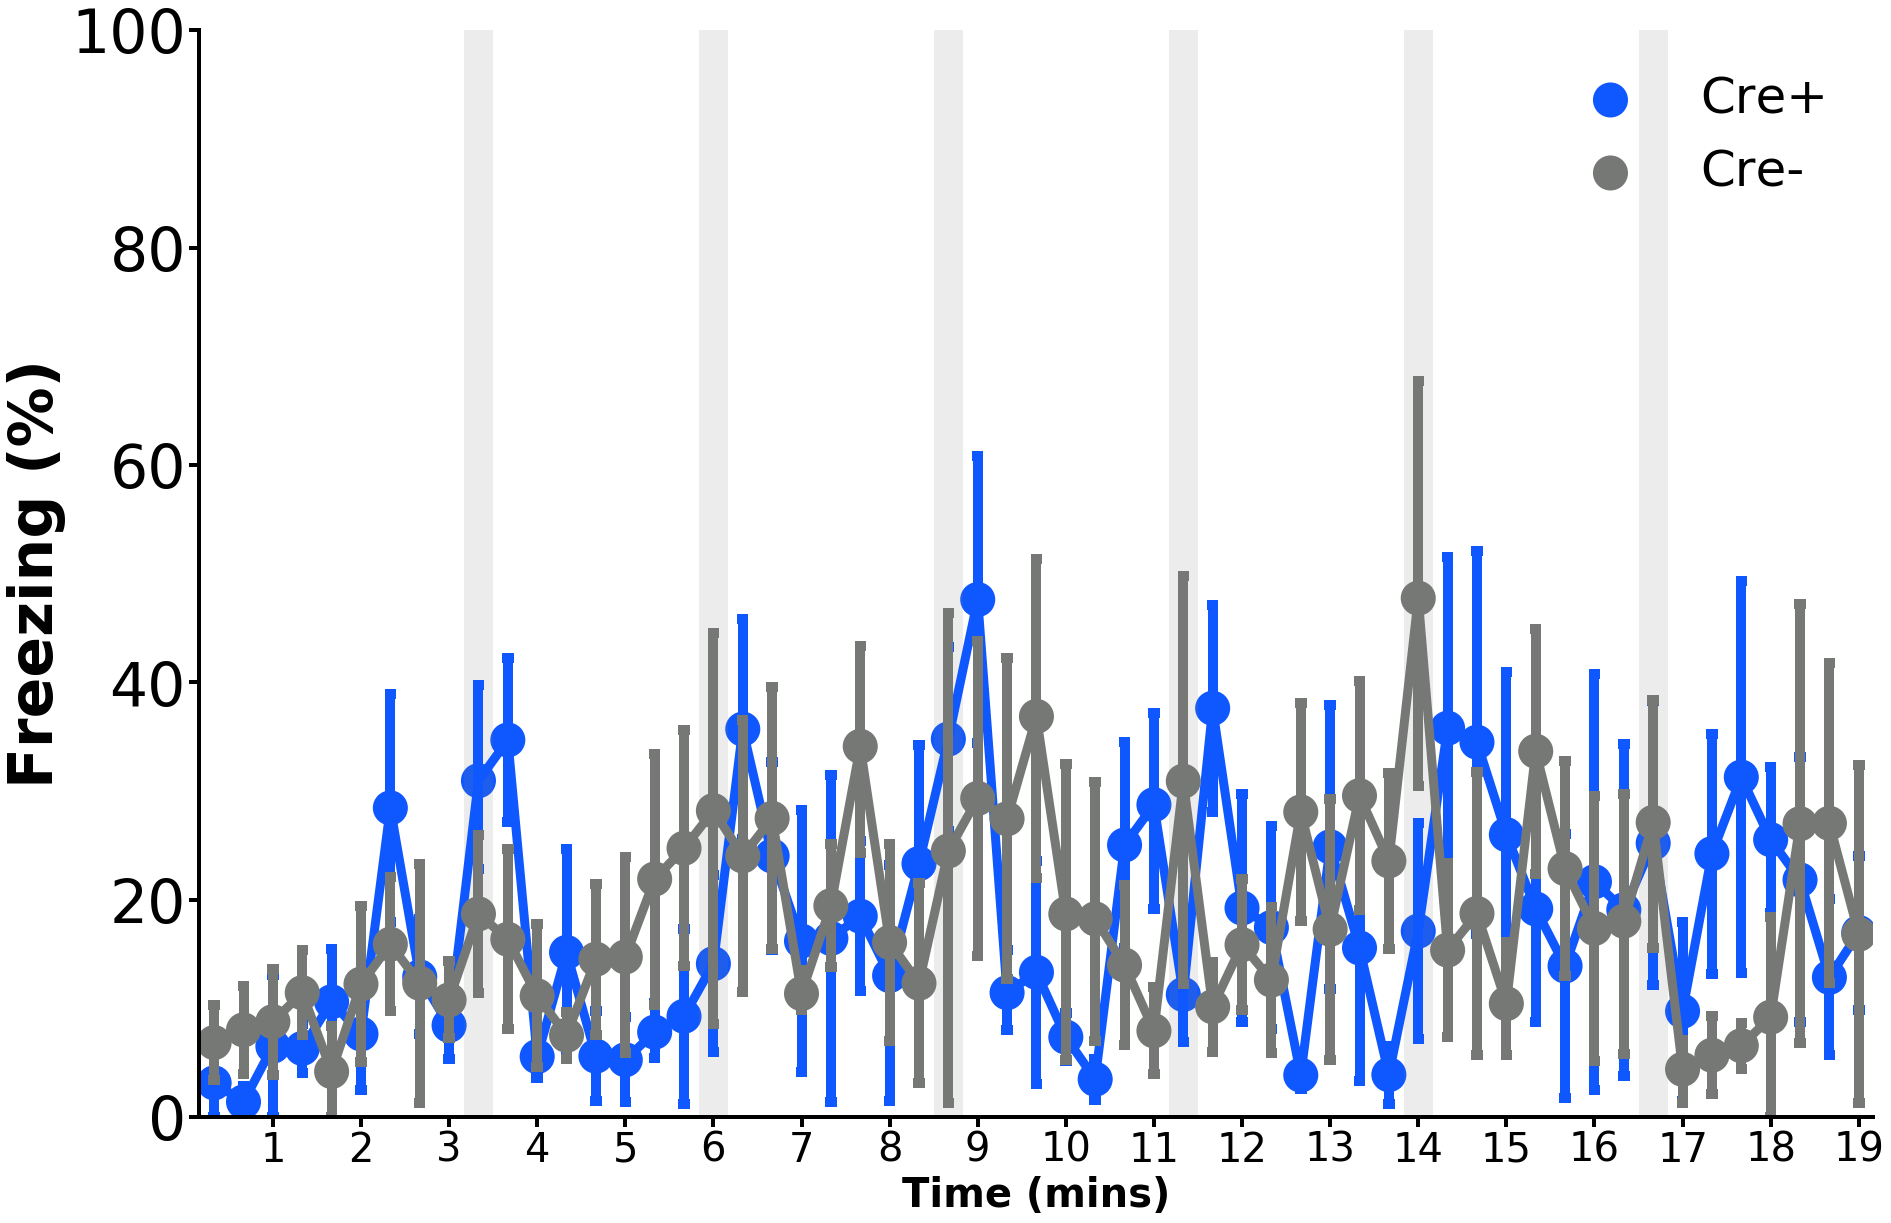

In [23]:
# binned plot

fd.tfc_plot(df_ext, has_hue=True, hue='Condition', hue_order=['Cre+', 'Cre-'],shock_line=False, ylim = (0, 100),fig_name='Tone Test')
plt.legend(fontsize=50);


# Save figure
#plt.savefig(f'{path}/figures/{expt_name} tone test trial.png')

(0, 100)

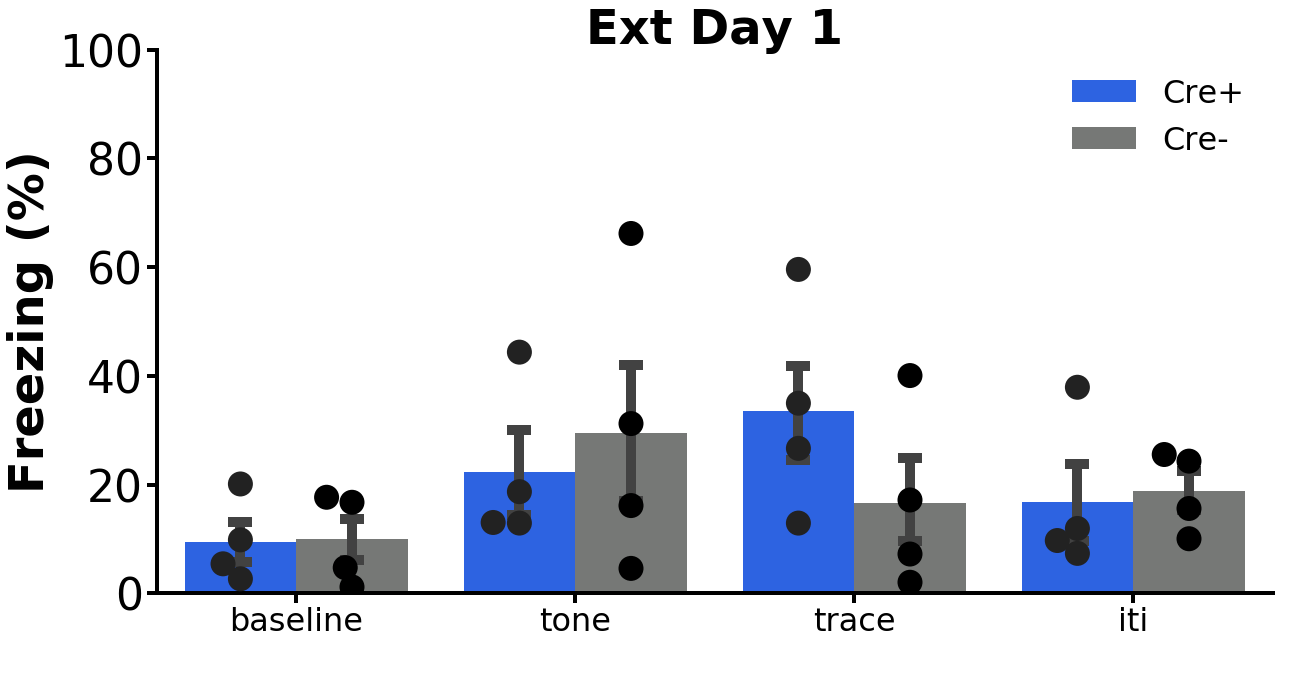

In [24]:
# bar plot

fd.tfc_barplot(df_ext_total, hue='Condition', hue_order=['Cre+','Cre-'], order=['baseline', 'tone', 'trace', 'iti'], 
               fig_name='Ext Day 1', pts = True)
plt.ylim((0,100))

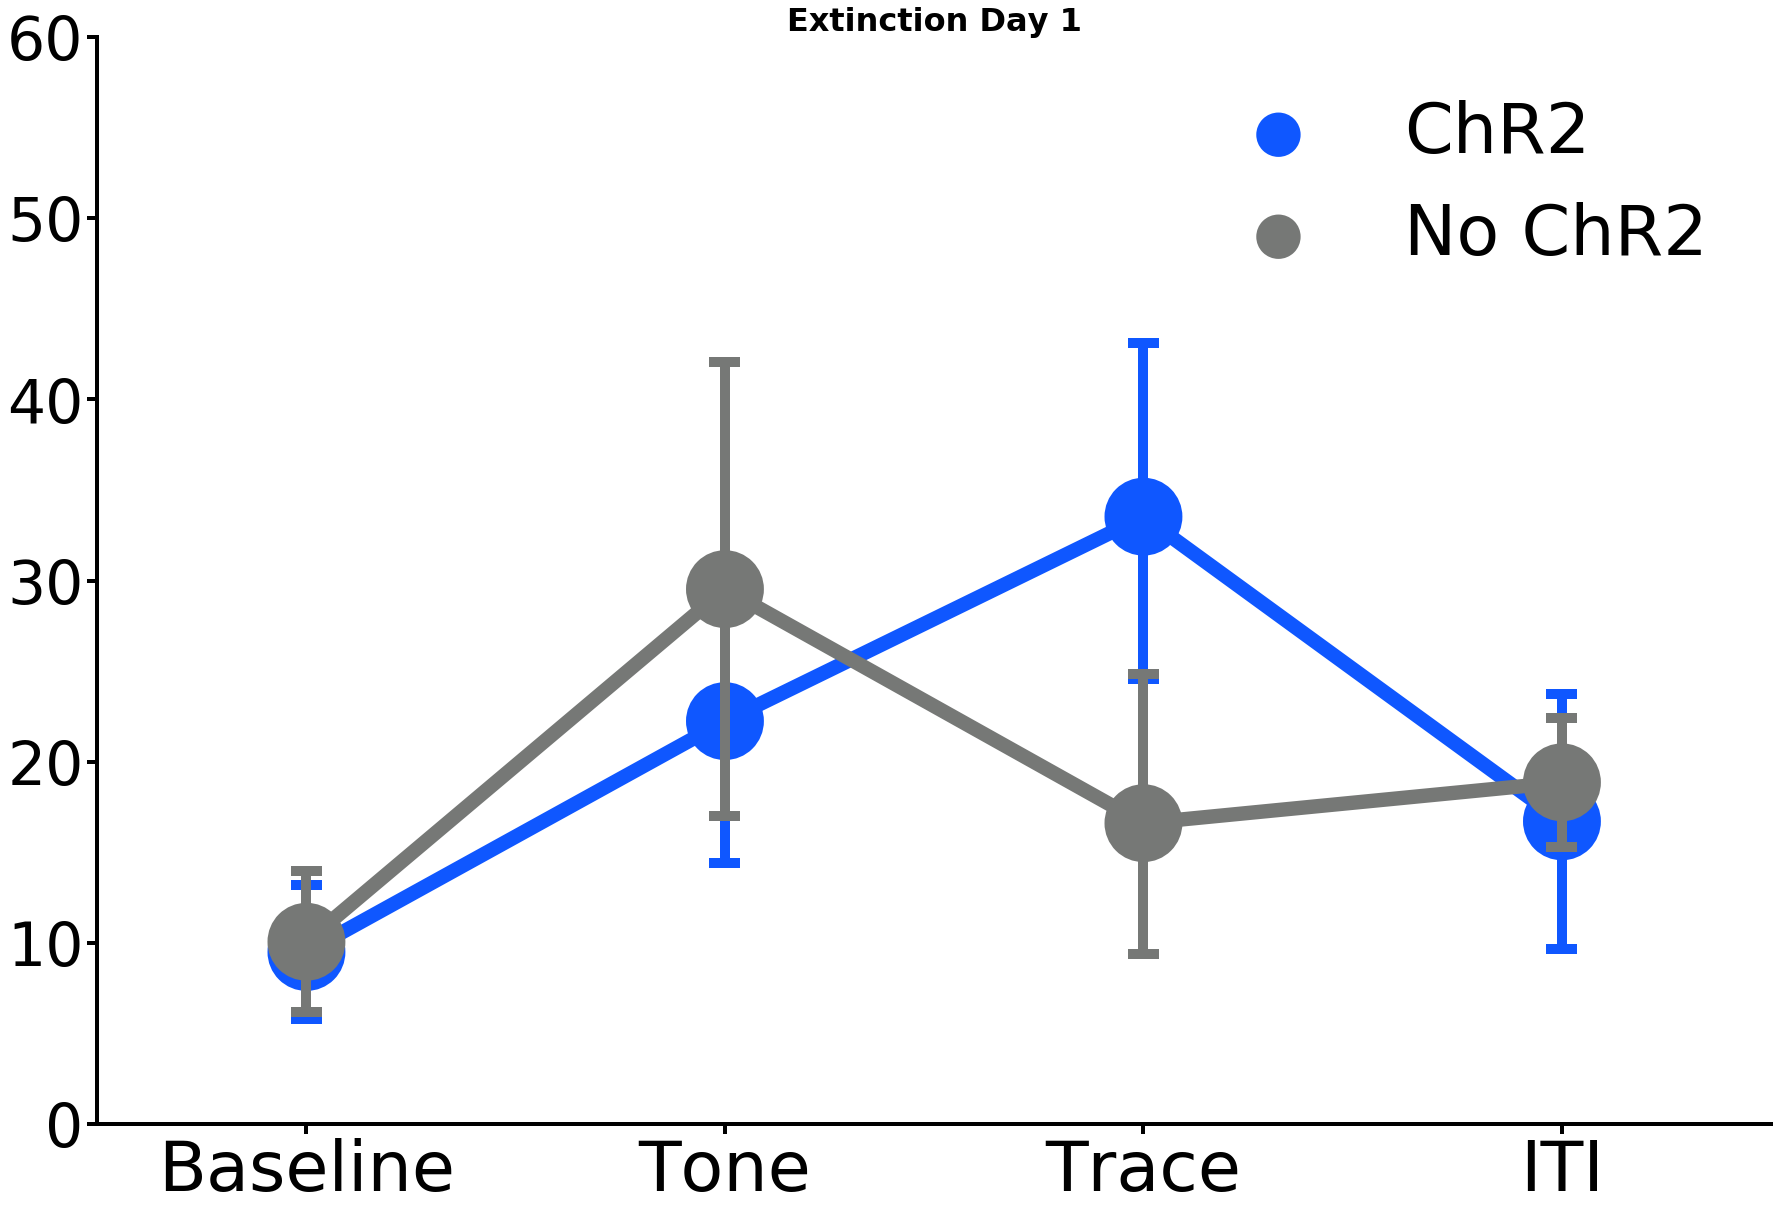

In [25]:
fd.tfc_plot(df_ext_total, xvar = 'Phase', min_bins= False,tone_squares=False, trace_squares=False,
         shock_line=False,hue='Condition', order = ['baseline', 'tone', 'trace','iti' ], hue_order=['Cre+', 'Cre-'], 
         errwidth=10,scale = 2, marker_size = 4500)

plt.title('Extinction Day 1')
plt.ylim((0,60));
plt.xlabel('');
plt.ylabel('');
ax = plt.gca()
ax.set_xticklabels(['Baseline', 'Tone', 'Trace', 'ITI'], size = 70);

L=ax.legend(markerscale = .5, fontsize = 70)
L.get_texts()[0].set_text('ChR2')
L.get_texts()[1].set_text('No ChR2')
plt.savefig(f'{path}/figures/{expt_name} Extinction 1 total line.png')

## Extinction Day 2

In [26]:
# load data
ext2_file = f'{path}data-raw/2021-05-09 LC ChR2 2s Stim All Phases Extinction Day 2.csv'
df_ext2_raw = fd.load_df(ext2_file)

# clean data (take from MedAssociates format to simple csv table)
df_ext2 = fd.clean_df(df_ext2_raw)

# add group labels to animals
df_ext2 = fd.add_group_labels(df_ext2, grp_file=grp_label_file, exp_name=expt_name, grp2= 'Condition')

# exclude animal that didn't get some shocks
#df_tone = df_tone[df_tone.Animal != '306']


# create a df w/ values averaged for each phase (i.e. baseline, tone, etc.) w/in each animal
df_ext2_total = fd.total_df(df_ext2, grp2='Condition')

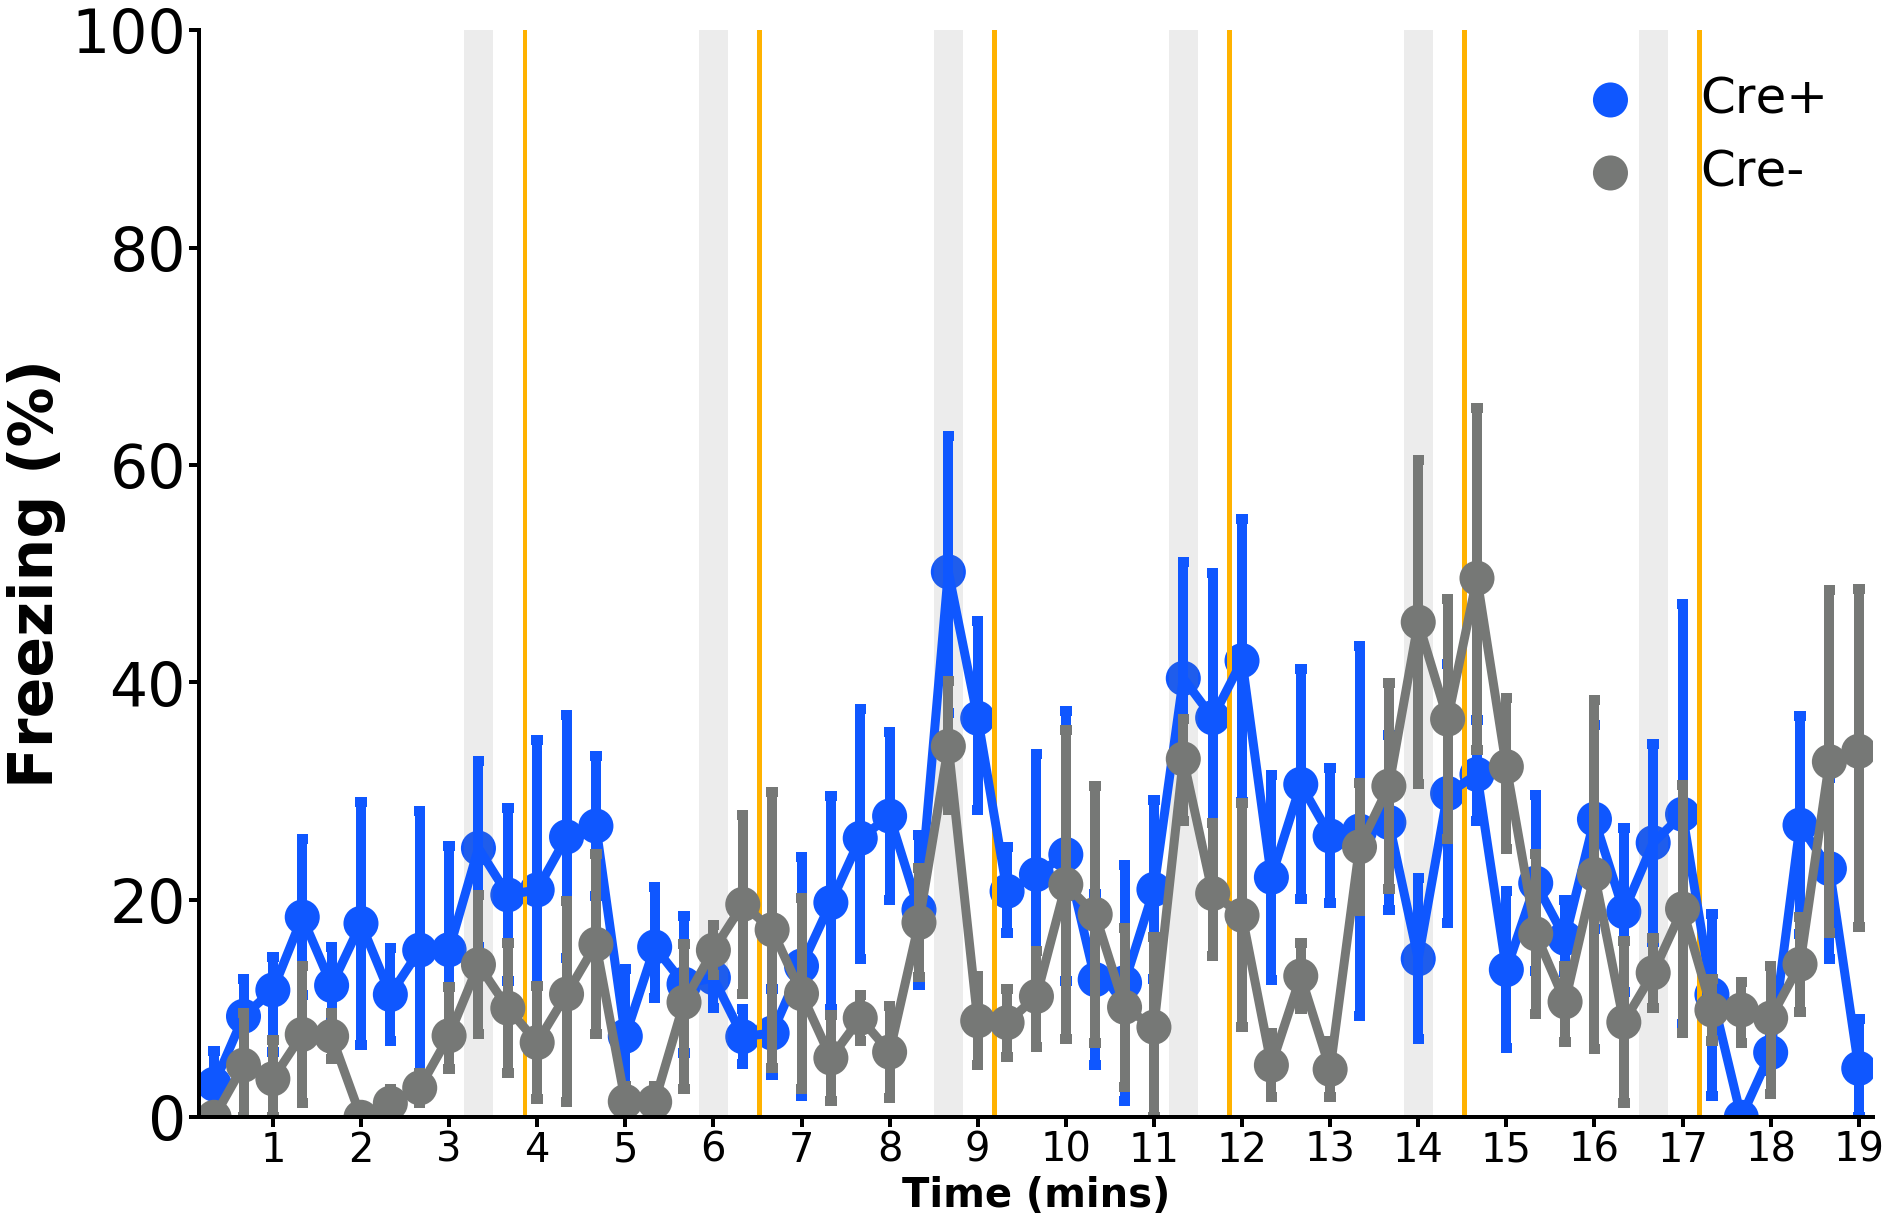

In [27]:
# binned plot

fd.tfc_plot(df_ext2, has_hue=True, hue='Condition', hue_order=['Cre+', 'Cre-'], ylim = (0, 100),fig_name='Tone Test')
plt.legend(fontsize=50);


# Save figure
#plt.savefig(f'{path}/figures/{expt_name} tone test trial.png')

(0, 100)

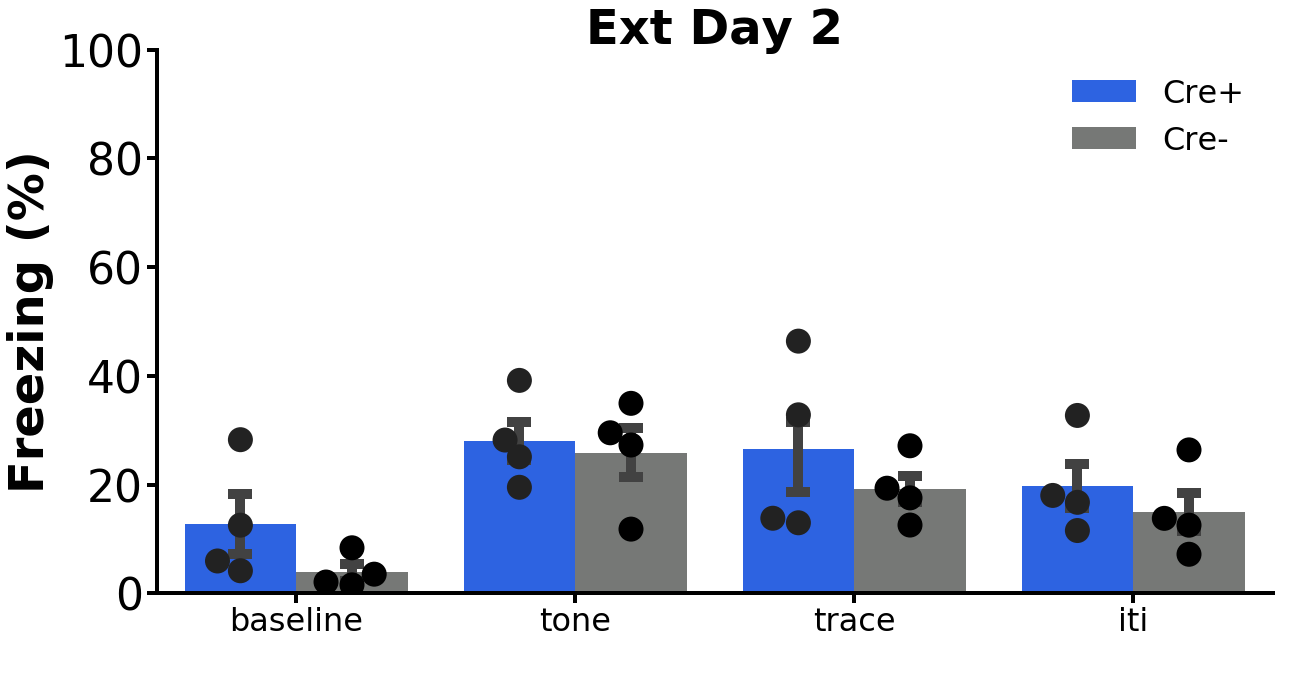

In [28]:
# bar plot

fd.tfc_barplot(df_ext2_total, hue='Condition', hue_order=['Cre+','Cre-'], order=['baseline', 'tone', 'trace', 'iti'], 
               fig_name='Ext Day 2', pts = True)
plt.ylim((0,100))

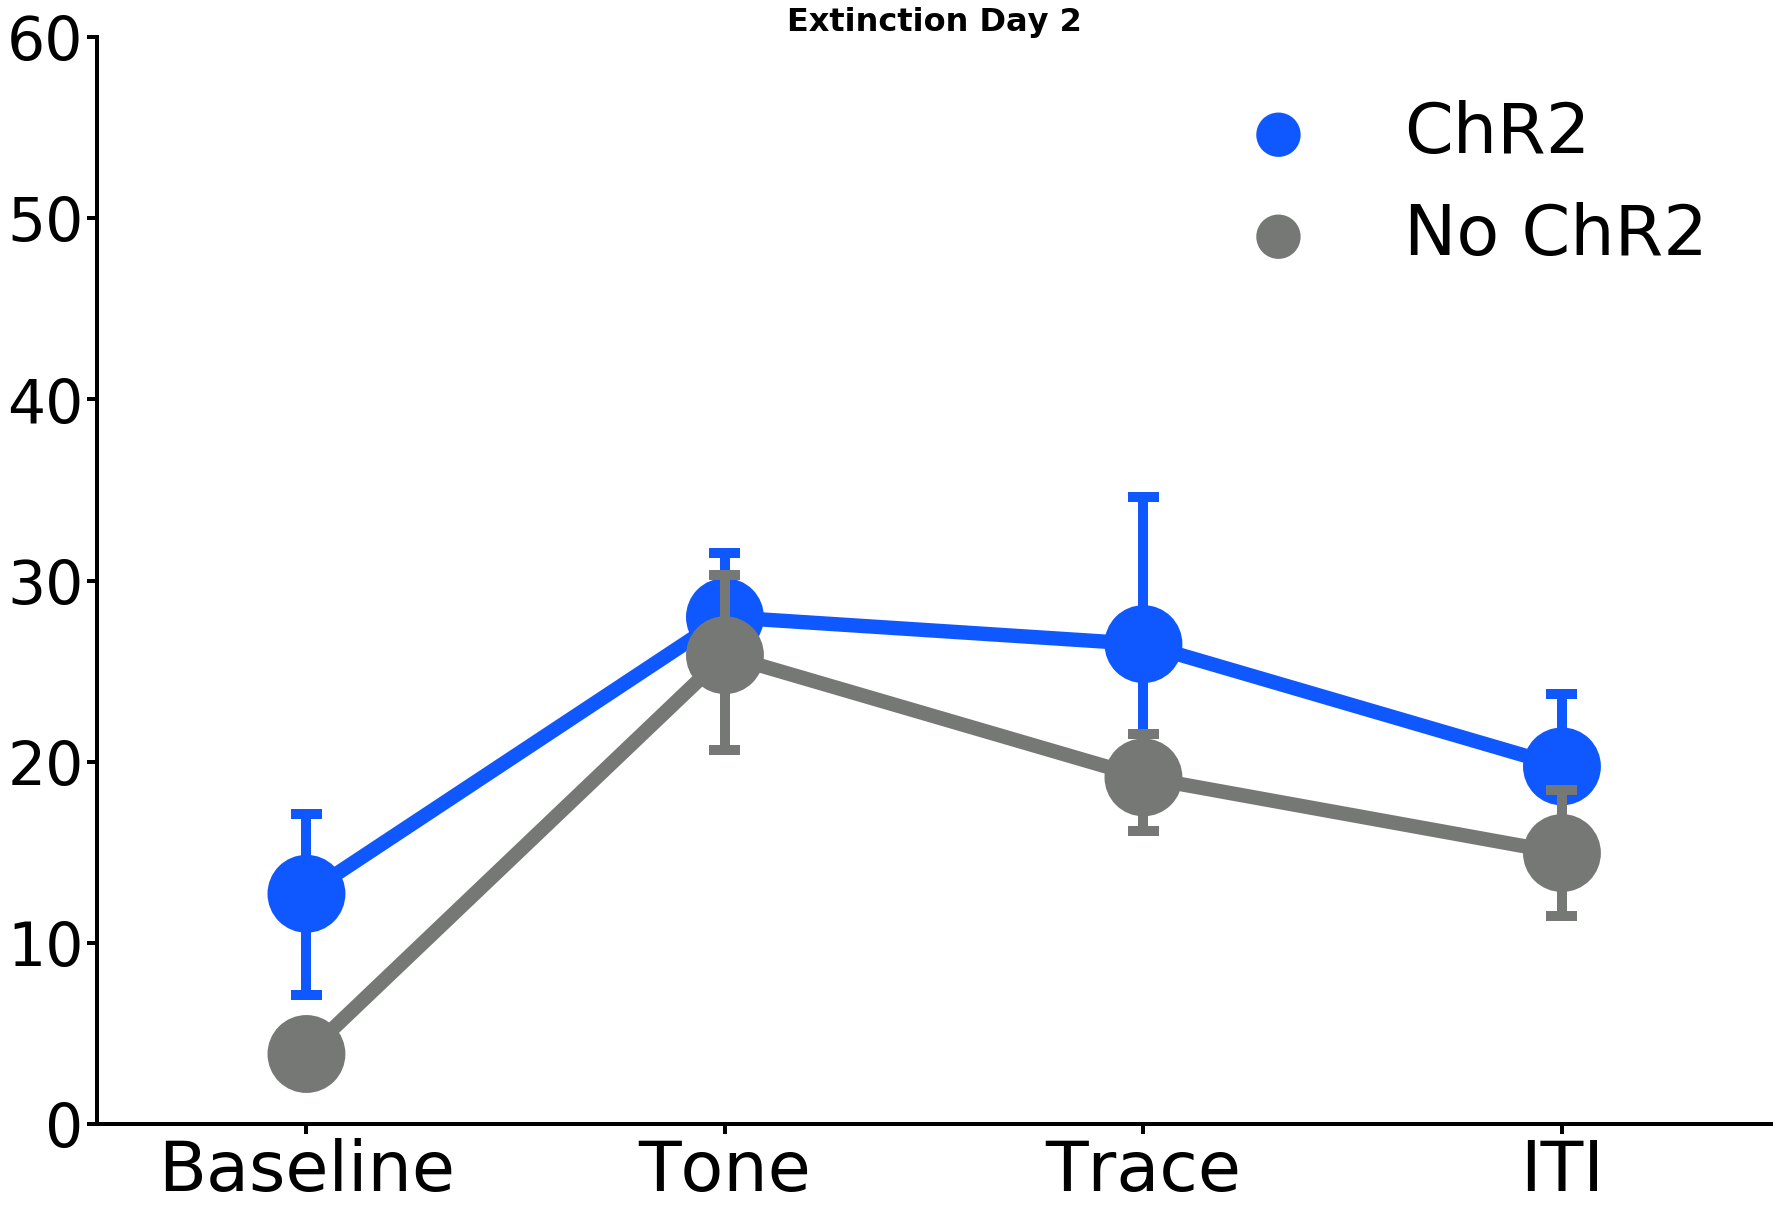

In [29]:

fd.tfc_plot(df_ext2_total, xvar = 'Phase', min_bins= False,tone_squares=False, trace_squares=False,
         shock_line=False,hue='Condition', order = ['baseline', 'tone', 'trace','iti' ], hue_order=['Cre+', 'Cre-'], 
         errwidth=10,scale = 2, marker_size = 4500)

plt.title('Extinction Day 2')
plt.ylim((0,60));
plt.xlabel('');
plt.ylabel('');
ax = plt.gca()
ax.set_xticklabels(['Baseline', 'Tone', 'Trace', 'ITI'], size = 70);

L=ax.legend(markerscale = .5, fontsize = 70)
L.get_texts()[0].set_text('ChR2')
L.get_texts()[1].set_text('No ChR2')
plt.savefig(f'{path}/figures/{expt_name} extinction day 2 total line.png')

## Extinction Day 3

In [30]:
# load data
ext3_file = f'{path}data-raw/2021-05-10 LC ChR2 2s Stim All Phases Extinction Day 3.csv'
df_ext3_raw = fd.load_df(ext3_file)

# clean data (take from MedAssociates format to simple csv table)
df_ext3 = fd.clean_df(df_ext3_raw)

# fix df bc of incorrect MedAssociates import
df_ext3 = df_ext3[df_ext3.Animal != 'nan']
animal = df_ext3.Animal.apply(float)
animal = animal.apply(int)
animal = animal.apply(str)

df_ext3['Animal'] = animal
# add group labels to animals
df_ext3 = fd.add_group_labels(df_ext3, grp_file=grp_label_file, exp_name=expt_name, grp2= 'Condition')

# exclude animal that didn't get some shocks
#df_tone = df_tone[df_tone.Animal != '306']


# create a df w/ values averaged for each phase (i.e. baseline, tone, etc.) w/in each animal
df_ext3_total = fd.total_df(df_ext3, grp2='Condition')

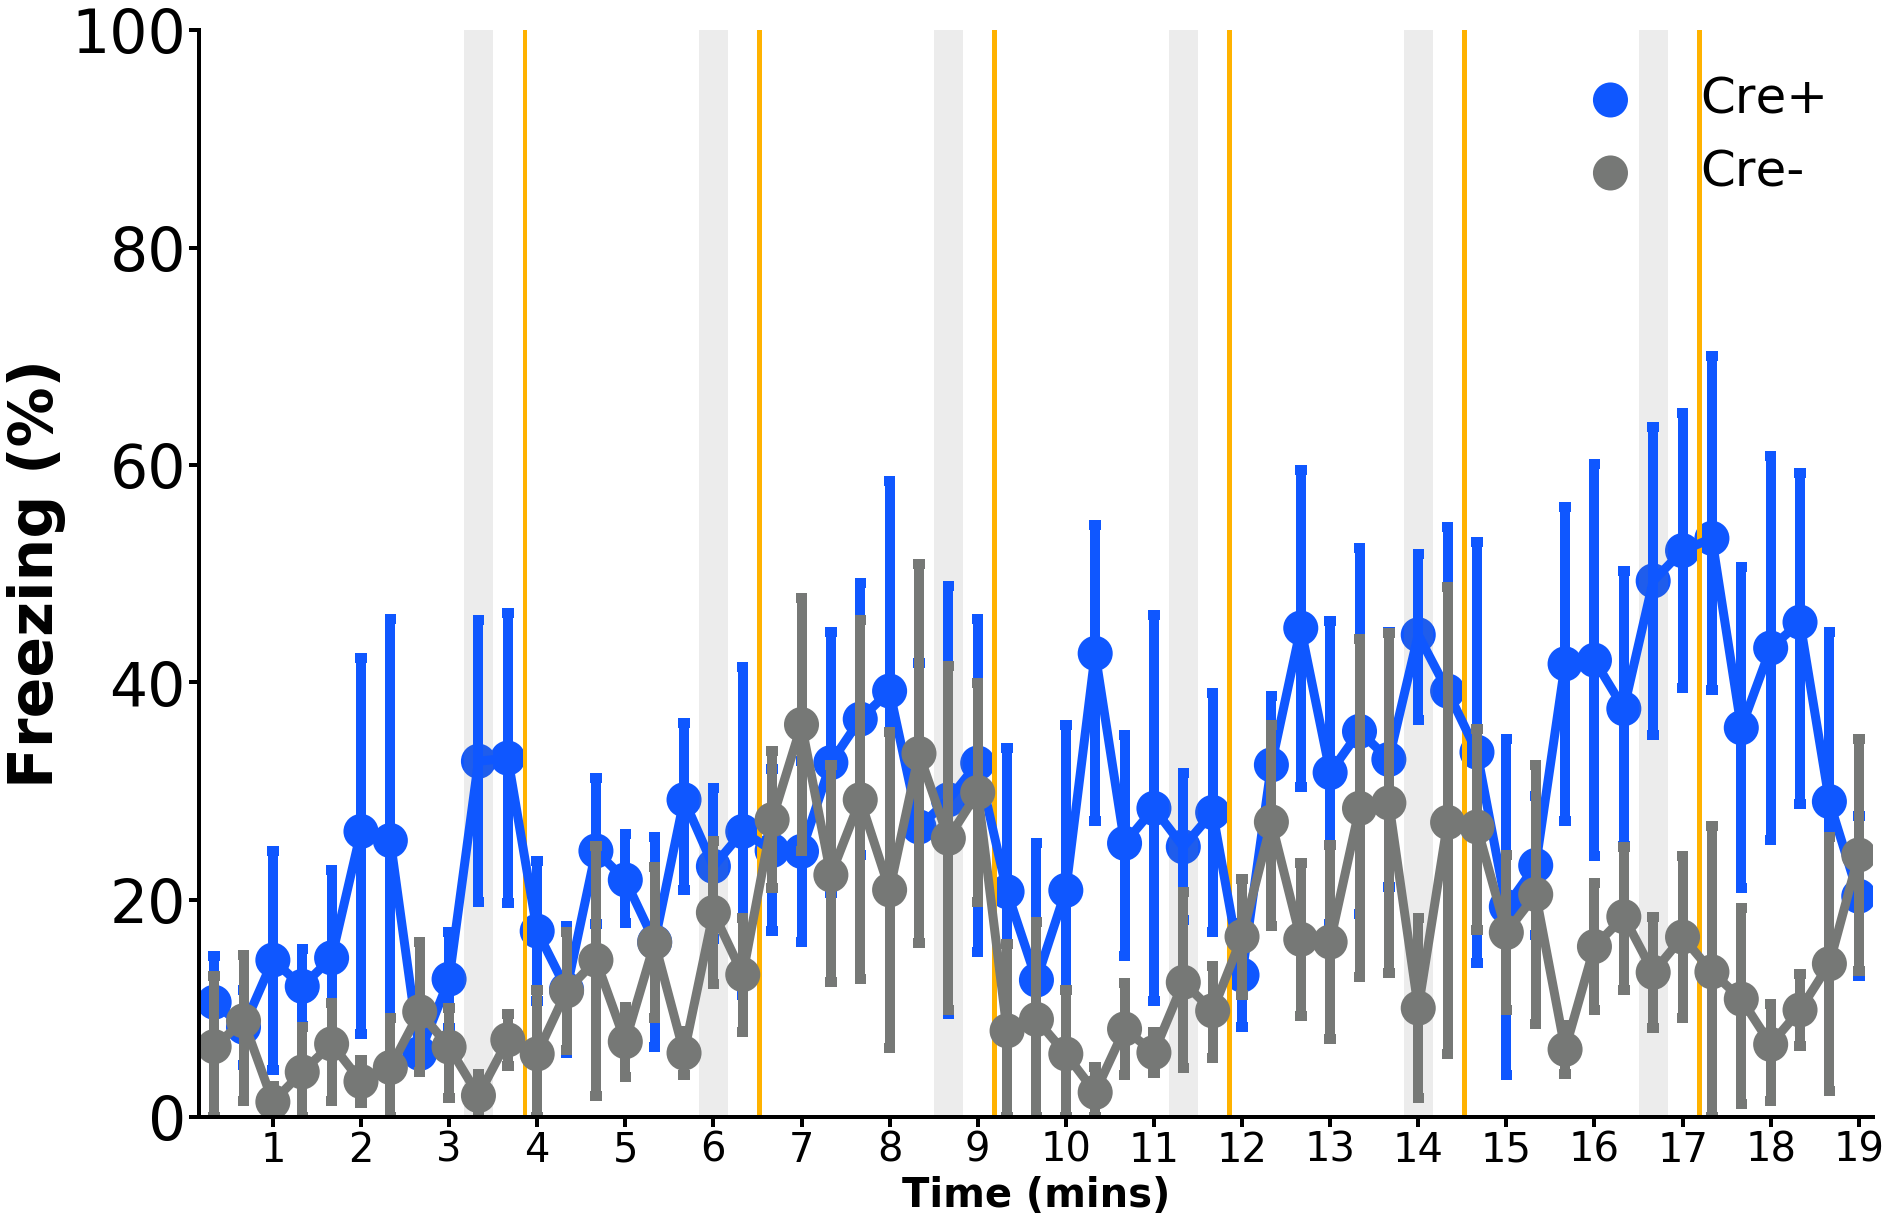

In [31]:
# binned plot

fd.tfc_plot(df_ext3, has_hue=True, hue='Condition', hue_order=['Cre+', 'Cre-'], ylim = (0, 100),fig_name='Tone Test')
plt.legend(fontsize=50);


# Save figure
#plt.savefig(f'{path}/figures/{expt_name} tone test trial.png')

(0, 100)

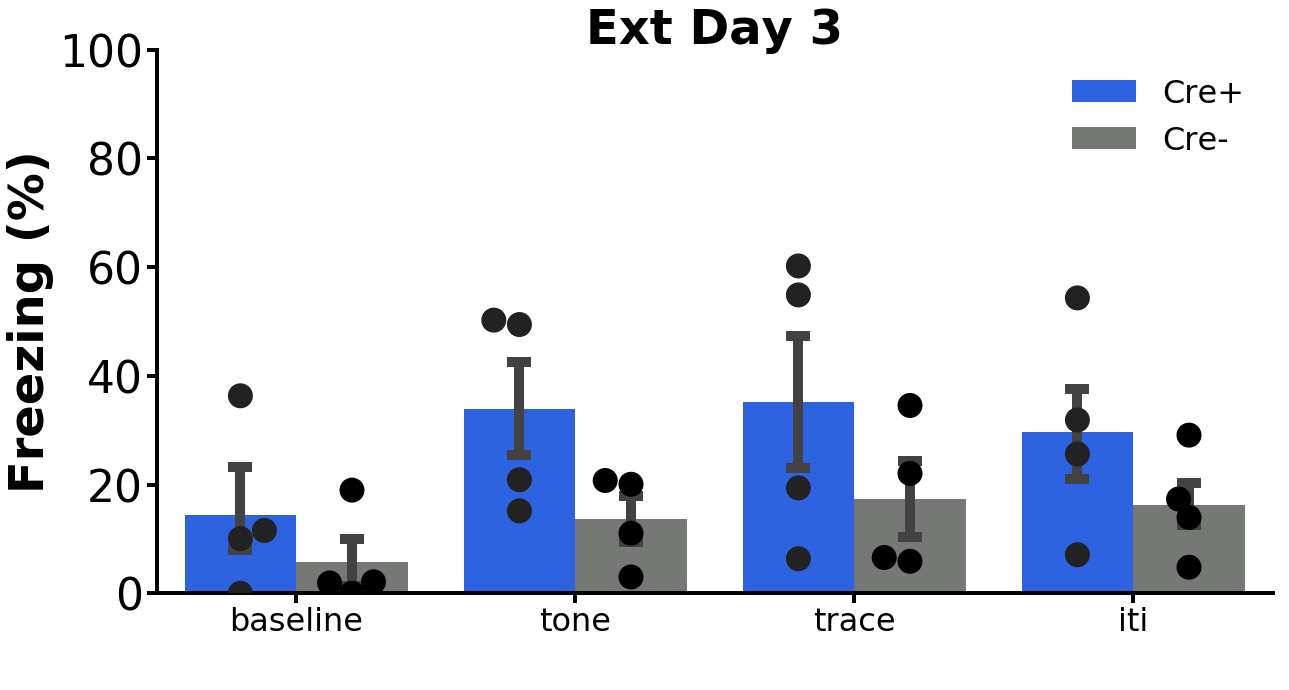

In [32]:
# bar plot

fd.tfc_barplot(df_ext3_total, hue='Condition', hue_order=['Cre+','Cre-'], order=['baseline', 'tone', 'trace', 'iti'], 
               fig_name='Ext Day 3', pts = True)
plt.ylim((0,100))

In [33]:
df_ext3_total.groupby(['Phase', 'Condition']).mean()

Pct Component Time Freezing  Avg Motion Index
Phase    Condition                                               
baseline Cre+                         14.485833        149.377222
         Cre-                          5.750556        256.324722
iti      Cre+                         29.735903        104.662083
         Cre-                         16.298472        169.702083
tone     Cre+                         33.938333         86.318333
         Cre-                         13.715833        187.085417
trace    Cre+                         35.214167         95.204583
         Cre-                         17.271250        161.035417

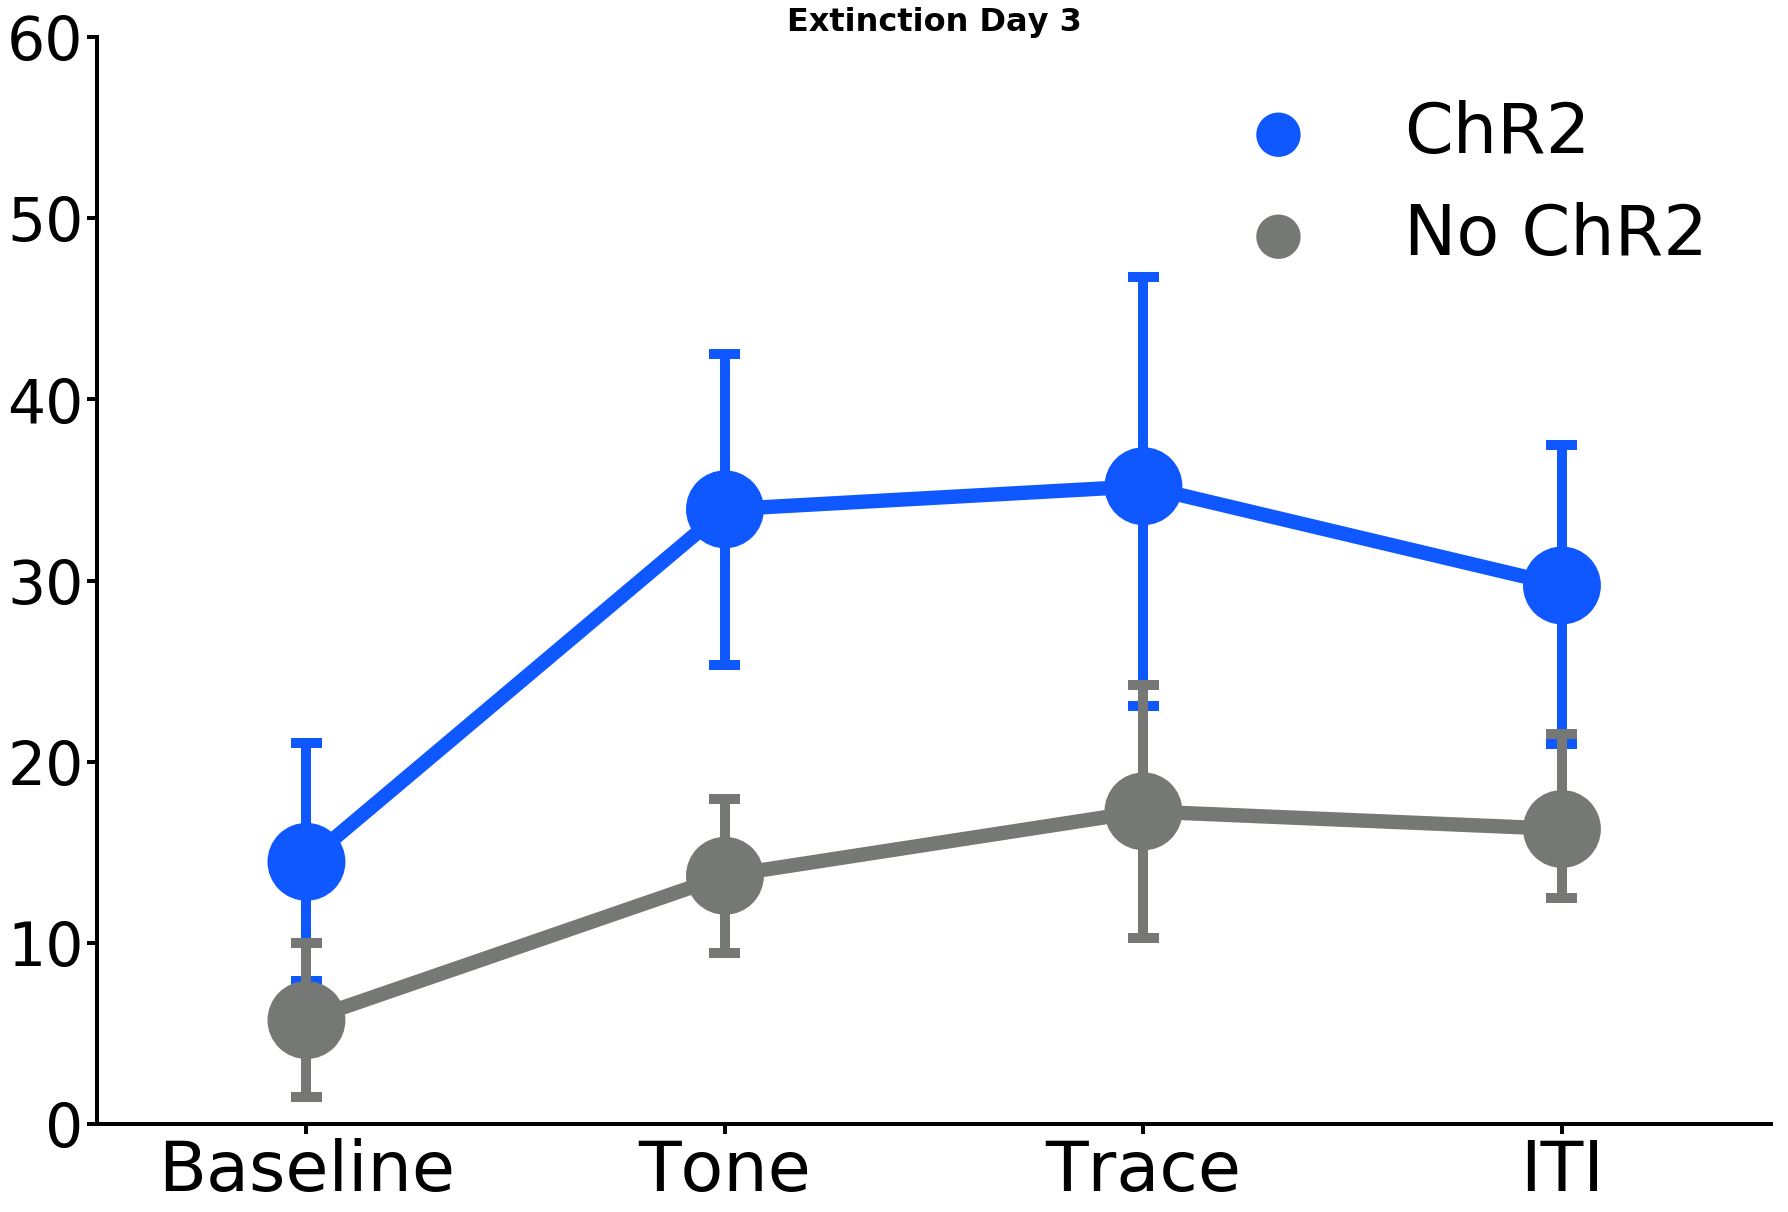

In [34]:

fd.tfc_plot(df_ext3_total, xvar = 'Phase', min_bins= False,tone_squares=False, trace_squares=False,
         shock_line=False,hue='Condition', order = ['baseline', 'tone', 'trace','iti' ], hue_order=['Cre+', 'Cre-'], 
         errwidth=10,scale = 2, marker_size = 4500)

plt.title('Extinction Day 3')
plt.ylim((0,60));
plt.xlabel('');
plt.ylabel('');
ax = plt.gca()
ax.set_xticklabels(['Baseline', 'Tone', 'Trace', 'ITI'], size = 70);

L=ax.legend(markerscale = .5, fontsize = 70)
L.get_texts()[0].set_text('ChR2')
L.get_texts()[1].set_text('No ChR2')
plt.savefig(f'{path}/figures/{expt_name} extinction day 3 total line.png')

## Extinction Day 4

In [35]:
# load data
ext4_file = f'{path}data-raw/2021-05-11 LC ChR2 2s Stim All Phases Extinction Day 4.csv'
df_ext4_raw = fd.load_df(ext4_file)

# clean data (take from MedAssociates format to simple csv table)
df_ext4 = fd.clean_df(df_ext4_raw)

# add group labels to animals
df_ext4 = fd.add_group_labels(df_ext4, grp_file=grp_label_file, exp_name=expt_name, grp2= 'Condition')

# exclude animal that didn't get some shocks
#df_tone = df_tone[df_tone.Animal != '306']


# create a df w/ values averaged for each phase (i.e. baseline, tone, etc.) w/in each animal
df_ext4_total = fd.total_df(df_ext4, grp2='Condition')

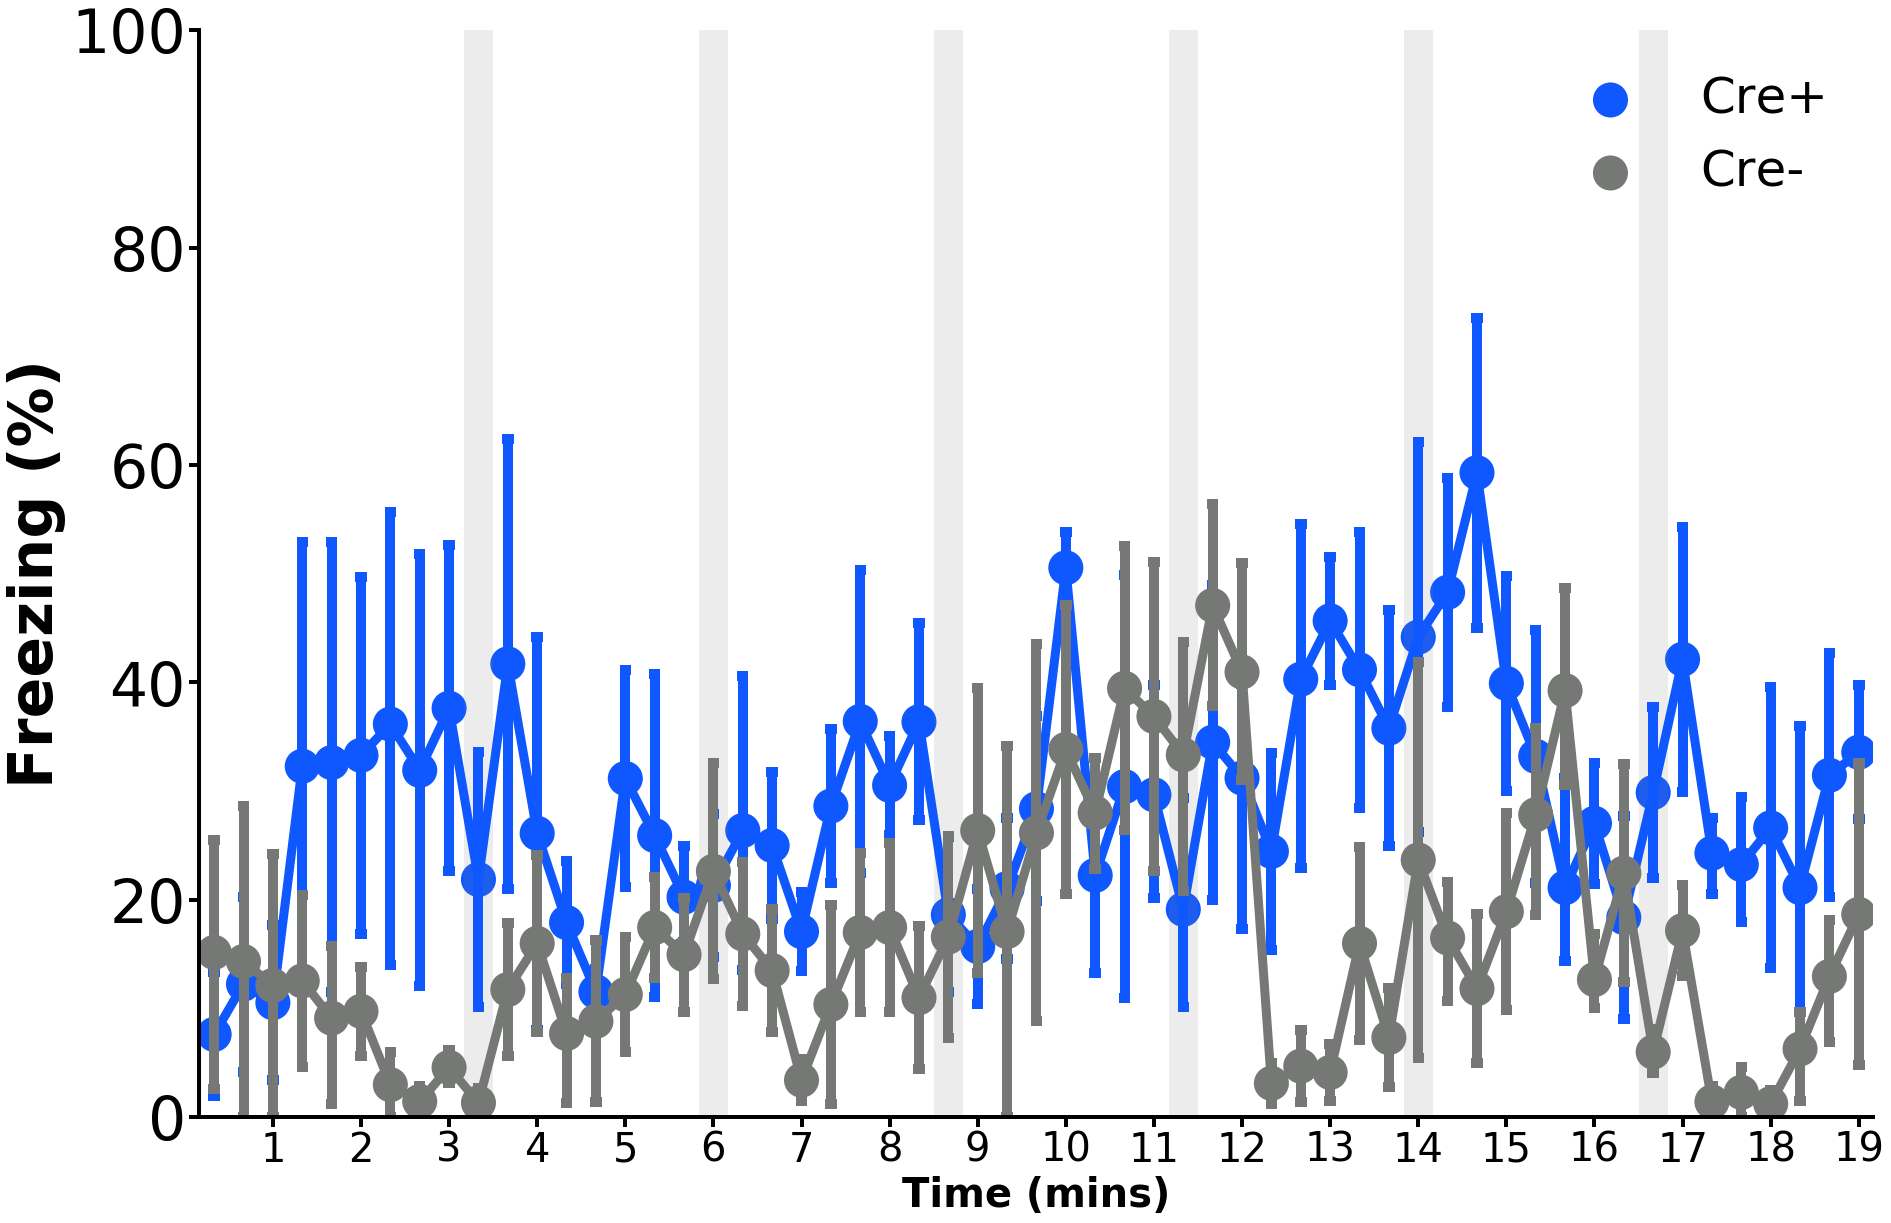

In [36]:
# binned plot

fd.tfc_plot(df_ext4, has_hue=True, hue='Condition', hue_order=['Cre+', 'Cre-'], ylim = (0, 100), shock_line=False,fig_name='Tone Test')
plt.legend(fontsize=50);



(0, 100)

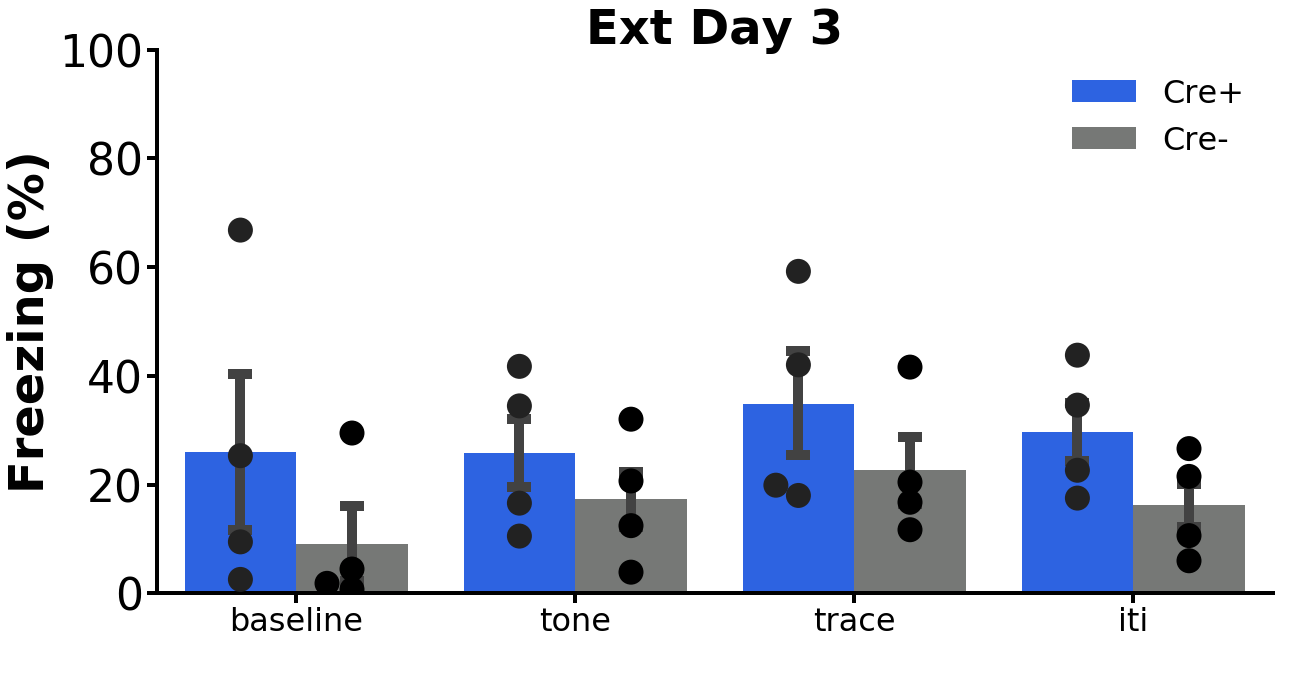

In [37]:
# bar plot

fd.tfc_barplot(df_ext4_total, hue='Condition', hue_order=['Cre+','Cre-'], order=['baseline', 'tone', 'trace', 'iti'], 
               fig_name='Ext Day 3', pts = True)
plt.ylim((0,100))

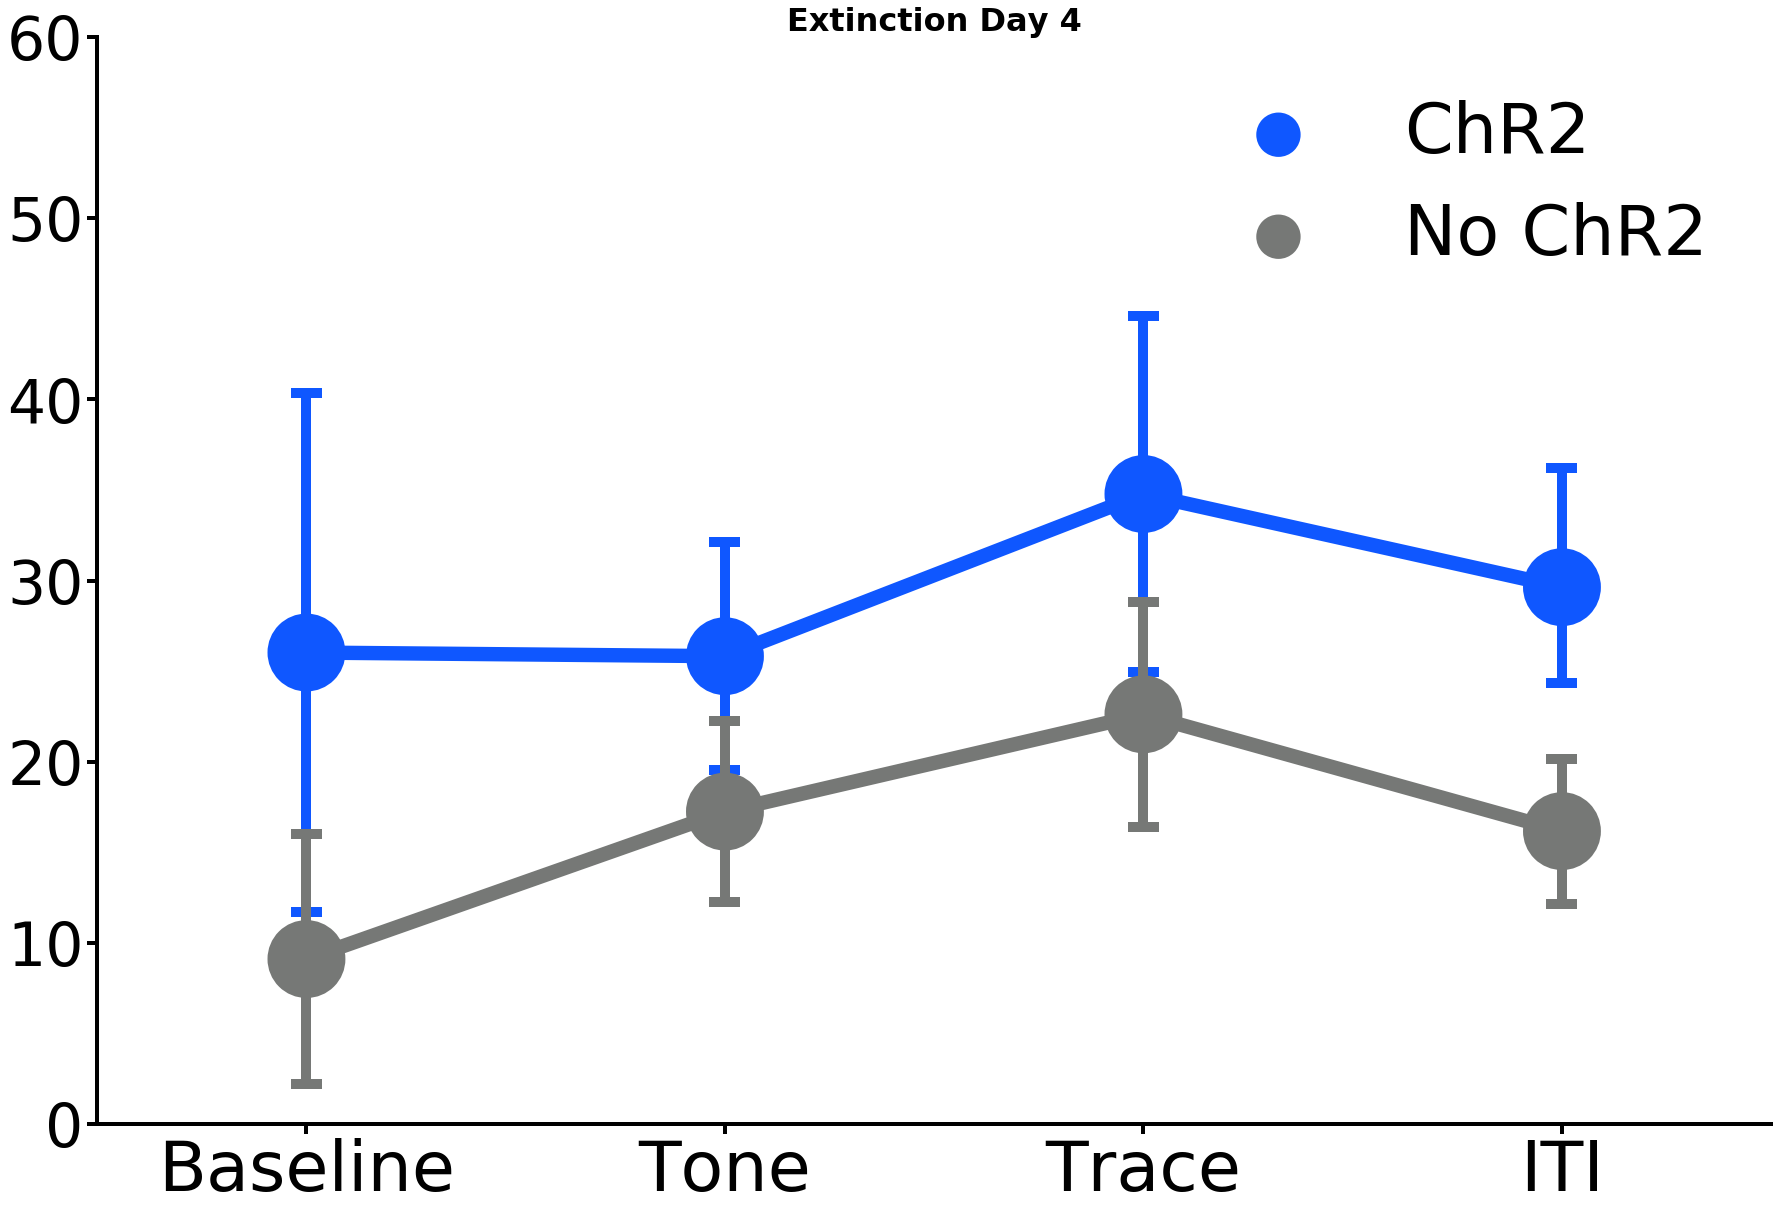

In [38]:

fd.tfc_plot(df_ext4_total, xvar = 'Phase', min_bins= False,tone_squares=False, trace_squares=False,
         shock_line=False,hue='Condition', order = ['baseline', 'tone', 'trace','iti' ], hue_order=['Cre+', 'Cre-'], 
         errwidth=10,scale = 2, marker_size = 4500)

plt.title('Extinction Day 4')
plt.ylim((0,60));
plt.xlabel('');
plt.ylabel('');
ax = plt.gca()
ax.set_xticklabels(['Baseline', 'Tone', 'Trace', 'ITI'], size = 70);

L=ax.legend(markerscale = .5, fontsize = 70)
L.get_texts()[0].set_text('ChR2')
L.get_texts()[1].set_text('No ChR2')
plt.savefig(f'{path}/figures/{expt_name} extinction day 4 total line.png')

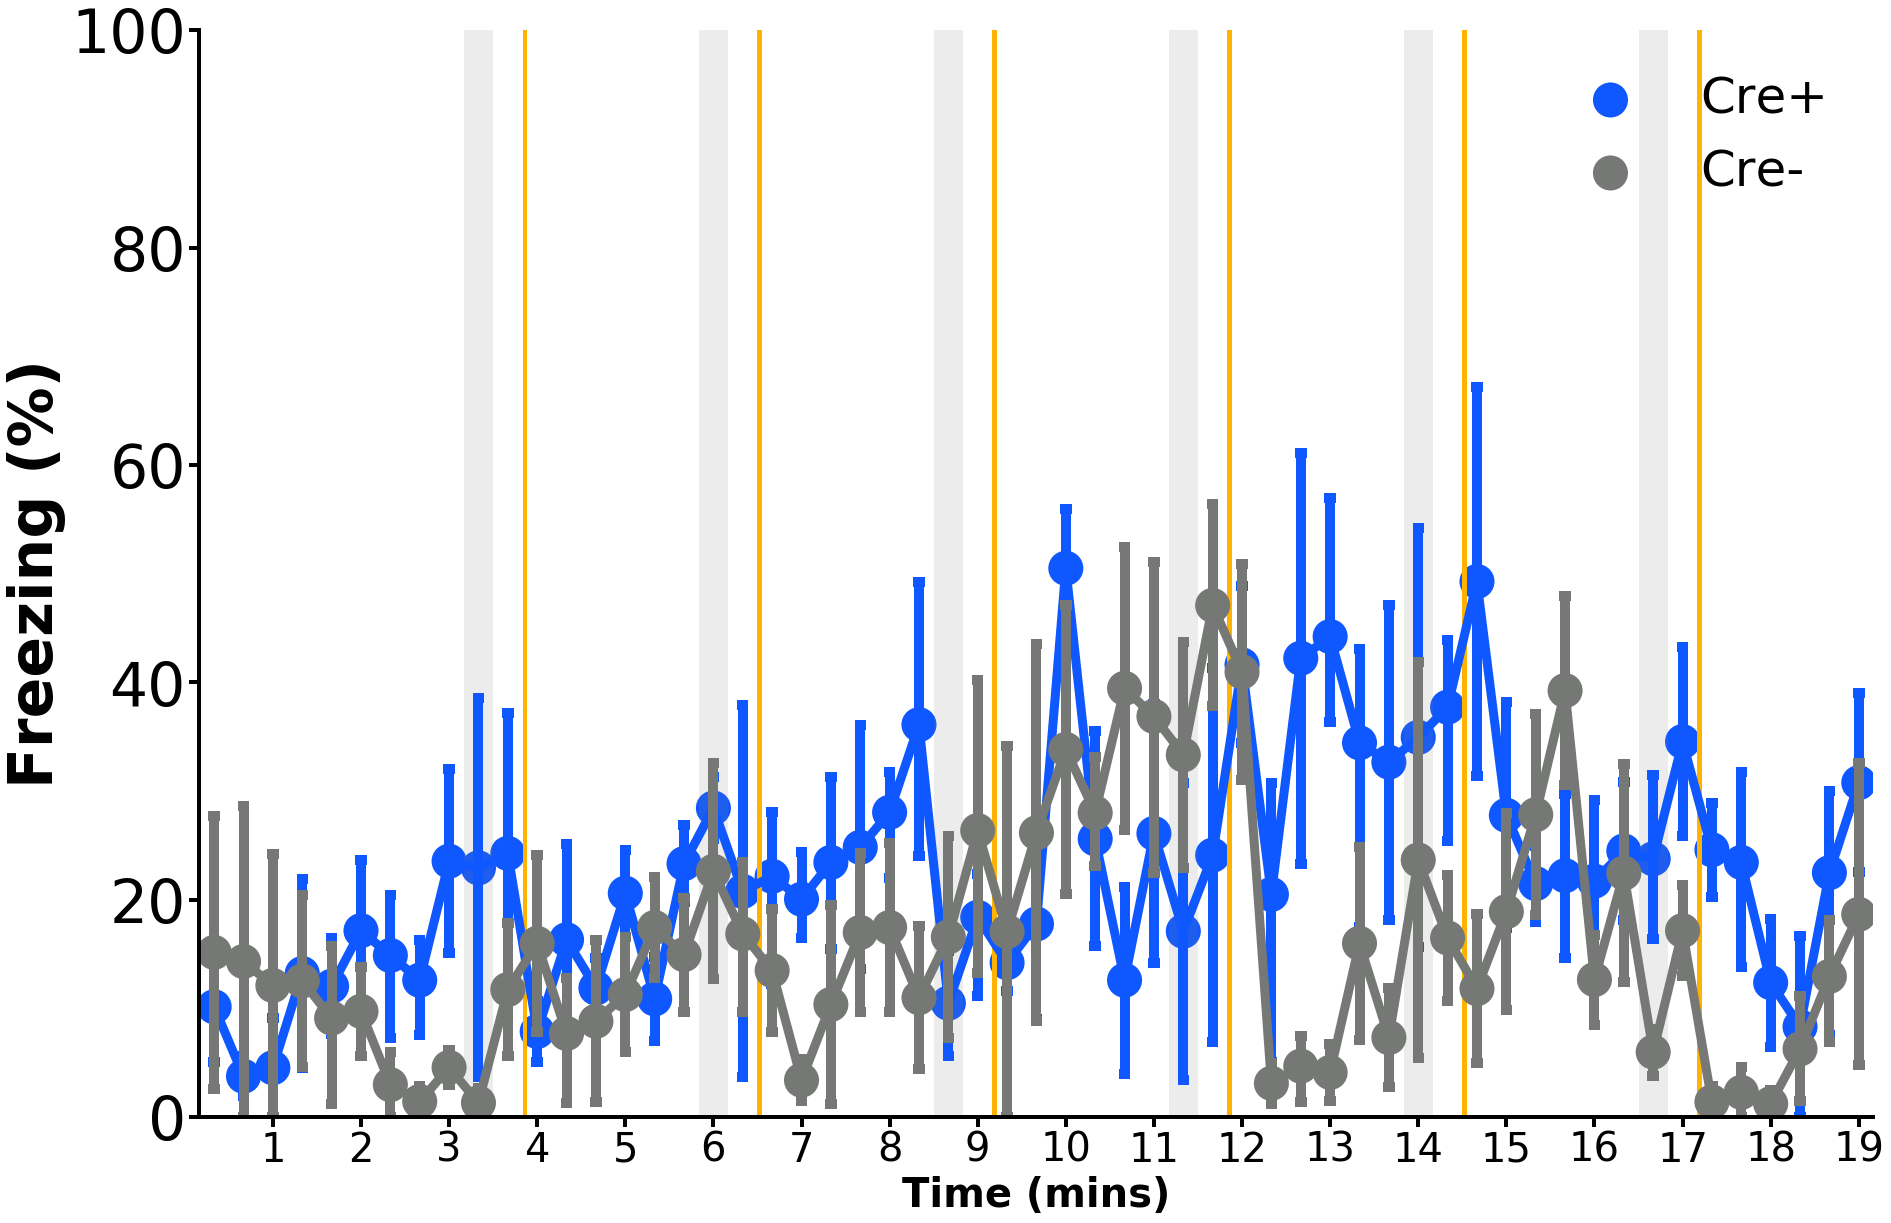

In [39]:
fd.tfc_plot(df_ext4.query('Animal != "188"'), has_hue=True, hue='Condition', hue_order=['Cre+', 'Cre-'], ylim = (0, 100),fig_name='Tone Test')
plt.legend(fontsize=50);

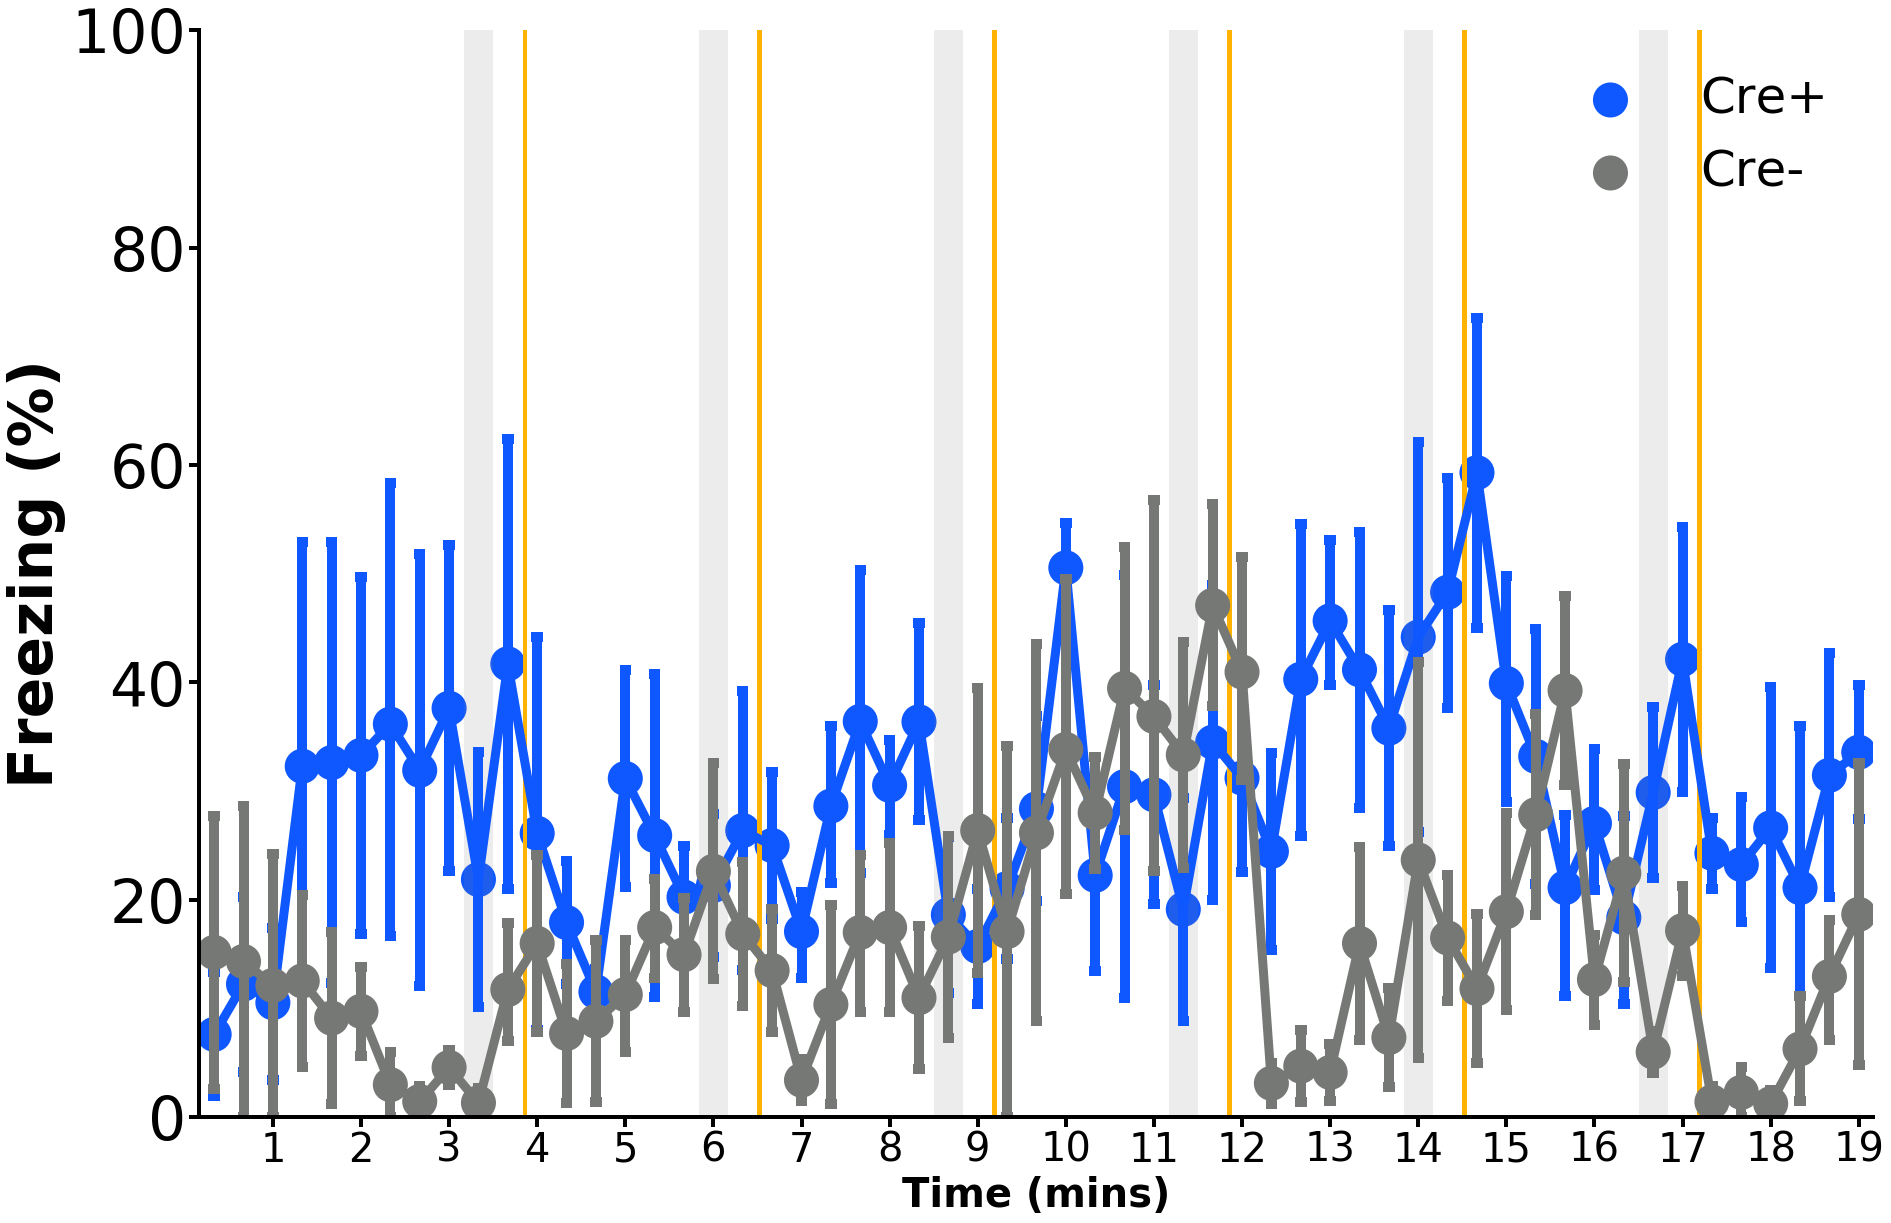

In [40]:
fd.tfc_plot(df_ext4, has_hue=True, hue='Condition', hue_order=['Cre+', 'Cre-'], ylim = (0, 100),fig_name='Tone Test')
plt.legend(fontsize=50);

In [41]:
df_ext4_total.groupby(['Condition','Phase','Animal']).mean()

Pct Component Time Freezing  Avg Motion Index
Condition Phase    Animal                                               
Cre+      baseline 186                       25.314444         93.615556
                   187                        9.462222        173.178889
                   188                       66.814444         76.967778
                   189                        2.555556        203.966667
          iti      186                       34.616111         71.775000
                   187                       22.634167        118.051667
                   188                       43.805278         89.942222
                   189                       17.513611        201.202500
          tone     186                       41.748333         50.086667
                   187                       10.526667        150.705000
                   188                       34.473333        130.545000
                   189                       16.585000        178.503333
          trace    186                       42.028333         61.016667
                   187                       18.000000        112.898333
                   188                       59.223333         61.790000
                   189                       19.888333        152.016667
Cre-      baseline 190                        4.462222        159.043333
                   191                        0.703333        372.485556
                   201                       29.482222         82.653333
                   202                        1.833333        279.514444
          iti      190                       10.611389        156.637500
                   191                        5.986667        266.726389
                   201                       26.620278         69.760278
                   202                       21.504444        138.984722
          tone     190                       12.445000        123.593333
                   191                        3.888333        168.833333
                   201                       32.028333         48.125000
                   202                       20.668333        143.180000
          trace    190                       20.445000        145.680000
                   191                       11.695000        190.860000
                   201                       41.610000         39.798333
                   202                       16.748333        157.613333

## Combined Extinction Data

In [42]:
df_tone2_total['Day'] = 1
df_ext_total['Day'] = 2
df_ext2_total['Day'] = 3
df_ext3_total['Day'] = 4
df_ext4_total['Day'] = 5
df_comp = pd.concat([df_tone2_total, df_ext_total, df_ext2_total, df_ext3_total, df_ext4_total])

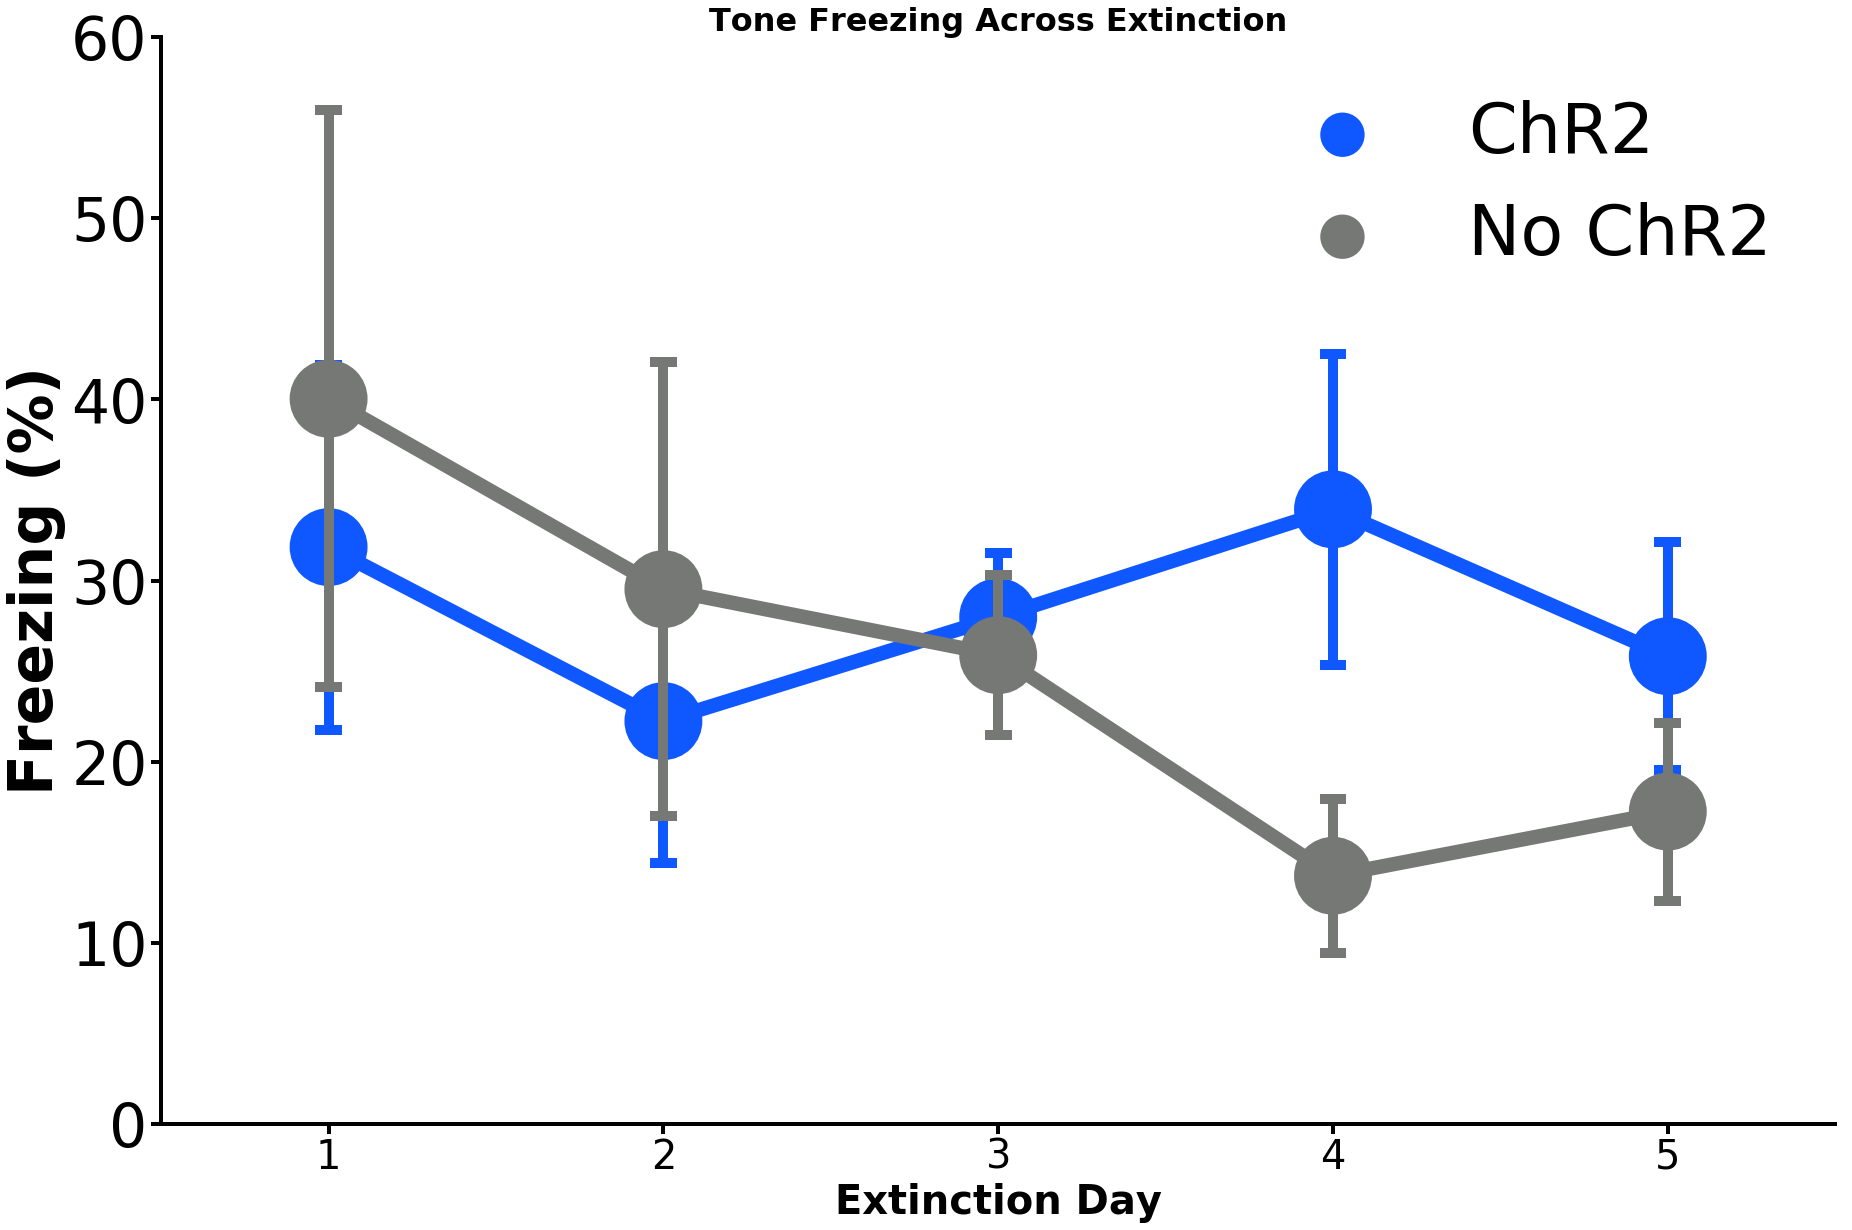

In [43]:

fd.tfc_plot(df_comp.query('Phase == "tone"'), xvar = 'Day', xlab = 'Extinction Day',  
            min_bins= False,tone_squares=False, trace_squares=False,
            shock_line=False,hue='Condition', hue_order=['Cre+', 'Cre-'], 
            ylim = (0,60), errwidth=10,scale = 2, marker_size = 4500)

plt.title('Tone Freezing Across Extinction')
ax = plt.gca()
L=ax.legend(markerscale = .5, fontsize = 70)
L.get_texts()[0].set_text('ChR2')
L.get_texts()[1].set_text('No ChR2')
plt.savefig(f'{path}/figures/{expt_name} tone freezing across extinction.png')

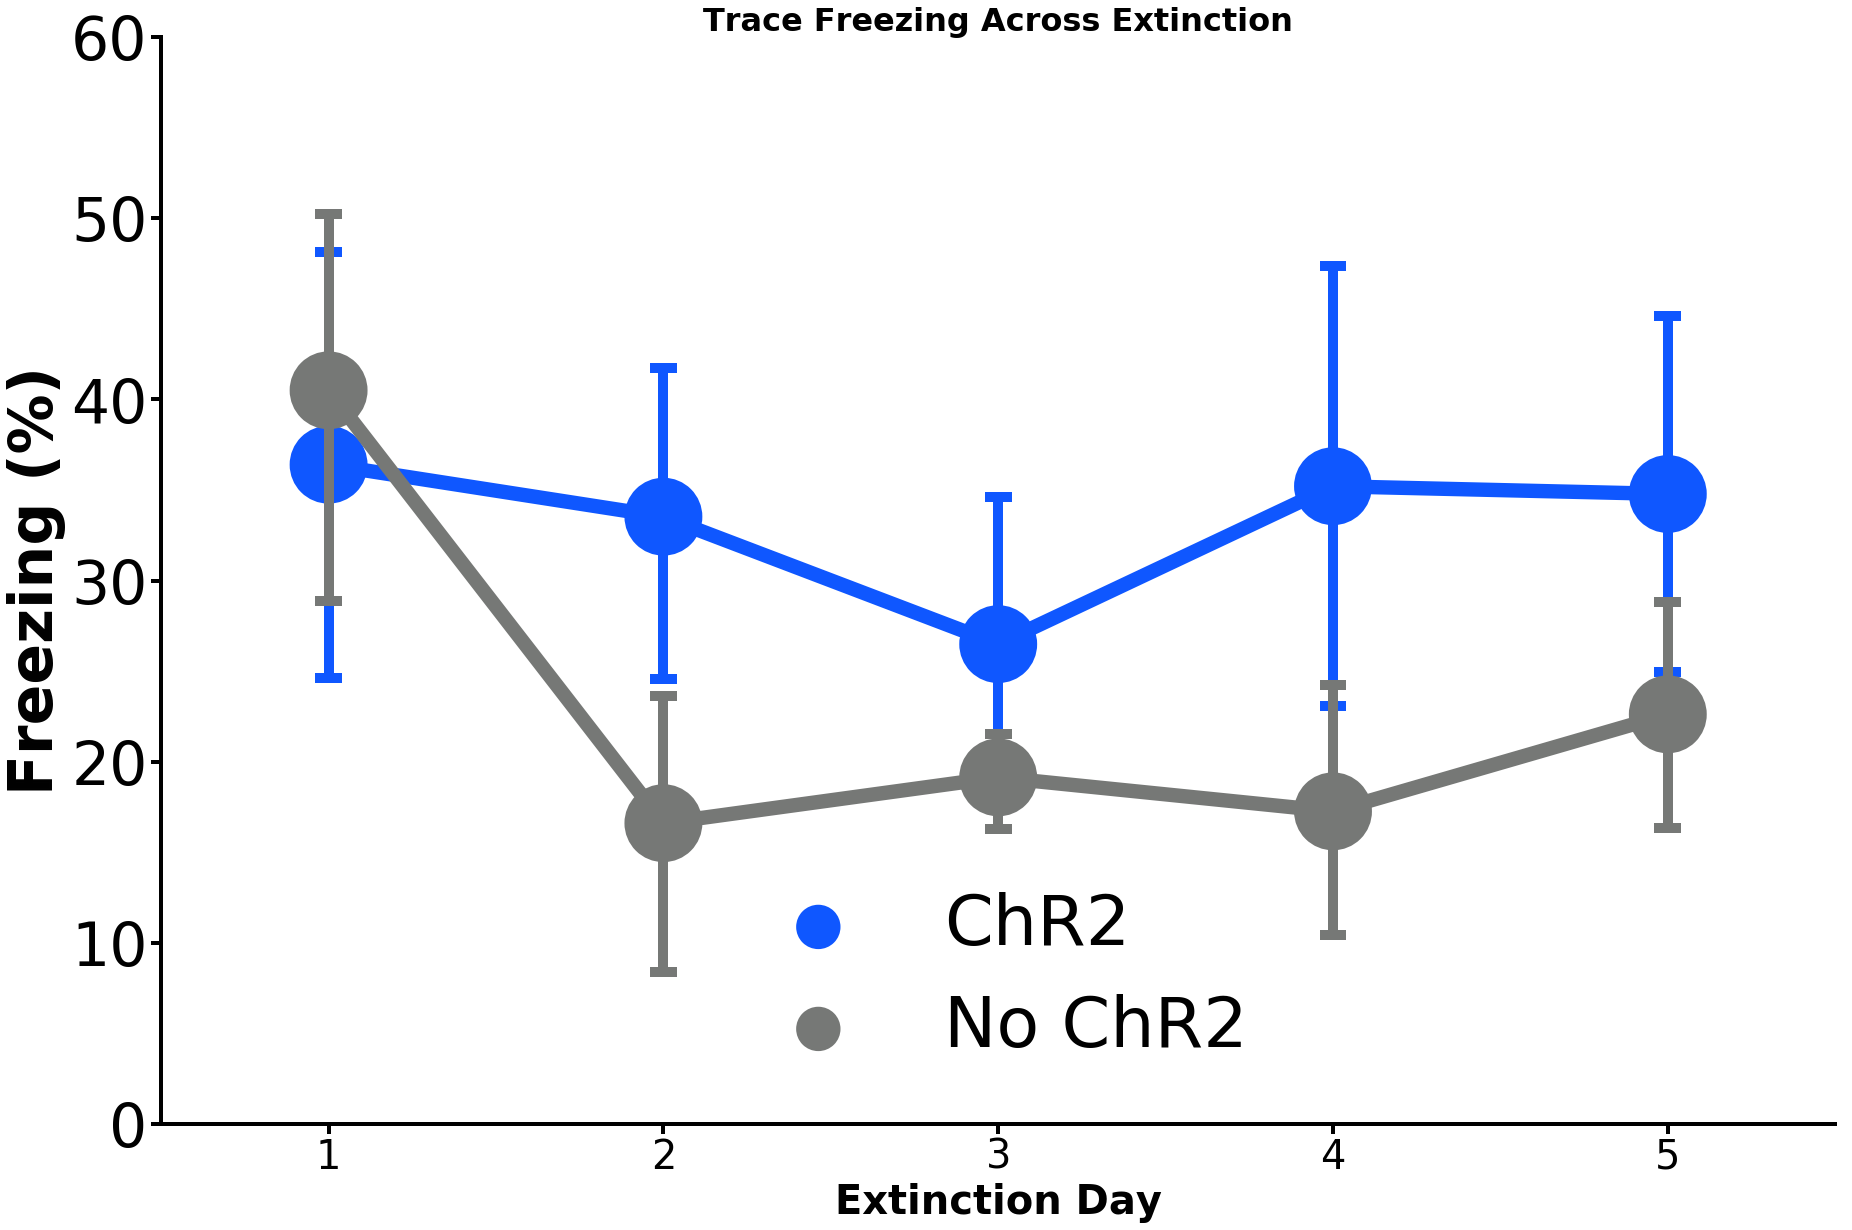

In [44]:

fd.tfc_plot(df_comp.query('Phase == "trace"'), xvar = 'Day', xlab = 'Extinction Day',  
            min_bins= False,tone_squares=False, trace_squares=False,
            shock_line=False,hue='Condition', hue_order=['Cre+', 'Cre-'], 
            ylim = (0,60), errwidth=10,scale = 2, marker_size = 4500)

plt.title('Trace Freezing Across Extinction')
ax = plt.gca()
L=ax.legend(markerscale = .5, fontsize = 70)
L.get_texts()[0].set_text('ChR2')
L.get_texts()[1].set_text('No ChR2')

plt.savefig(f'{path}/figures/{expt_name} trace freezing across extinction.png')

## Shock Response

In [45]:
# load data
shk_file = f'{path}data-raw/LC ChR2 2s Stim All Phases Shock Response.csv'
df_shk_raw = fd.load_df(shk_file)

# clean data (take from MedAssociates format to simple csv table)
df_shk = fd.clean_df(df_shk_raw)

# add group labels to animals
df_shk = fd.add_group_labels(df_shk, grp_file=grp_label_file, exp_name=expt_name, grp2= 'Condition')

# exclude animal that didn't get some shocks
#df_tone = df_tone[df_tone.Animal != '306']



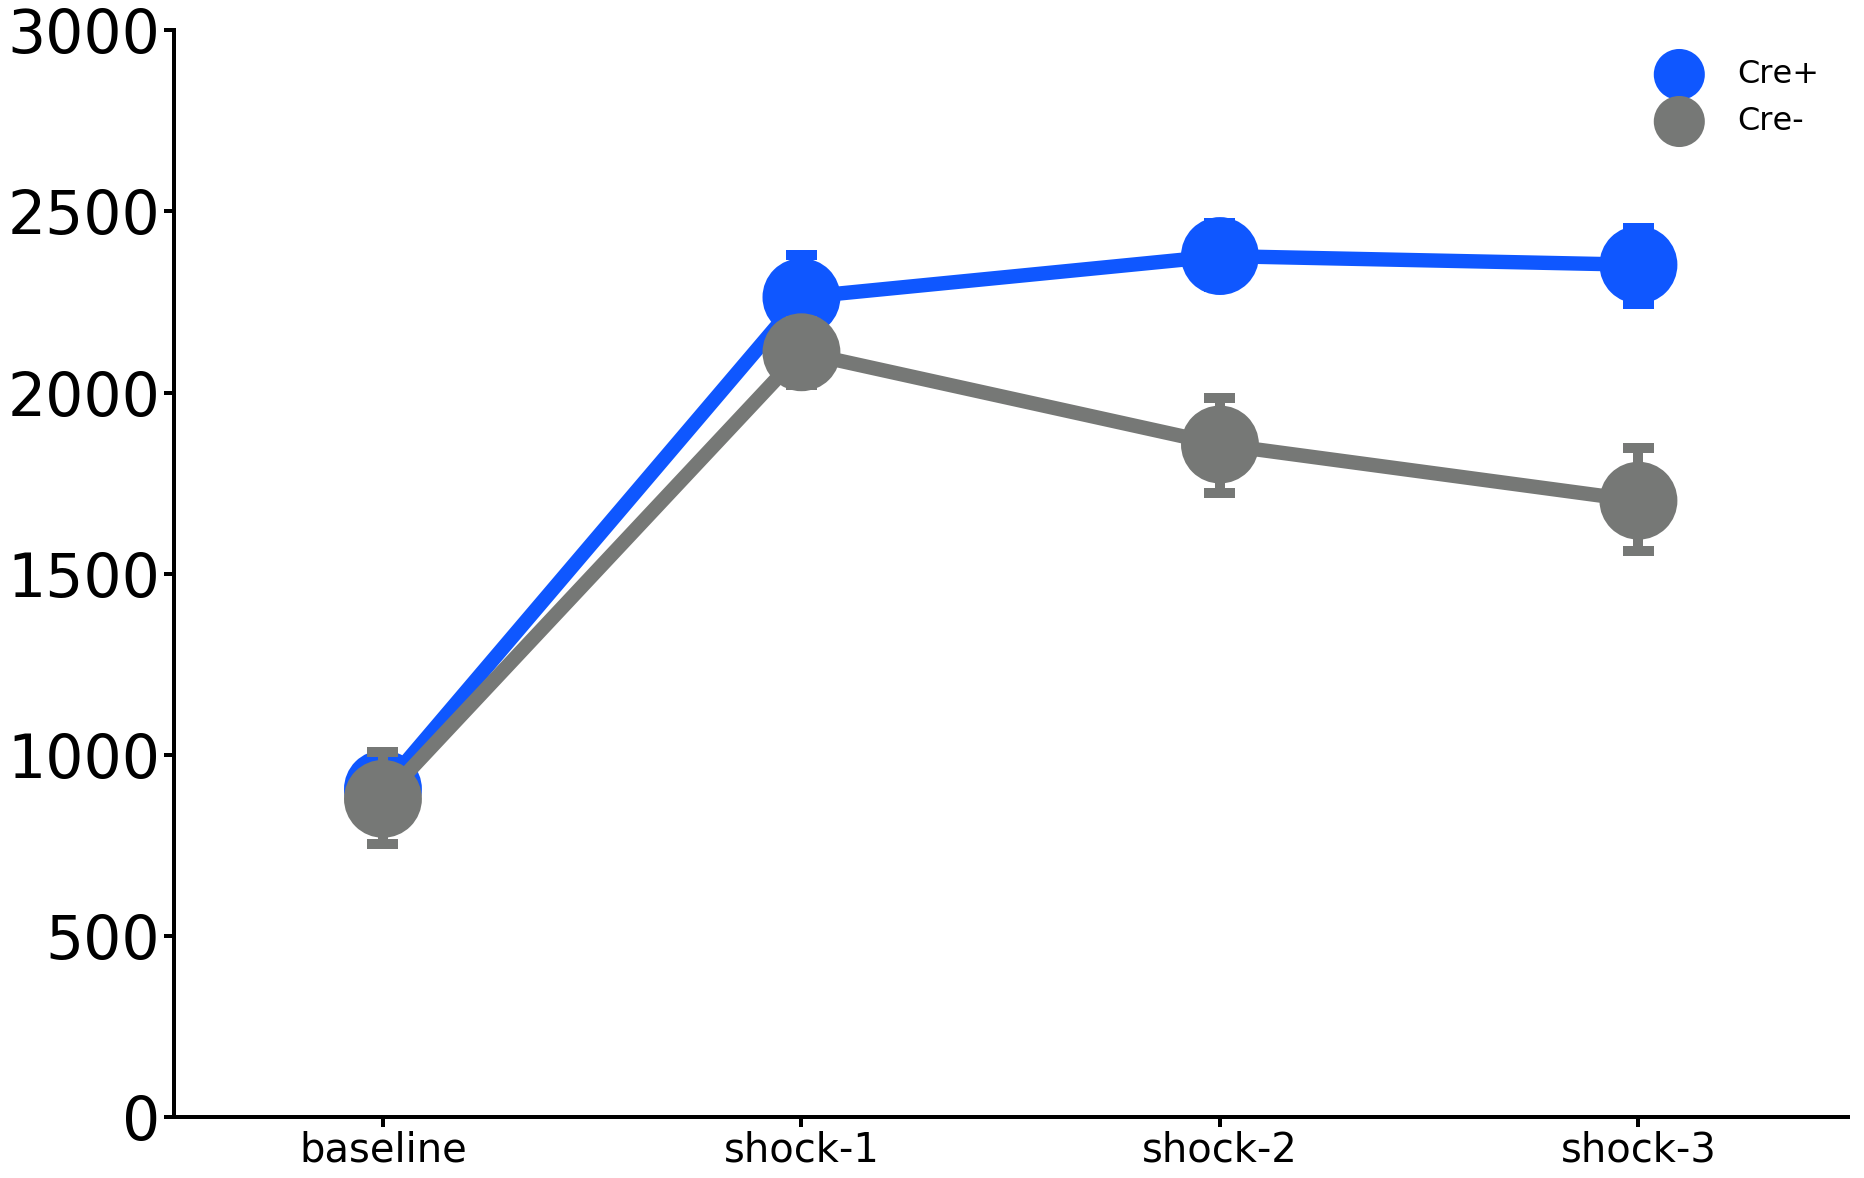

In [46]:

fd.tfc_plot(df_shk, xvar = 'Component Name', yvar = 'Avg Motion Index', min_bins= False,tone_squares=False, trace_squares=False,
         shock_line=False,hue='Condition',  
         errwidth=10,scale = 2, marker_size = 4500, ylim = (0, 3000))

#plt.ylim((0,60));
plt.xlabel('');
plt.ylabel('');
ax = plt.gca()




## Tone Test with Stim (After all extinction)

In [47]:
# load data
df_tone_stim_file = f'{path}data-raw/2021-05-12 LC ChR2 2s Stim All Phases Tone Test Stim.csv'
df_tone_stim_raw = fd.load_df(df_tone_stim_file)

# clean data (take from MedAssociates format to simple csv table)
df_tone_stim = fd.clean_df(df_tone_stim_raw)

# add group labels to animals
df_tone_stim = fd.add_group_labels(df_tone_stim, grp_file=grp_label_file, exp_name=expt_name, grp2= 'Condition')

# exclude animal that didn't get some shocks
#df_tone = df_tone[df_tone.Animal != '306']


# create a df w/ values averaged for each phase (i.e. baseline, tone, etc.) w/in each animal
df_tone_stim_total = fd.total_df(df_tone_stim, grp2='Condition')

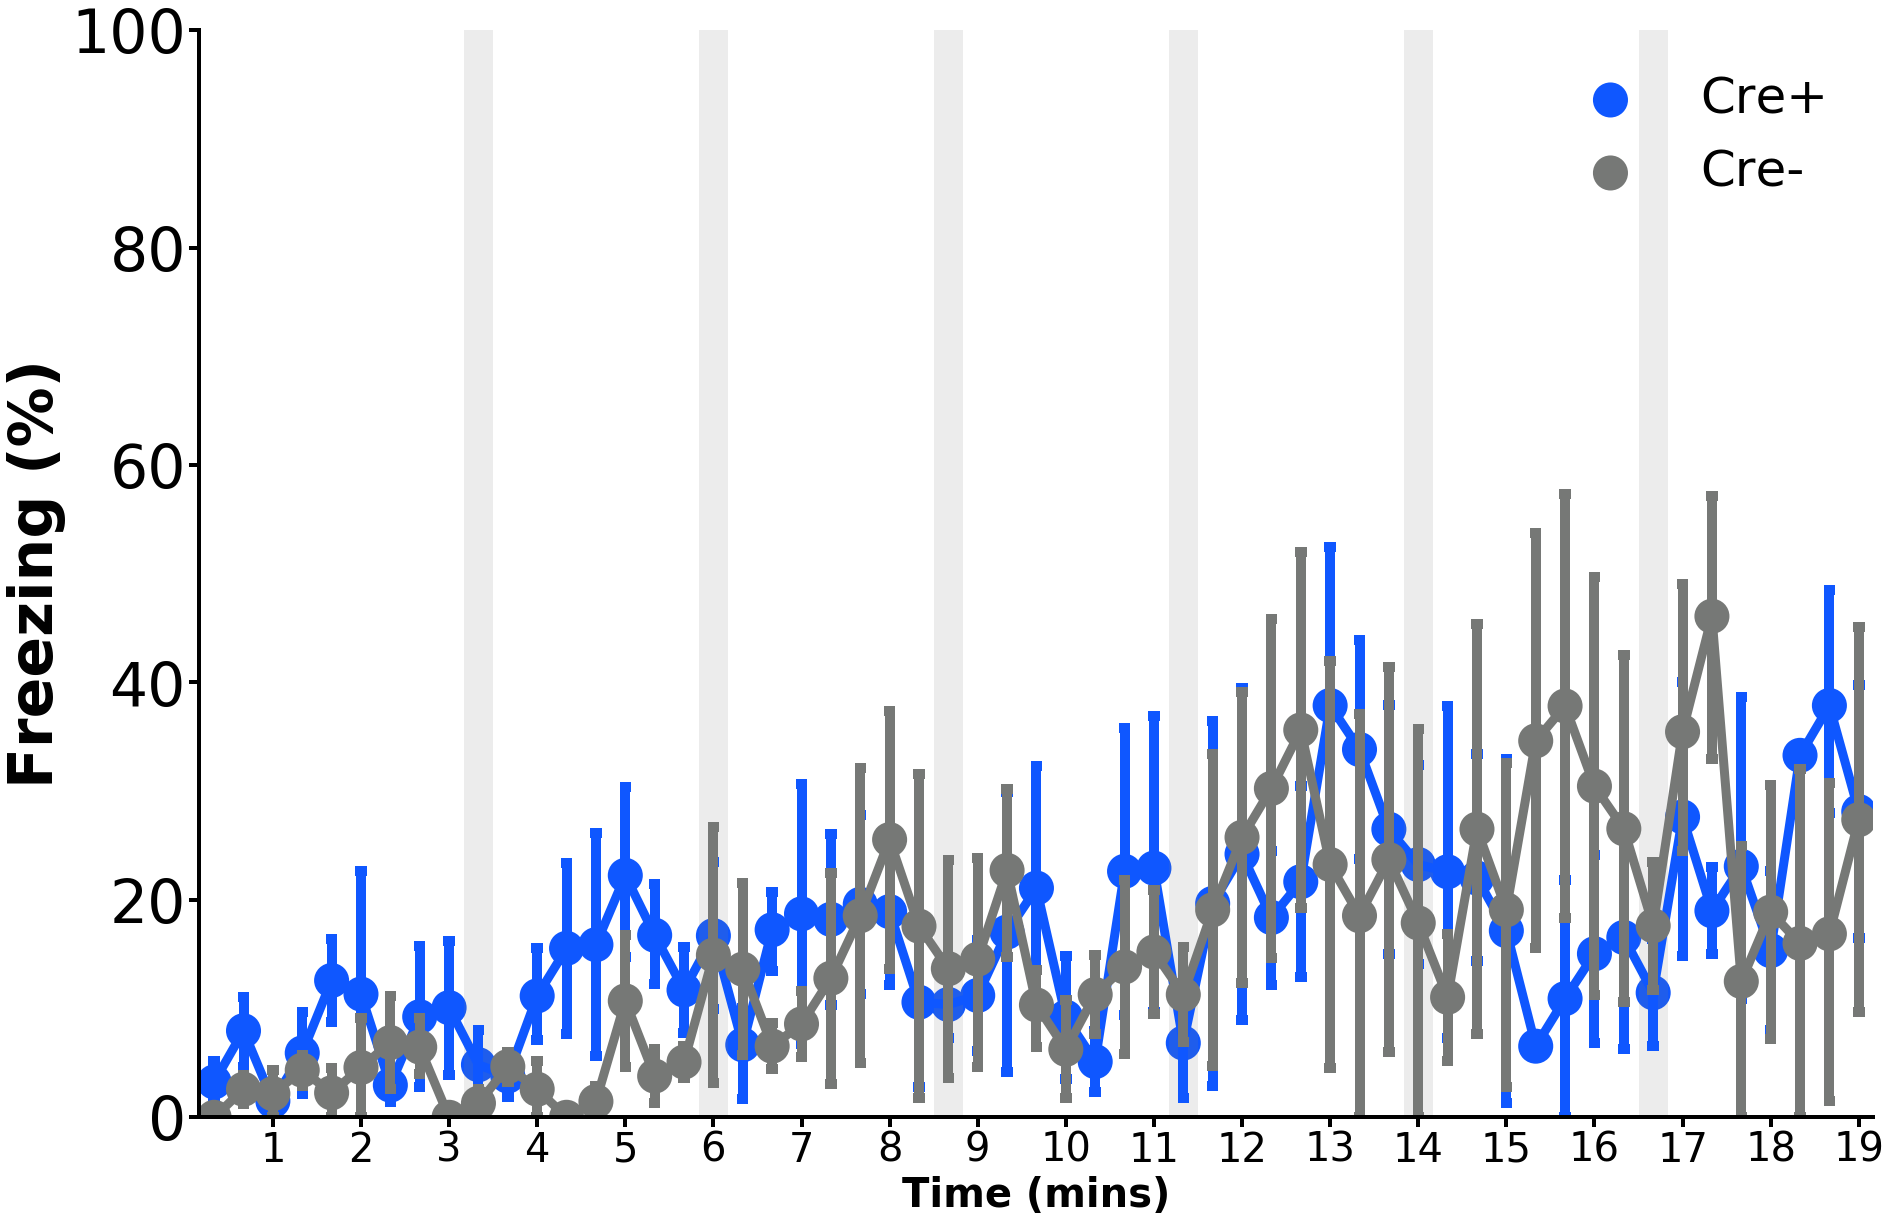

In [48]:
# binned plot

fd.tfc_plot(df_tone_stim, has_hue=True, hue='Condition', hue_order=['Cre+', 'Cre-'], ylim = (0, 100), shock_line=False,fig_name='Tone Test')
plt.legend(fontsize=50);



(0, 100)

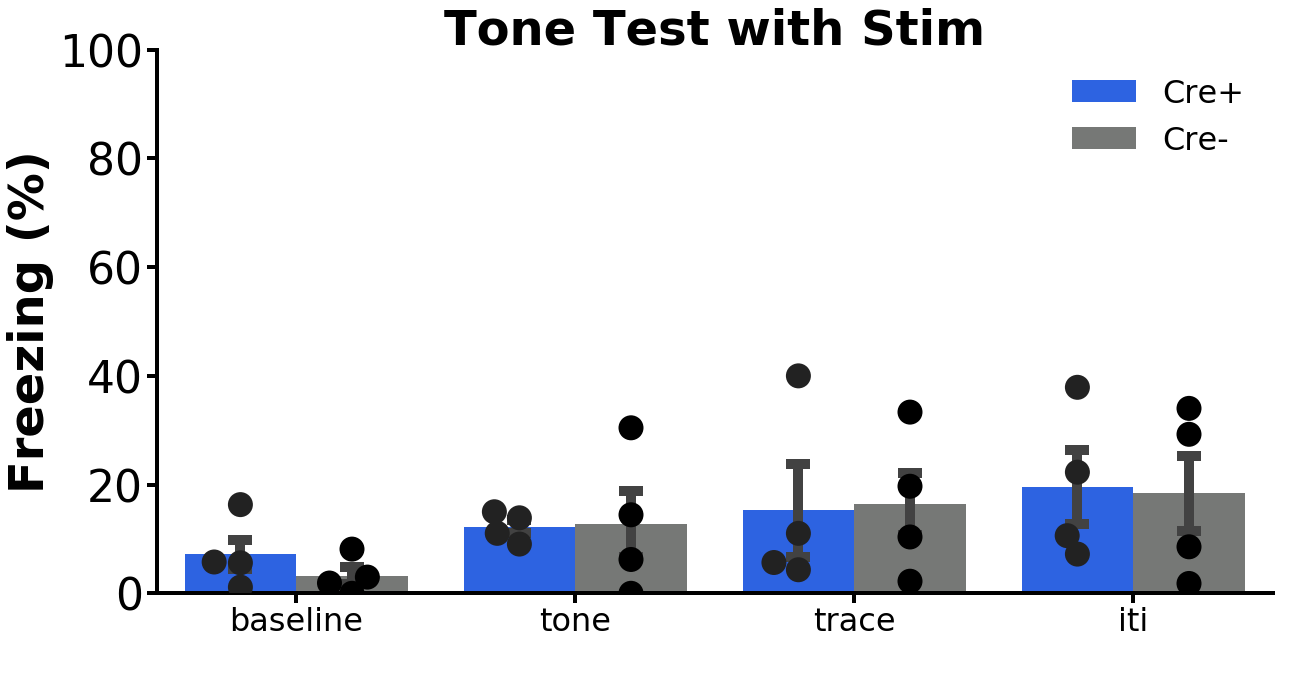

In [49]:
# bar plot

fd.tfc_barplot(df_tone_stim_total, hue='Condition', hue_order=['Cre+','Cre-'], order=['baseline', 'tone', 'trace', 'iti'], 
               fig_name='Tone Test with Stim', pts = True)
plt.ylim((0,100))

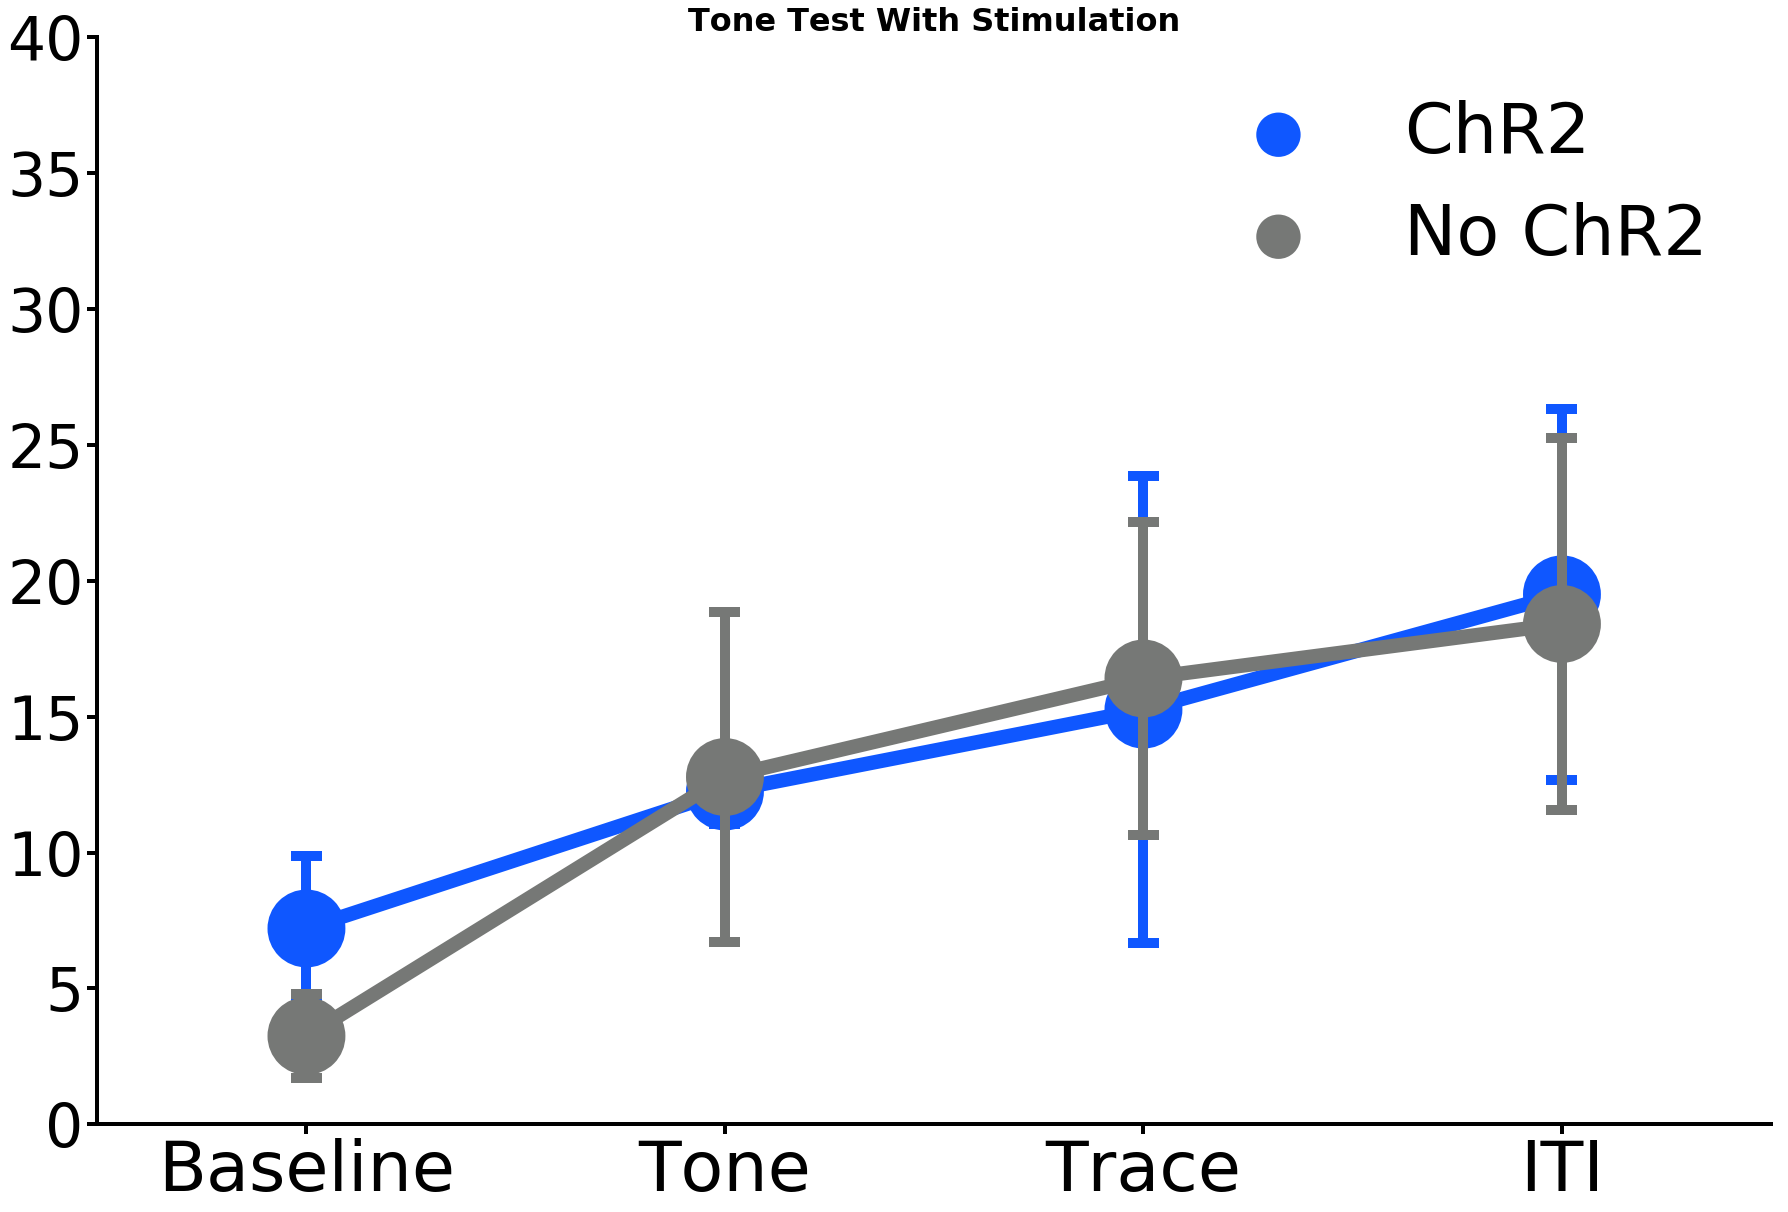

In [50]:

fd.tfc_plot(df_tone_stim_total, xvar = 'Phase', min_bins= False,tone_squares=False, trace_squares=False,
         shock_line=False,hue='Condition', order = ['baseline', 'tone', 'trace','iti' ], hue_order=['Cre+', 'Cre-'], 
         errwidth=10,scale = 2, marker_size = 4500)

plt.title('Tone Test With Stimulation')
plt.ylim((0,40));
plt.xlabel('');
plt.ylabel('');
ax = plt.gca()
ax.set_xticklabels(['Baseline', 'Tone', 'Trace', 'ITI'], size = 70);

L=ax.legend(markerscale = .5, fontsize = 70)
L.get_texts()[0].set_text('ChR2')
L.get_texts()[1].set_text('No ChR2')
plt.savefig(f'{path}/figures/{expt_name} tone test with stim total line.png')

In [56]:
df_tone_stim_total['Day'] = 5
df_comp = pd.concat([df_tone2_total, df_ext_total, df_ext2_total, df_ext3_total, df_ext4_total, df_tone_stim_total])

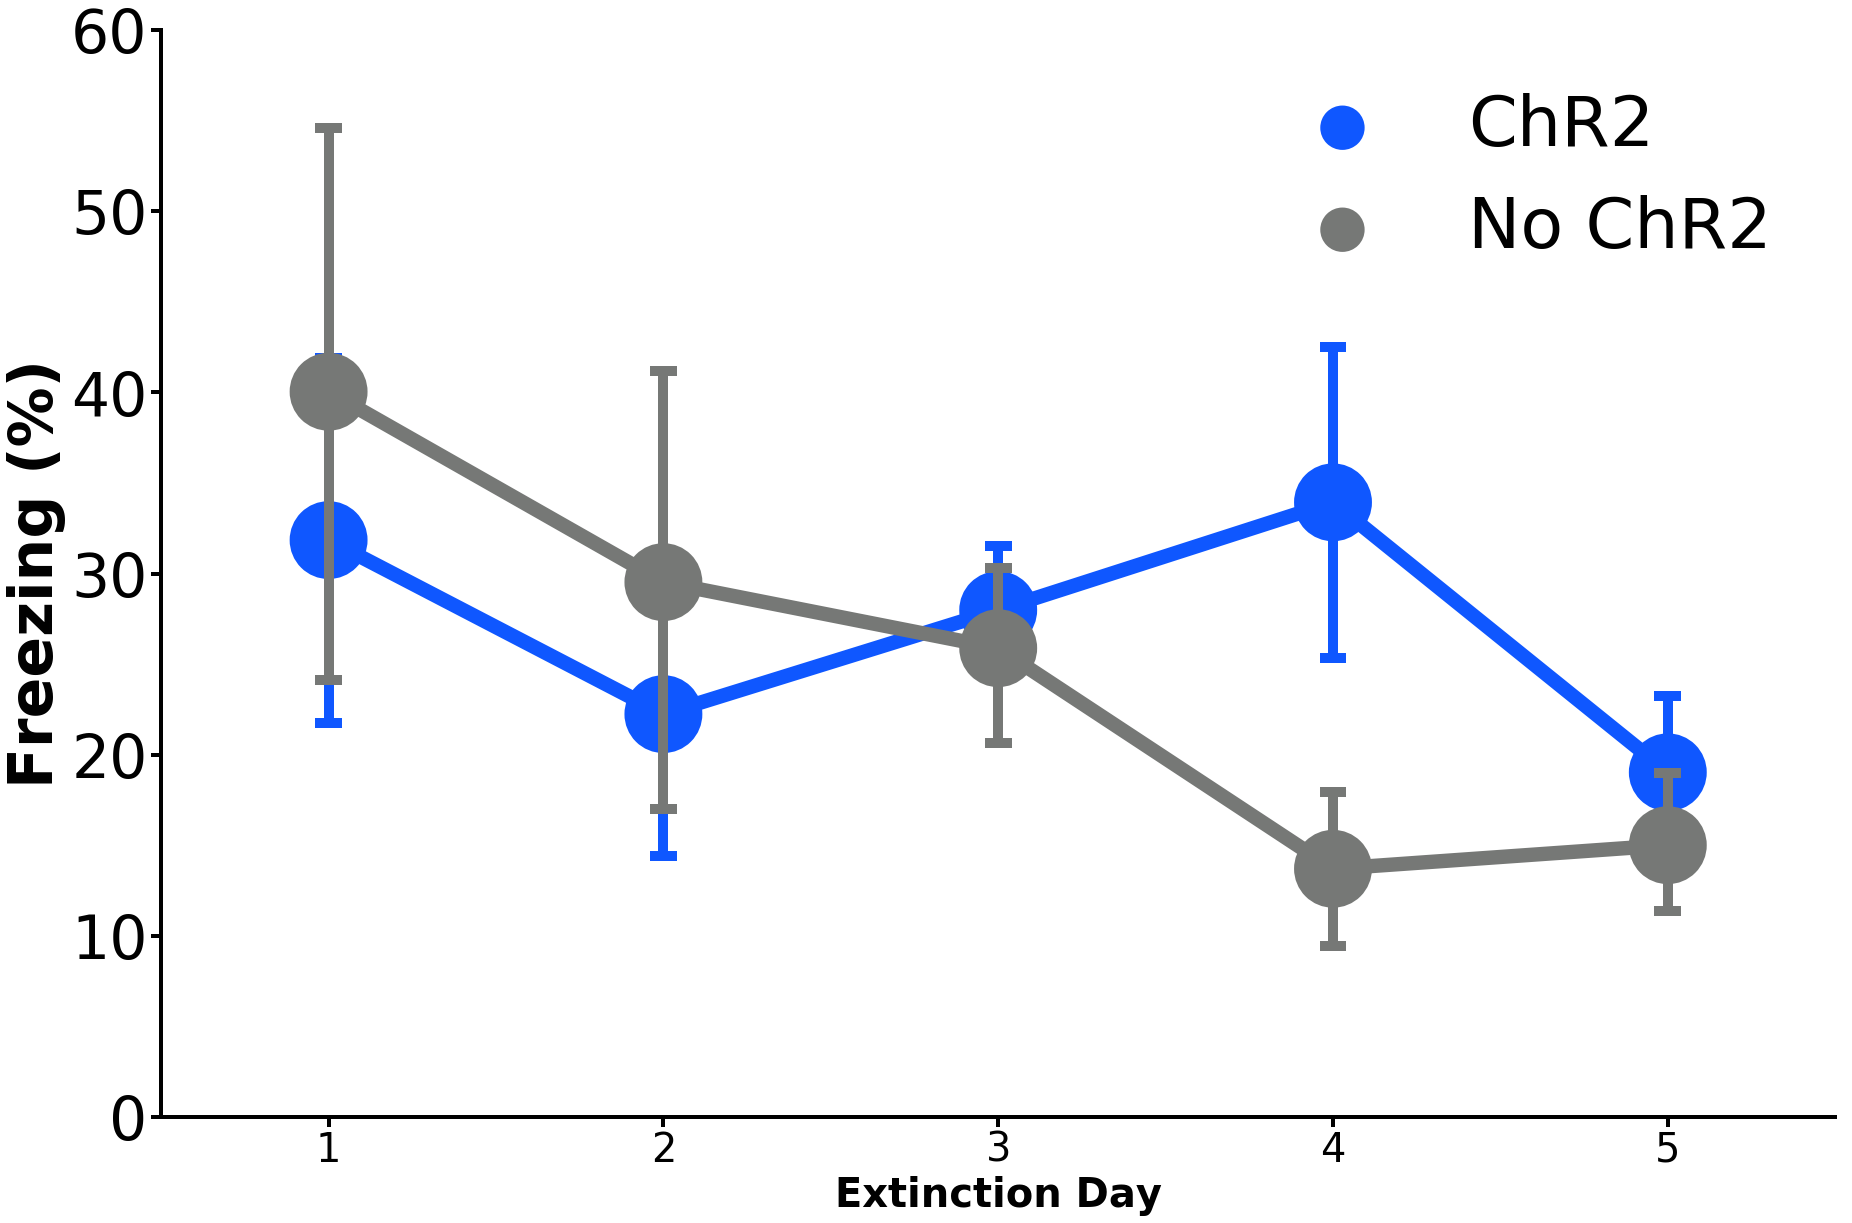

In [57]:

fd.tfc_plot(df_comp.query('Phase == "tone"'), xvar = 'Day', xlab = 'Extinction Day',  
            min_bins= False,tone_squares=False, trace_squares=False,
            shock_line=False,hue='Condition', hue_order=['Cre+', 'Cre-'], 
            ylim = (0,60), errwidth=10,scale = 2, marker_size = 4500)

plt.title('')
ax = plt.gca()
L=ax.legend(markerscale = .5, fontsize = 70)
L.get_texts()[0].set_text('ChR2')
L.get_texts()[1].set_text('No ChR2')
plt.savefig(f'{path}/figures/{expt_name} tone freezing across extinction.png')

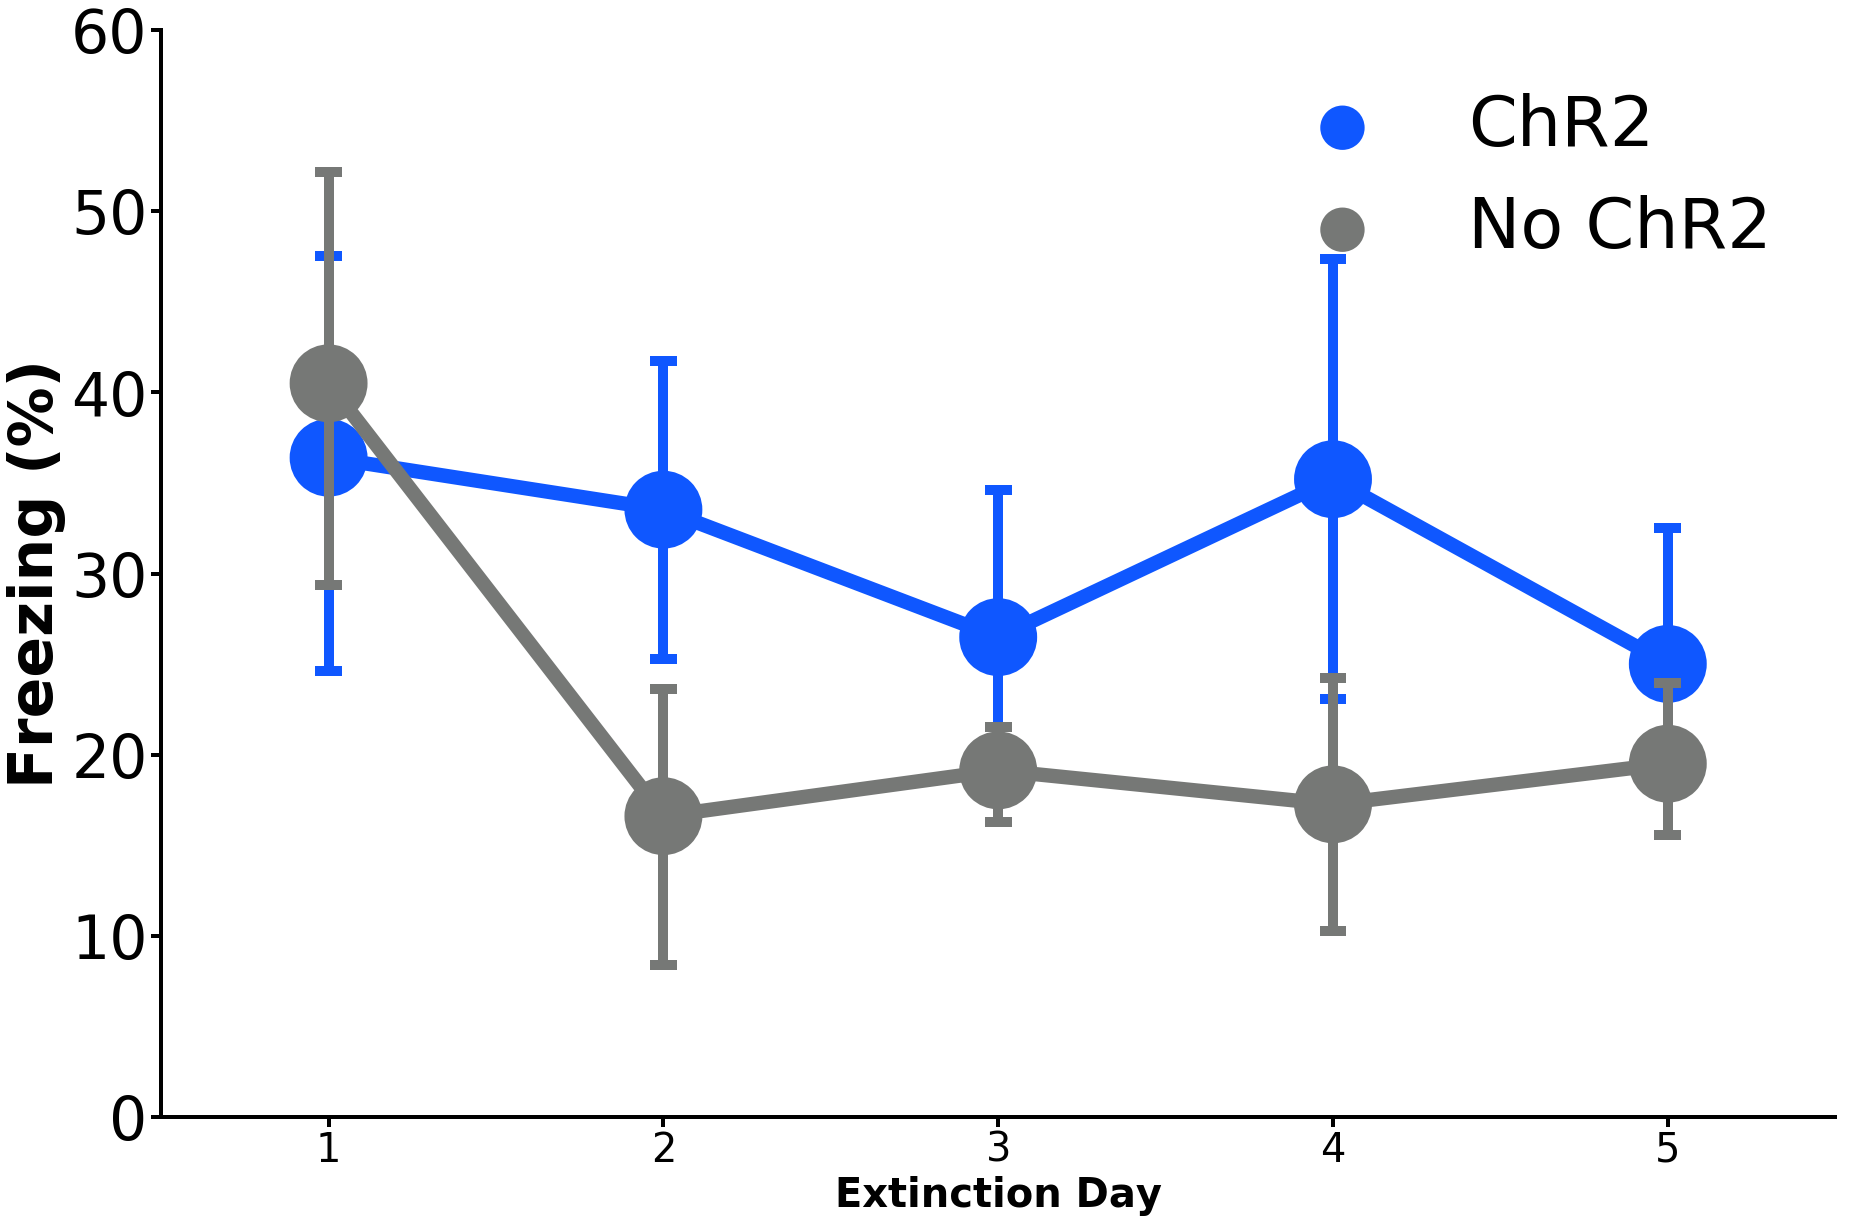

In [60]:

fd.tfc_plot(df_comp.query('Phase == "trace"'), xvar = 'Day', xlab = 'Extinction Day',  
            min_bins= False,tone_squares=False, trace_squares=False,
            shock_line=False,hue='Condition', hue_order=['Cre+', 'Cre-'], 
            ylim = (0,60), errwidth=10,scale = 2, marker_size = 4500)

plt.title('')
ax = plt.gca()
L=ax.legend(loc = 'upper right', markerscale = .5, fontsize = 70)
L.get_texts()[0].set_text('ChR2')
L.get_texts()[1].set_text('No ChR2')
plt.savefig(f'{path}/figures/{expt_name} trace freezing across extinction.png')

<a id ='co' ></a>
## Context Test

<a id='lcco'></a>
### Load and Clean Context Test Data

In [17]:
# load data
ctx_file = f'{path}data-raw/2021-01-28 LC ArchT TFC 120s ITI Ctx Test.csv'

df_ctx_raw = fd.load_df(ctx_file)

# clean data (take from MedAssociates format to simple csv table)
df_ctx = fd.clean_df(df_ctx_raw, ctx=True)

# add group labels to animals
df_ctx = fd.add_group_labels(df_ctx, grp_file=grp_label_file, exp_name=expt_name, grp2='Condition')

# exclusions


# create total df
df_ctx_total = fd.total_df(df_ctx, grp2='Condition')


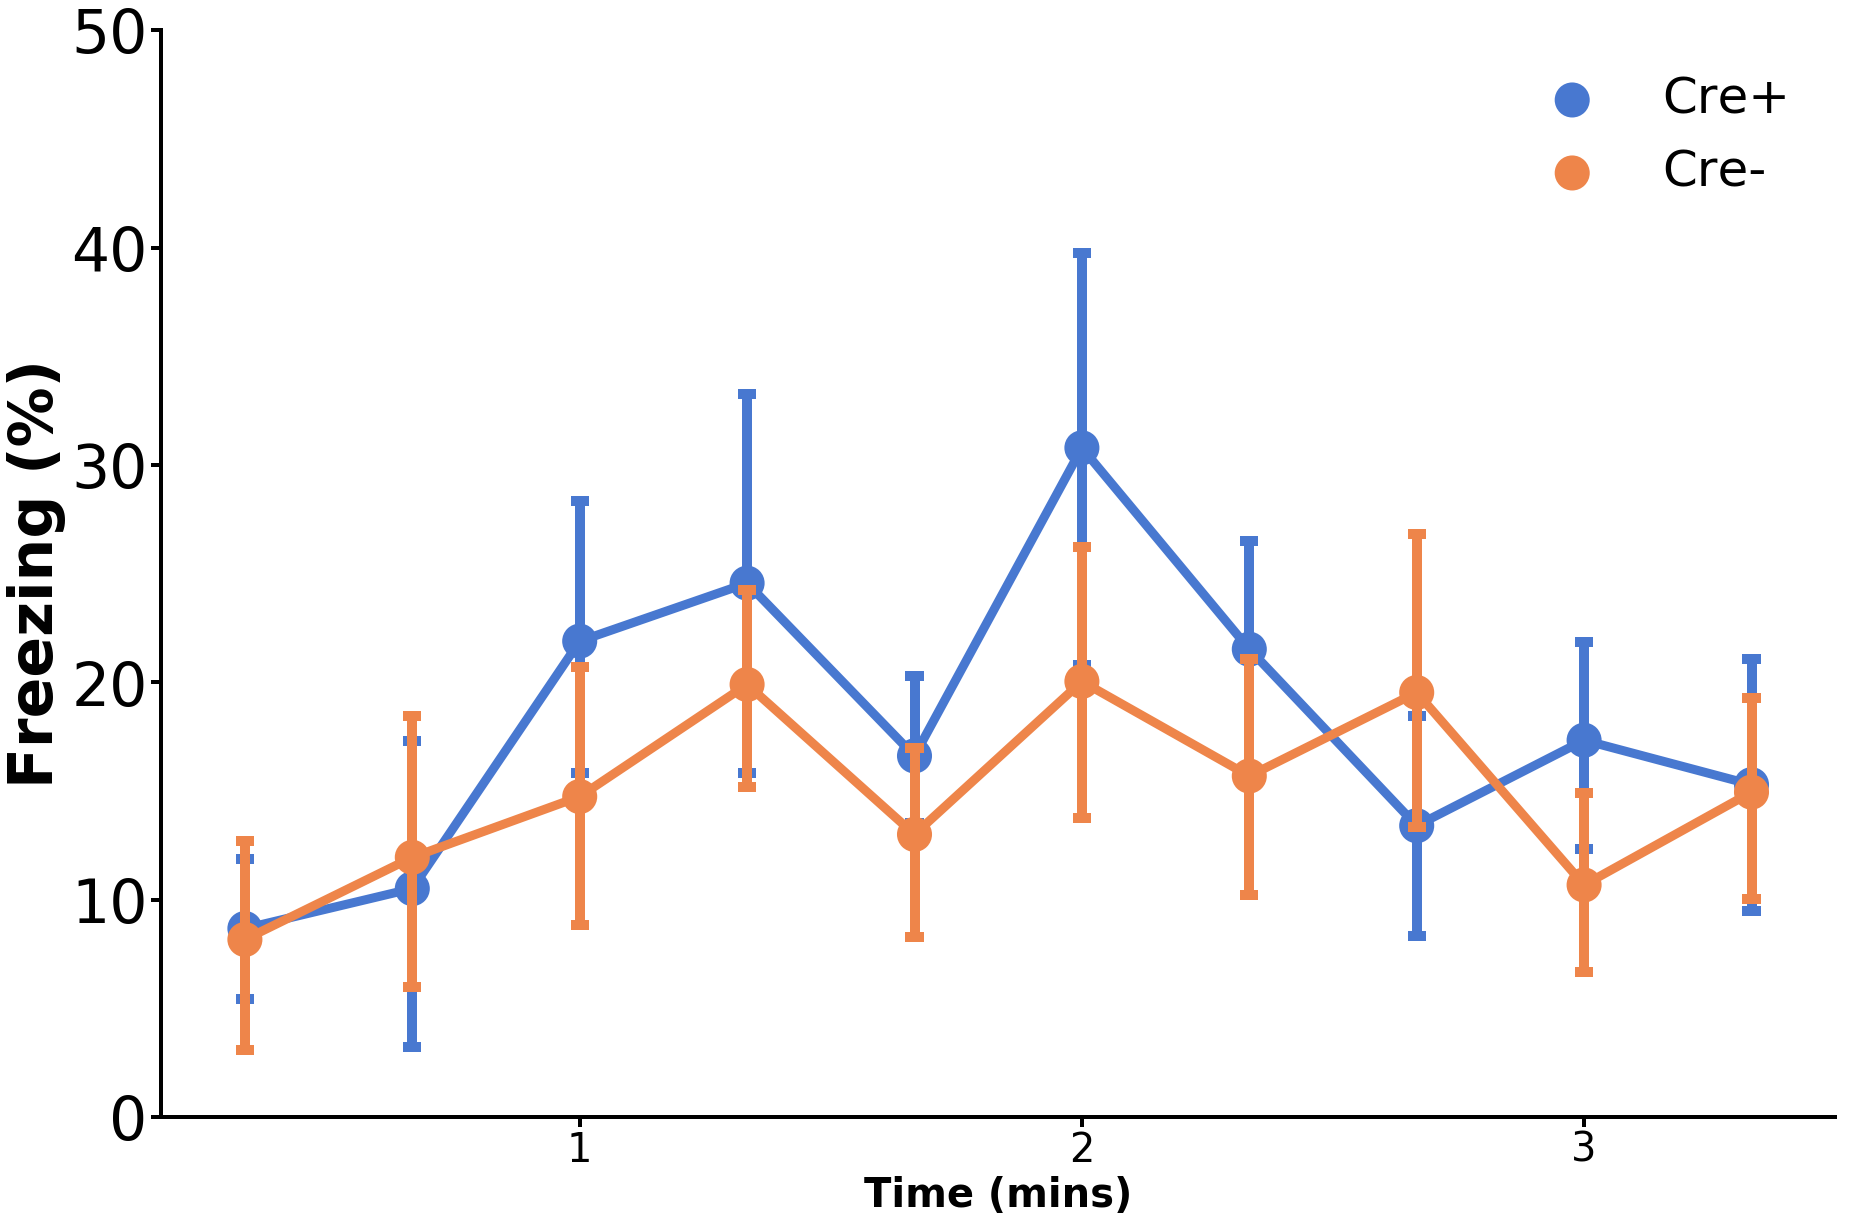

In [22]:
fd.tfc_plot(df_ctx, has_hue=True, squares=False, ylim=(0,50), hue='Condition', hue_order=['Cre+', 'Cre-'], 
            fig_name='Context Test', tone_squares = False, shock_line= False)
plt.legend(fontsize=50);

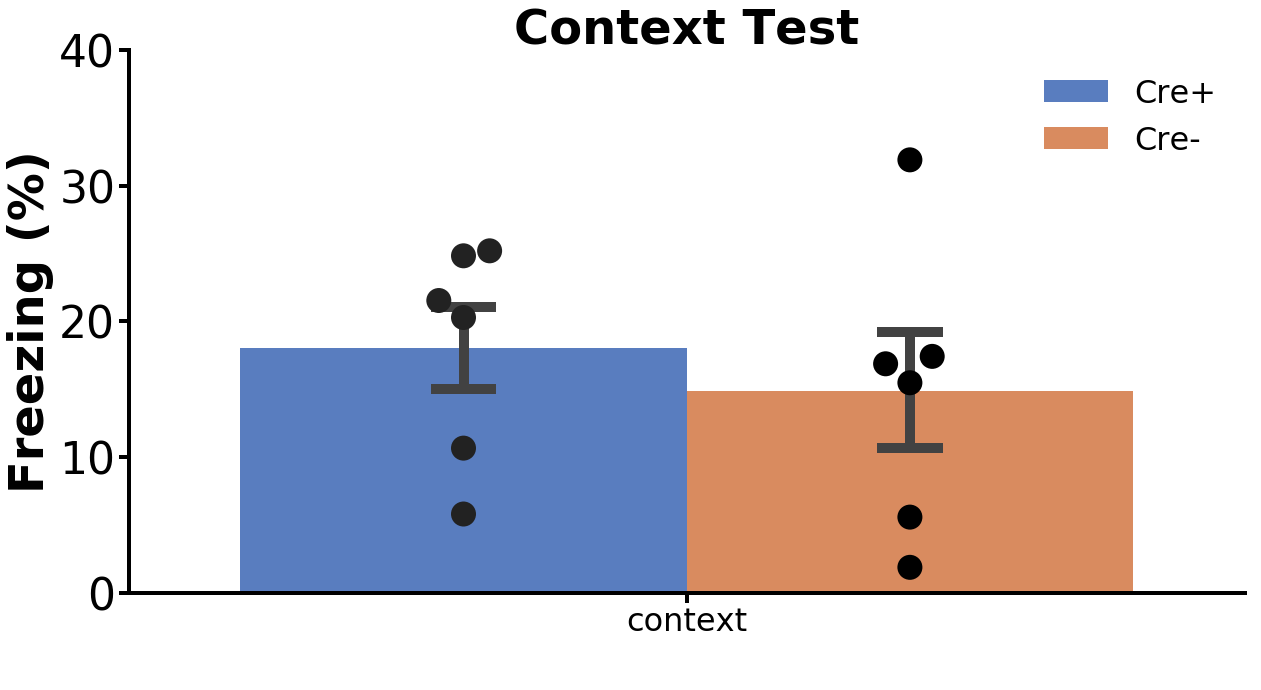

In [23]:

fd.tfc_barplot(df_ctx_total, ctx=True, hue='Condition', hue_order = ['Cre+', 'Cre-'], ylim=(0,80), fig_name=('Context Test'))
plt.ylim(0,40)

plt.ylabel('Freezing (%)')
plt.savefig(f'{path}/figures/{expt_name} ctx test bar.png')

In [24]:
df_ctx_total

Animal Sex Genotype    Phase  Component Name  Pct Component Time Freezing  \
0     63   M     Cre-  context             5.5                       35.195   
1     64   M     Cre+  context             5.5                       31.828   
2     67   F     Cre+  context             5.5                       38.444   
3     68   M     Cre-  context             5.5                       37.022   
4     69   M     Cre-  context             5.5                       33.790   
5     70   M     Cre+  context             5.5                       61.101   
6     71   M     Cre-  context             5.5                       30.090   
7     80   F     Cre+  context             5.5                       71.404   

   Avg Motion Index  
0            56.866  
1            83.516  
2            43.574  
3            62.210  
4            89.609  
5            35.258  
6            88.217  
7            40.710

### 

## Laser ON Tone Test

In [37]:
# load data
tone2_file = f'{path}data-raw/2020-09-23 LC ArchT TFC Tone Test Laser ON.csv'
df_tone2_raw = fd.load_df(tone2_file)
df_tone2_raw = df_tone2_raw[df_tone2_raw['Animal'].notna()]
df_tone2_raw['Animal'] = df_tone2_raw['Animal'].astype(int)
df_tone2_raw['Animal'] = df_tone2_raw['Animal'].astype(str)

df_tone2_raw.reset_index(inplace=True)
# clean data (take from MedAssociates format to simple csv table)
df_tone2 = fd.clean_df(df_tone2_raw)

# add group labels to animals
df_tone2 = fd.add_group_labels(df_tone2, grp_file=grp_label_file, exp_name=expt_name, grp2= 'Genotype')

# exclude animal that didn't get some shocks
#df_tone = df_tone[df_tone.Animal != '306']


# create a df w/ values averaged for each phase (i.e. baseline, tone, etc.) w/in each animal
df_tone2_total = fd.total_df(df_tone2, grp2='Genotype')

In [38]:
df_tone2_raw

index                                         Experiment  Trial  \
0        0  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
1        1  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
2        2  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
3        3  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
4        4  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
5        5  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
6        6  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
7        7  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
8        8  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
9        9  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
10      10  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
11      11  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
12      12  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
13      13  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
14      14  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
15      15  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
16      16  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
17      17  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
18      18  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
19      19  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
20      20  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
21      21  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
22      22  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
23      23  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
24      24  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
25      25  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
26      26  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
27      27  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
28      28  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
29      29  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    1.0   
..     ...                                                ...    ...   
738    745  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
739    746  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
740    747  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
741    748  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
742    749  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
743    750  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
744    751  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
745    752  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
746    753  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
747    754  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
748    755  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
749    756  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
750    757  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
751    758  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
752    759  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
753    760  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
754    761  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
755    762  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
756    763  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
757    764  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
758    765  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
759    766  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
760    767  2020-09-24 LC ArchT Full Trial 0.3mA Laser ON ...    4.0   
761    768  2020-09-24 LC ArchT Full Trial 0.

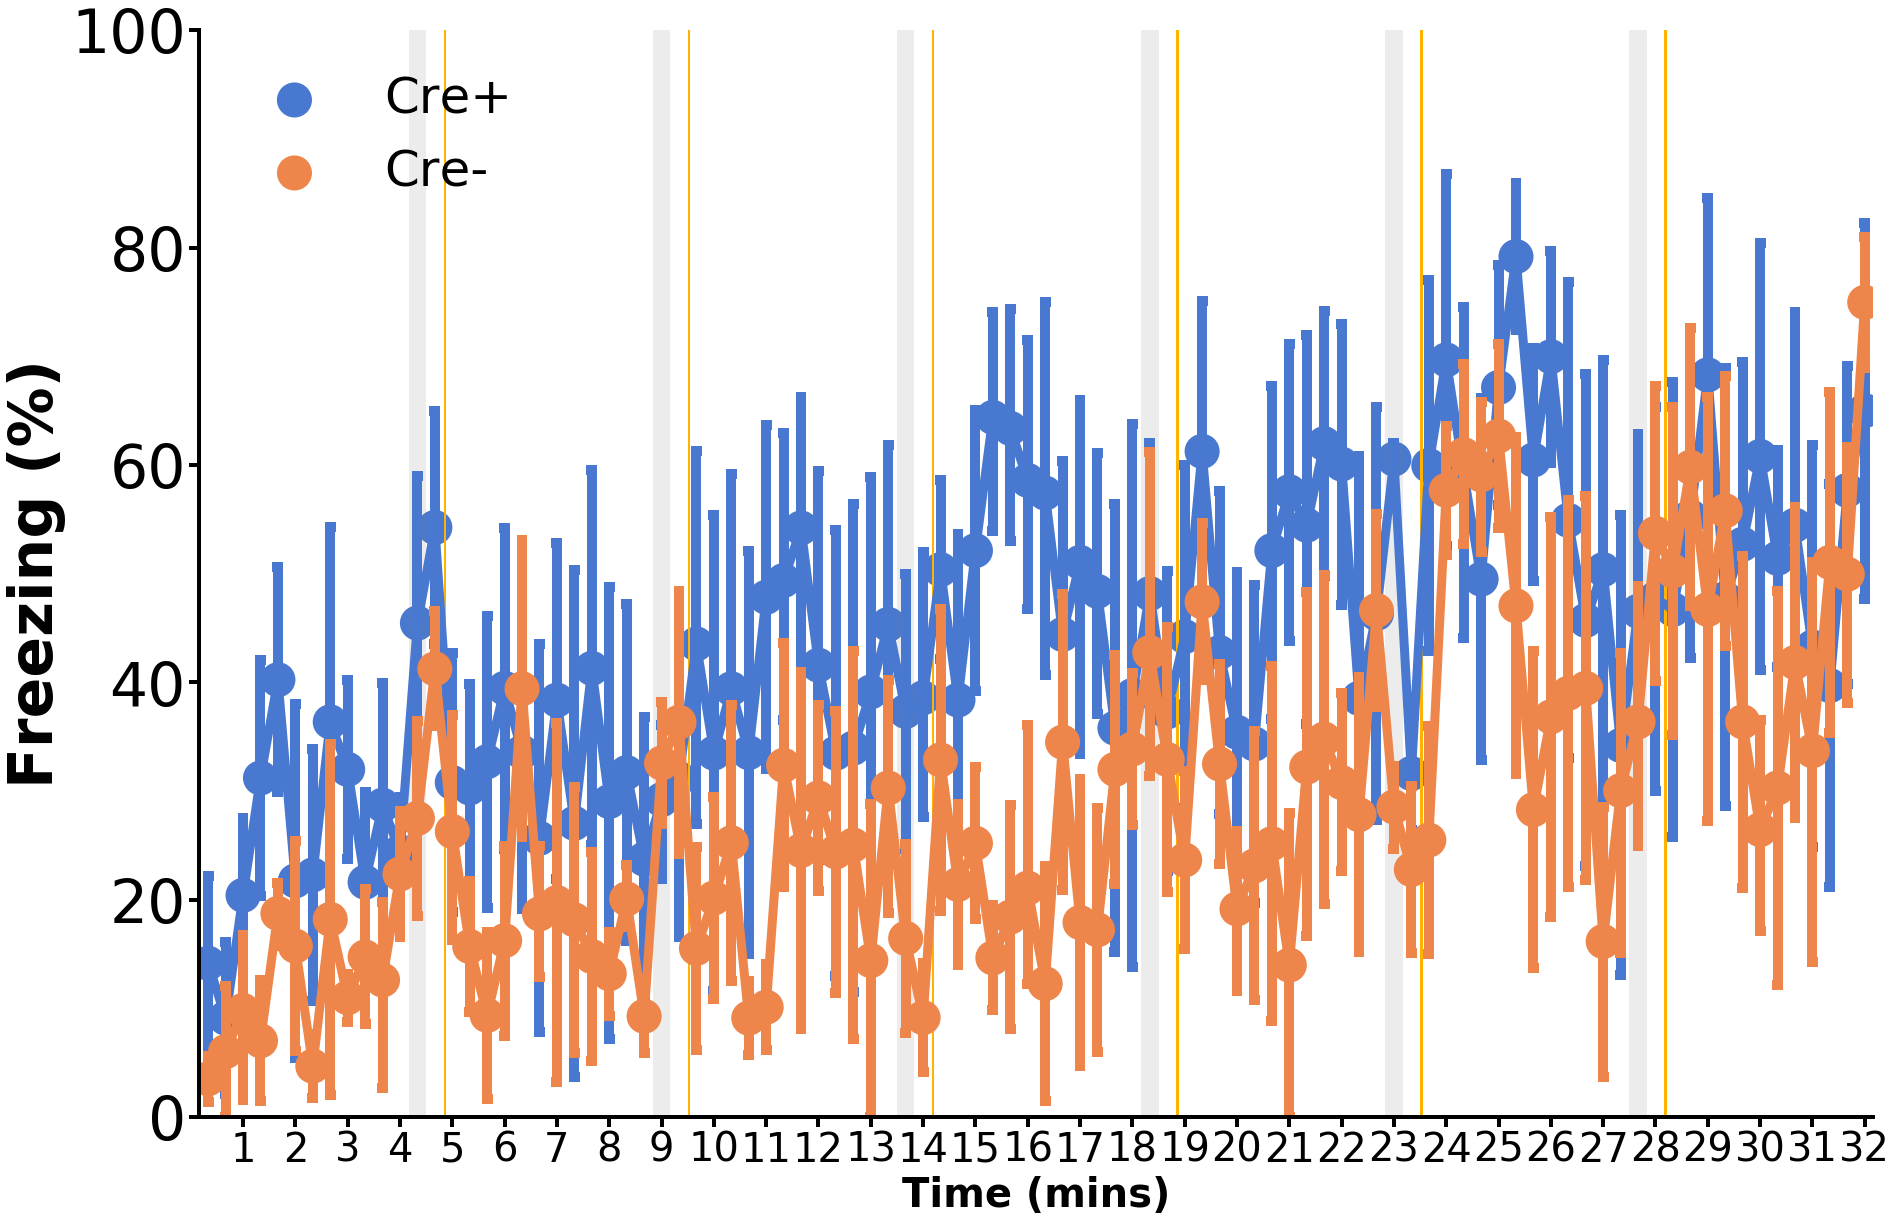

In [39]:
# binned plot

fd.tfc_plot(df_tone2, has_hue=True, hue='Genotype', hue_order=['Cre+', 'Cre-'], fig_name='Tone Test')
plt.legend(fontsize=50);


# Save figure
plt.savefig(f'{path}/figures/{expt_name} tone test laser on trial.png')

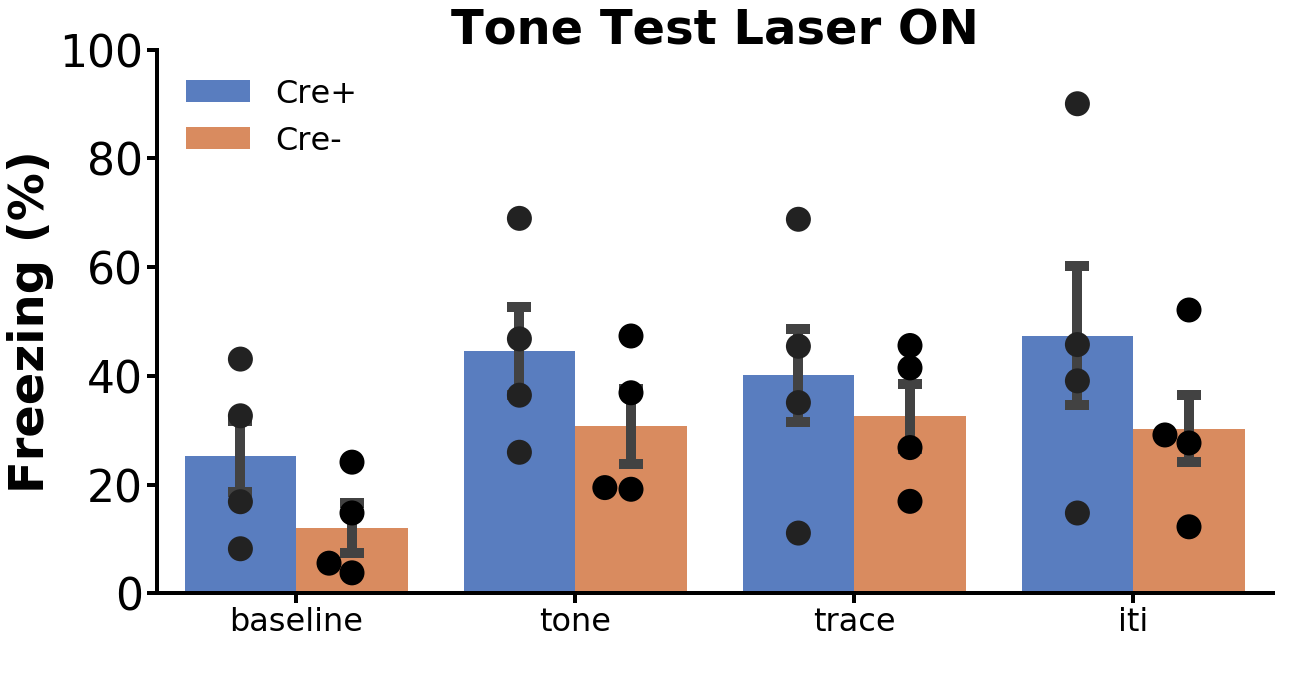

In [40]:
# bar plot

fd.tfc_barplot(df_tone2_total, hue='Genotype', hue_order=['Cre+','Cre-'], order=['baseline', 'tone', 'trace', 'iti'], 
               fig_name='Tone Test Laser ON', pts = True)

plt.ylim((0,100))

# Save figure
plt.savefig(f'{path}/figures/{expt_name} tone test laser on total bar.png')

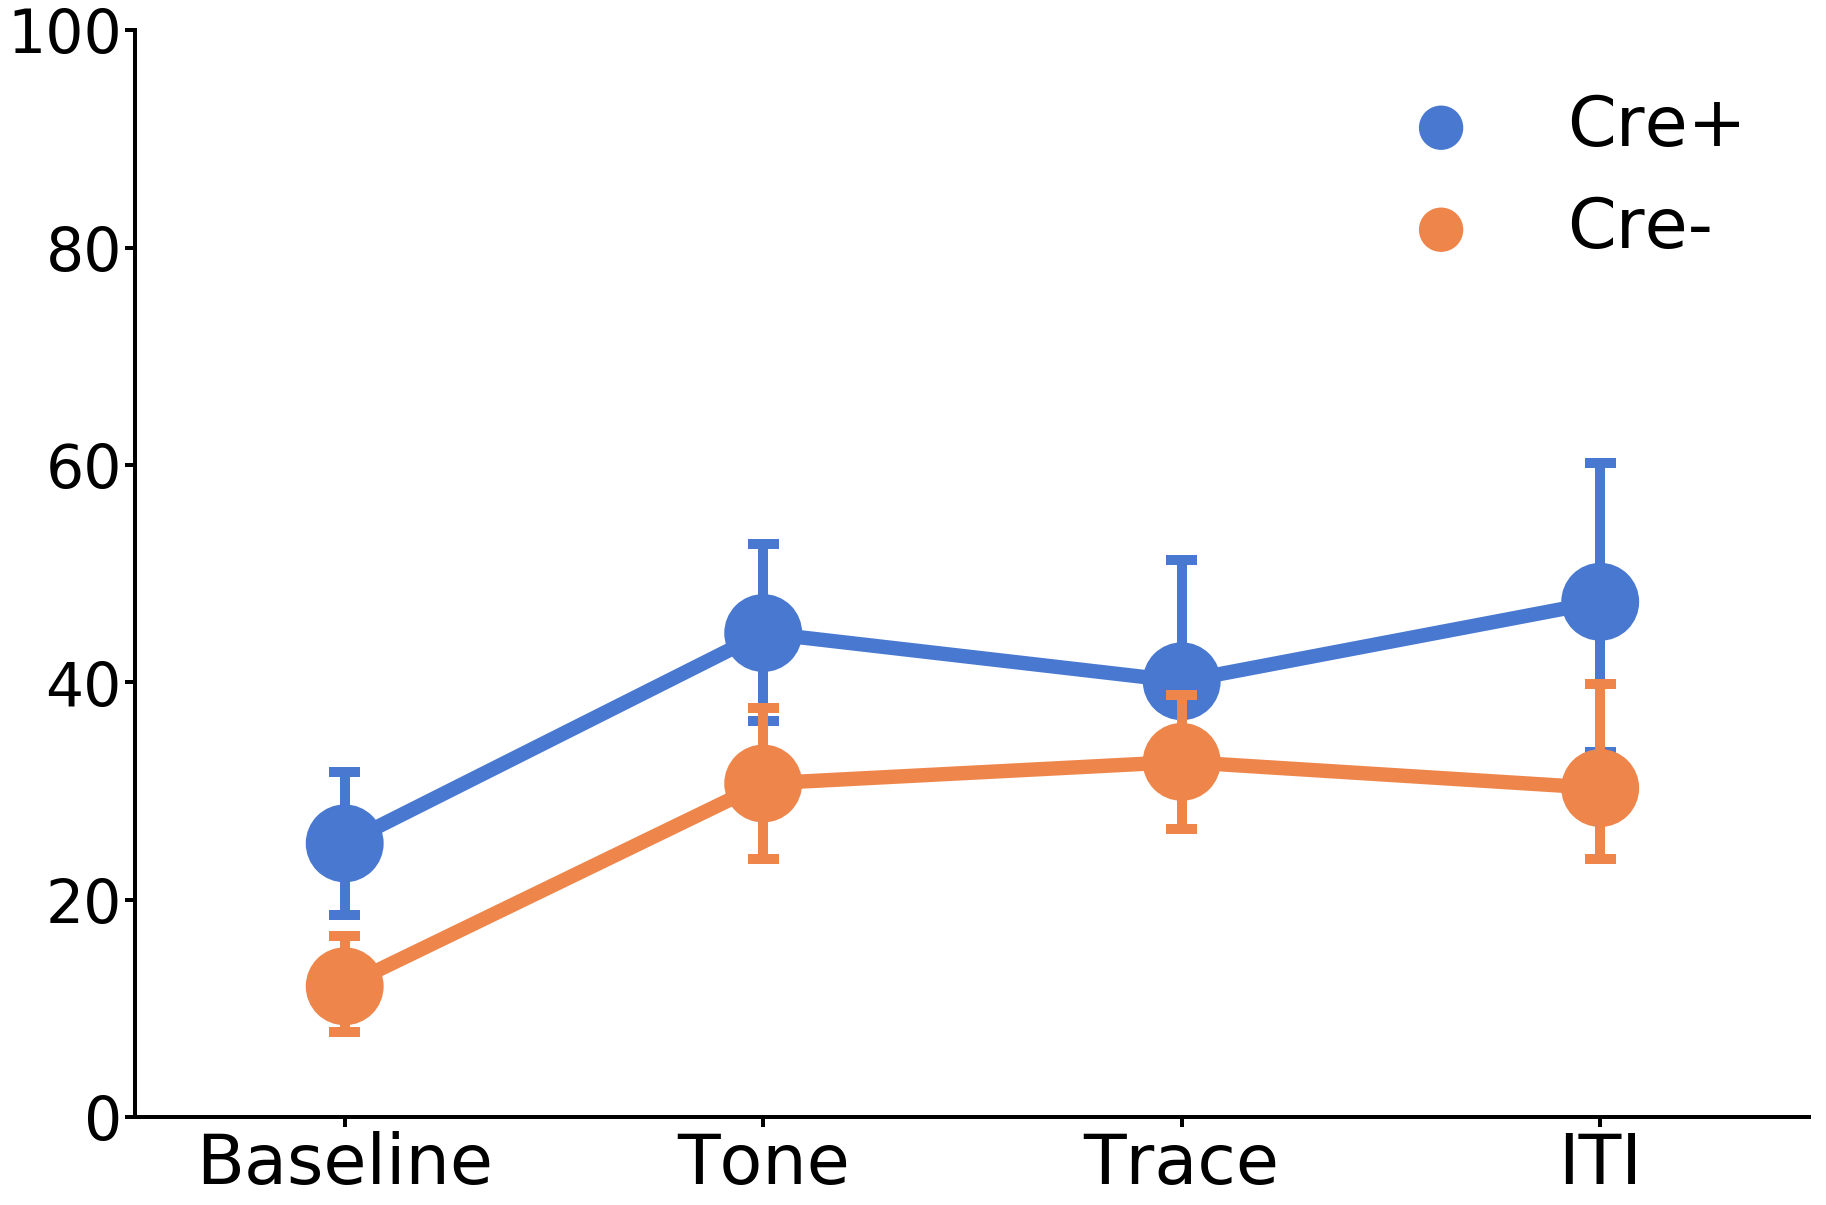

In [41]:
fd.tfc_plot(df_tone2_total, xvar = 'Phase', min_bins= False,tone_squares=False, trace_squares=False,
         shock_line=False,hue='Genotype', order = ['baseline', 'tone', 'trace','iti' ], hue_order=['Cre+', 'Cre-'], 
         errwidth=10,scale = 2, marker_size = 4500)

plt.ylim((0,100));
plt.xlabel('');
plt.ylabel('');
ax = plt.gca()
ax.set_xticklabels(['Baseline', 'Tone', 'Trace', 'ITI'], size = 70);
ax.legend(markerscale = .5, fontsize = 70)

plt.savefig(f'{path}/figures/{expt_name} tone test laser on total line.png')